# 1-D DP

**Stair walking step**

In [ ]:
def stair(n):
    if n == 0:
        return 1
    one = stair(n - 1)
    two = 0
    if n > 1:
        two = stair(n - 2)
    return one + two


stair(4)

5

In [1]:
def stair(n):
    dp = [0] * (n + 1)
    dp[0], dp[1] = 1, 1
    for i in range(2, n + 1):
        dp[i] = dp[i - 1] + dp[i - 2]
    return dp[n]


stair(4)

5

**space optimization**

In [ ]:
def stair(n):
    prev1, prev2 = 1, 1
    for i in range(2, n + 1):
        curr = prev1 + prev2
        prev2 = prev1
        prev1 = curr
    return curr


stair(4)

5

**Frog-Jump**

In [2]:
arr = [30, 10, 60, 10, 60, 50]


def solve(i, arr):
    if i <= 0:
        return 0

    take1 = abs(arr[i] - arr[i - 1]) + solve(i - 1, arr)
    take2 = float("inf")
    if i >= 2:
        take2 = abs(arr[i] - arr[i - 2]) + solve(i - 2, arr)
    return min(take1, take2)


solve(len(arr) - 1, arr)

40

In [6]:
arr = [30, 10, 60, 10, 60, 50]


def solve(arr):
    dp = [0] * len(arr)
    for i in range(1, len(arr)):
        take1 = abs(arr[i] - arr[i - 1]) + dp[i - 1]
        take2 = float("inf")
        if i >= 2:
            take2 = abs(arr[i] - arr[i - 2]) + dp[i - 2]
        dp[i] = min(take1, take2)
    return dp


solve(arr)

[0, 20, 30, 20, 30, 40]

**space optimization**

In [7]:
arr = [30, 10, 60, 10, 60, 50]


def solve(arr):
    prev1, prev2 = 0, 0
    for i in range(1, len(arr)):
        take1 = abs(arr[i] - arr[i - 1]) + prev1
        take2 = float("inf")
        if i >= 2:
            take2 = abs(arr[i] - arr[i - 2]) + prev2

        prev2 = prev1
        prev1 = min(take1, take2)

    return prev1


solve(arr)

40

**Frog-jump with k dist**

In [9]:
arr = [30, 10, 60, 10, 60, 50]
k = 2


def solve(i, k, arr):
    if i <= 0:
        return 0

    take = float("inf")

    for j in range(1, k + 1):
        if i - j >= 0:
            take = min(take, abs(arr[i] - arr[i - j]) + solve(i - j, k, arr))

    return take


solve(len(arr) - 1, k, arr)

40

In [10]:
arr = [30, 10, 60, 10, 60, 50]
k = 2


def solve(i, k, arr):
    dp = [0] * len(arr)

    for i in range(1, len(arr)):
        take = float("inf")
        for j in range(1, k + 1):
            if i - j >= 0:
                take = min(take, abs(arr[i] - arr[i - j]) + dp[i - j])

        dp[i] = take

    return dp


solve(len(arr) - 1, k, arr)

[0, 20, 30, 20, 30, 40]

**Count minimum number of fountains to be activated to cover the entire garden**

a[i] describes the coverage limit of ith fountain. A fountain can cover the range from the position

 max(i – a[i], 1) to min(i + a[i], N). In beginning, all the fountains are switched off.

In [2]:
def findMinFountains(arr, n):
    dp = [n + 1 for i in range(n)]
    # initialise each index to 'N' because in worst that n would be the minimum number of fountains that we have to turn on
    dp[0] = 0
    for i in range(n):
        # Iterating over the range upto which the current fountain can cover.
        for j in range(max(i - arr[i], 0), min(i + (arr[i] + 1), n)):
            noactivat = dp[j]
            activate = 1 + dp[max(0, i - arr[i])]
            dp[j] = min(noactivat, activate)
            # )  # min fountain need to water all at j check no activate or 1+prev activate

    if dp[n - 1] < n + 1:
        return dp[n - 1]

    return -1


a = [2, 1, 1, 1]  # [3, 4, 1, 1, 0, 0]  #
N = len(a)

findMinFountains(a, N)

2

1) Yuki can buy 1 more blade with cost 'A.’ He now has ‘K+1’ Ninja blades.

2) Yuki could buy a ‘K’ number of blades with cost 'B.’ He now has ‘2*K’ blades.
where 'A' and 'B' are predefined and constant.

In [ ]:
def solve(n, a, b):
    if n == 0:
        return 0

    oa = ob = float("inf")
    if n % 2 == 0:
        ob = b + solve(n // 2, a, b)
    if n >= 1:
        oa = a + solve(n - 1, a, b)
    return min(oa, ob)


solve(13, 5, 8)


def solve1(n, a, b):
    if n == 0:
        return 0

    dp = [0] * (n + 1)
    dp[0] = 0
    # dp[1] = a
    # dp[2] = min(a+a,b)
    for i in range(1, n + 1):
        oa = ob = float("inf")
        if i % 2 == 0:
            ob = b + dp[i // 2]
        oa = a + dp[i - 1]
        dp[i] = min(oa, ob)

    return dp[n]

36

our task is to find and return the minimum number of steps that 'N' has to take to get reduced to 1.

You can perform any one of the following 3 steps:

1) Subtract 1 from it. (n = n - ­1) ,
2) If n is divisible by 2, divide by 2.( if n % 2 == 0, then n = n / 2 ) ,
3) If n is divisible by 3, divide by 3. (if n % 3 == 0, then n = n / 3 ).

In [ ]:
def solve(n, dp):
    if n == 1:
        return 0
    o1 = o2 = o3 = float("inf")
    if n in dp:
        return dp[n]

    if n % 3 == 0:
        o3 = 1 + solve(n // 3, dp)

    if n % 2 == 0:
        o2 = 1 + solve(n // 2, dp)
    if n > 1:
        o1 = 1 + solve(n - 1, dp)

    dp[n] = min(o1, o2, o3)
    return dp[n]

3

In [11]:
def solve(n):
    if n == 1:
        return 0
    dp = [0] * (n + 1)
    dp[0] = 0
    dp[1] = 0
    dp[2] = 1
    dp[3] = 1
    for i in range(4, n + 1):
        o1 = o2 = o3 = float("inf")
        if i % 3 == 0:
            o3 = 1 + dp[i // 3]
        if i % 2 == 0:
            o2 = 1 + dp[i // 2]
        o1 = 1 + dp[i - 1]
        dp[i] = min(o1, o2, o3)
    return dp[n]


solve(10)

3

1. Each friend can be paired with some other friend or remain single.

2. Each friend can be a part of at most one pair.

3. Pairs {A, B} and {B, A} are considered the same.

You are supposed to find the total number of ways in which the pairing can be done satisfying both conditions.

In [ ]:
def numberOfWays(n):

    # Base Conditions.
    if n == 1 or n == 2:
        return n

    # For storing answers to the subproblems.
    dp = [0 for i in range(n + 1)]

    dp[1] = 1
    dp[2] = 2

    mod = 1e9 + 7

    # Iterating and calculating for every value of i = 3 to N.
    for i in range(3, n + 1):

        dp[i] = (dp[i - 1] + ((i - 1) * dp[i - 2]) % mod) % mod

    return int(dp[n])


def solve(n, dp):
    if n <= 2:
        return n
    if n in dp:
        return dp[n]
    single = pair = 0
    single = solve(n - 1, dp)
    double = (n - 1) * solve(n - 2, dp)
    dp[n] = (single + double) % (1000000007)
    return dp[n]

**Maximum sum of non adjacent elements**

In [12]:
arr = [2, 1, 4, 9]


def solve(i, arr):
    if i == 0:
        return arr[0]
    if i < 0:
        return 0
    take = float("-inf")
    if i >= 2:
        take = arr[i] + solve(i - 2, arr)
    notake = solve(i - 1, arr)
    return max(take, notake)


solve(len(arr) - 1, arr)

11

In [5]:
arr = [2, 1, 4, 9]


def solve(arr):
    dp = [0] * len(arr)
    dp[0] = arr[0]
    for i in range(1, len(arr)):
        notake = dp[i - 1]
        take = arr[i]
        if i >= 2:
            take += dp[i - 2]
        dp[i] = max(take, notake)
    return dp


solve(arr)

[2, 2, 6, 11]

**space-opt**

In [6]:
arr = [2, 1, 4, 9]


def solve(arr):
    prev1 = arr[0]
    prev2 = 0
    for i in range(1, len(arr)):
        notake = prev1
        take = arr[i]
        if i >= 2:
            take += prev2
        prev2 = prev1
        prev1 = max(take, notake)
        print(prev1)


solve(arr)

2
6
11


Truncate an integer array such that `2×min` becomes more than `max`

In [48]:
# %%timeit


def findMin(arr, low, high, dp):

    # base case
    if low > high:
        return 0

    # find the minimum and the maximum elements in array `arr[low…high]`
    # and check if the array is not balanced
    # subarr = arr[low : high + 1]
    MIN = arr[low]
    MAX = arr[high]
    if (low, high) in dp:
        return dp[(low, high)]
    if 2 * MIN <= MAX:  # 2 * min(subarr) <= max(subarr):
        # remove the leftmost element from the array, and recur with the
        # remaining elements
        L = 1 + findMin(arr, low + 1, high, dp)

        # remove the rightmost element from the array, and recur with the
        # remaining elements
        R = 1 + findMin(arr, low, high - 1, dp)

        # return the minimum of two
        dp[(low, high)] = min(L, R)
        return dp[(low, high)]

    # we reach here if the array is already balanced
    return 0


if __name__ == "__main__":

    arr = [4, 5, 100, 9, 10, 11, 12, 15, 200]
    arr.sort()
    print(findMin(arr, 0, len(arr) - 1, dict()))

    # print("The minimum number of removals is", findMin(arr, 0, len(arr) - 1))

4


In [57]:
def findEndIndex(arr, key, i, n):

    index = -1
    start = i + 1
    end = n - 1

    while start <= end:

        mid = start + (end - start) // 2

        if arr[mid] < 2 * key:
            index = mid
            start = mid + 1
        else:
            end = mid - 1

    return index


def minimumRemovals(arr, n):

    arr.sort()

    ans = n - 1

    for start in range(n):

        endIndex = findEndIndex(arr, arr[start], start, n)

        if endIndex != -1:
            ans = min(ans, n - (endIndex - start + 1))

    return ans


arr = [
    4,
    2,
    6,
    4,
    9,
]  # [4, 7, 5, 6]  # [20, 7, 5, 6]  # [4, 5, 100, 9, 10, 11, 12, 15, 200]
minimumRemovals(arr, len(arr))

2

In [56]:
# without sorting and maintaining  original order
def findMin(arr):

    # base case
    if not arr:
        return 0

    # create a table for saving solutions to subproblems
    T = [[0] * len(arr) for _ in range(len(arr))]

    # fill the table diagonally
    for diagonal in range(len(arr)):
        i = 0
        for j in range(diagonal, len(arr)):
            # find the minimum and the maximum elements in subarray `arr[i…j]`
            # if subarray `arr[i…j]` is not balanced, choose the minimum
            # removals among subarray `arr[i…j-1]` and `arr[i-1…j]`
            if (
                2 * min(arr[i : j + 1]) <= max(arr[i : j + 1])
                and j - 1 >= 0
                and i + 1 < len(arr)
            ):
                T[i][j] = min(1 + T[i][j - 1], 1 + T[i + 1][j])
            i += 1

    # the top-rightmost element in the table stores the result
    return T[0][-1]


if __name__ == "__main__":

    arr = [4, 2, 6, 4, 9]
    print("The minimum number of removals is", findMin(arr))

The minimum number of removals is 3


Your task is to find the minimum number of elements that should be removed from "ARR" (possibly zero) 

such that the difference between the maximum element and the minimum element of the remaining "ARR" is less than or equal to 'K', i.e. ARRmax - ARRmin <= K.

In [44]:
def solve(l, r, k, arr):
    if l > r:
        return 0
    Max = arr[r]
    Min = arr[l]
    if Max - Min > k:
        L = 1 + solve(l + 1, r, k, arr)

        R = 1 + solve(l, r - 1, k, arr)
        return min(L, R)
    return 0


arr = [5, 10, 2]
k = 3
arr.sort()
solve(0, len(arr) - 1, k, arr)

1

In [52]:
"""
    Time Complexity : O(N * log(N))
    Space Complexity : O(1)

    where N is the length of array/list.
"""


def findEndIndex(arr, key, i, n, k):

    index = -1
    start = i + 1
    end = n - 1

    while start <= end:

        mid = start + (end - start) // 2

        if arr[mid] - key <= k:
            index = mid
            start = mid + 1
        else:
            end = mid - 1

    return index


def minimumRemovals(arr, n, k):

    arr.sort()

    ans = n - 1

    for start in range(n):

        endIndex = findEndIndex(arr, arr[start], start, n, k)

        if endIndex != -1:
            ans = min(ans, n - (endIndex - start + 1))

    return ans


arr = [5, 10, 2]
k = 3
arr.sort()
minimumRemovals(arr, len(arr), k)

1

In [45]:
def minimumRemovals(arr, n, k):

    arr.sort()

    dp = [[0 for j in range(n + 1)] for i in range(n + 1)]

    for gap in range(n):

        i = 0
        for j in range(gap, n):

            if arr[j] - arr[i] <= k:
                dp[i][j] = 0
            else:
                dp[i][j] = 1 + min(dp[i + 1][j], dp[i][j - 1])

            i += 1

    return dp[0][n - 1]

**Optimal Strategy for a Game**

In each turn, a player selects either the first or last coin from the row, 

removes it from the row permanently, and receives the value of the coin.

 Determine the maximum possible amount of money we can definitely win if we move first.

In [13]:
def maxAmount(i, j, arr):

    # Base case: If i > j, no more elements
    # are left to pick
    if i > j:
        return 0

    # Option 1: Take the first element arr[i], and then we
    # have two choices:
    # - Skip arr[i+1] and solve the problem for range [i+2, j]
    # - Take arr[i+1] and arr[j-1] (we solve the problem for range [i+1, j-1])
    takeFirst = arr[i] + min(
        maxAmount(i + 2, j, arr), maxAmount(i + 1, j - 1, arr)
    )  # both are playing optimaly that is why min

    # Option 2: Take the last element arr[j], and then we
    # have two choices:
    # - Skip arr[j-1] and solve the problem for range [i, j-2]
    # - Take arr[i+1] and arr[j-1] (we solve the problem for range [i+1, j-1])
    takeLast = arr[j] + min(maxAmount(i + 1, j - 1, arr), maxAmount(i, j - 2, arr))

    return max(takeFirst, takeLast)


def maximumAmount(arr):

    n = len(arr)
    res = maxAmount(0, n - 1, arr)
    return res


if __name__ == "__main__":

    arr = [5, 3, 7, 10]
    res = maximumAmount(arr)
    print(res)

15


In [21]:
def maxAmount(arr):
    n = len(arr)

    # Create a table to store solutions of subproblems
    dp = [[0 for _ in range(n)] for _ in range(n)]

    # Fill table using above recursive formula.
    # Note that the table is filled in diagonal fashion
    # from diagonal elements to table[0][n-1] which is the result.
    for gap in range(n):
        for j in range(gap, n):
            i = j - gap

            # Here x is value of F(i + 2, j),
            # y is F(i + 1, j-1) and z is F(i, j-2) in above
            # recursive formula
            x = 0
            if (i + 2) <= j:
                x = dp[i + 2][j]
            y = 0
            if (i + 1) <= (j - 1):
                y = dp[i + 1][j - 1]
            z = 0
            if i <= (j - 2):
                z = dp[i][j - 2]

            dp[i][j] = max(arr[i] + min(x, y), arr[j] + min(y, z))

    return dp[0][n - 1]


arr = [5, 3, 7, 10]
print(maxAmount(arr))

15


1. The user chooses the ith coin with value Vi: The opponent either chooses (i+1)th coin or jth coin. The opponent intends to choose the coin which leaves the user with minimum value. 
i.e. The user can collect the value Vi + (Sum – Vi) – F(i+1, j, Sum – Vi) where Sum is sum of coins from index i to j. The expression can be simplified to Sum – F(i+1, j, Sum – Vi) 

In [14]:
def oSRec(arr, i, j, Sum):

    if j == i + 1:
        return max(arr[i], arr[j])

    # For both of your choices, the opponent
    # gives you total Sum minus maximum of
    # his value
    return max(
        (Sum - oSRec(arr, i + 1, j, Sum - arr[i])),
        (Sum - oSRec(arr, i, j - 1, Sum - arr[j])),
    )


# Returns optimal value possible that a player can
# collect from an array of coins of size n. Note
# than n must be even


def optimalStrategyOfGame(arr, n):

    Sum = 0
    Sum = sum(arr)
    return oSRec(arr, 0, n - 1, Sum)


arr1 = [5, 3, 7, 10]  # [8, 15, 3, 7]  #[5, 3, 7, 10]
n = len(arr1)
out = optimalStrategyOfGame(arr1, n)
print(out, sum(arr1) - out)

15 10


Find the minimum number of squares that sum to a given number

In [2]:
import math


# Utility function to check if a given number `n` is a perfect square or not
def is_perfect_square(n):
    # find the floating-point value of the square root of `n`
    sqr = int(n**0.5)

    # return true if the square root is an integer
    return sqr * sqr == n


# Recursive function to find the minimum number of squares that sum to `n`
def find_min_squares(n):
    # base case: `n` is a perfect square
    if is_perfect_square(n):
        return 1

    if n == 0:
        return 0

    if n < 0:
        return float("inf")

    # initialize the result with the maximum number of squares possible
    result = n

    # loop through all positive integers less than the square root of `n`
    for i in range(1, int(math.sqrt(n)) + 1):
        # recur for `n-i*i` and update the result if a lesser value is found
        result = min(result, 1 + find_min_squares(n - i * i))

    return result


if __name__ == "__main__":
    n = 10
    print("The minimum number of squares is", find_min_squares(n))

The minimum number of squares is 2


In [13]:
# Iterative function to find the minimum number of squares that sum to `n`
def findMinSquares(n):

    # create an auxiliary array T[], where T[i] stores the minimum number
    # of squares that sum to `i`
    T = [0] * (n + 1)

    # fill the auxiliary array T[] in a bottom-up manner
    for i in range(n + 1):

        # initialize T[i] with the maximum number of squares possible
        T[i] = i

        # loop through all positive integers less than or equal to the
        # square root of `i`
        j = 1
        while j * j <= i:
            # calculate the value of T[i] using the result of a smaller
            # subproblem T[i-j×j]
            T[i] = min(T[i], 1 + T[i - j * j])
            j += 1

    return T[n]


if __name__ == "__main__":

    n = 63
    print("The minimum number of squares is", findMinSquares(n))

The minimum number of squares is 4


In [10]:
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right


# Recursive function to find the size of the maximum independent set
# for a binary tree
def findMIS(root, d):

    # base case: empty tree
    if root is None:
        return 0

    if root in d:
        return d[root]

    # Case 1: Exclude the current node from the maximum independent set and
    # recur for its left and right child
    excl = findMIS(root.left, d) + findMIS(root.right, d)

    # Case 2: Include the current node in the maximum independent set and
    # recur for its grandchildren
    incl = 1

    if root.left:
        incl += findMIS(root.left.left, d) + findMIS(root.left.right, d)

    if root.right:
        incl += findMIS(root.right.left, d) + findMIS(root.right.right, d)

    # save and return the maximum number of nodes possible by either
    # including or excluding the current node
    d[root] = max(excl, incl)
    return d[root]


if __name__ == "__main__":

    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(4)
    root.right.left = Node(5)
    root.right.right = Node(6)
    root.right.left.left = Node(7)
    root.right.left.right = Node(8)

    d = {}
    print("The size of a maximum independent set is", findMIS(root, d))

The size of a maximum independent set is 5


Count decodings of a given sequence of digits

Given a positive number, map its digits to the corresponding alphabet in the mapping table [(1, 'A'), (2, 'B'), … (26, 'Z')], 

In [4]:
# Function to count the total decodings of a given sequence of digits
def count(seq, n):

    # base case
    if n == 0 or n == 1:
        return 1

    single = 0
    double = 0

    # consider single-digit numbers (1, 2, … 8, 9)
    if "1" <= seq[n - 1] <= "9":
        single = count(seq, n - 1)

    # consider 2-digit numbers (10, 11, … 19, 20, … 25, 26)
    if seq[n - 2] == "1" or (seq[n - 2] == "2" and seq[n - 1] <= "6"):
        double = count(seq, n - 2)

    return single + double


if __name__ == "__main__":

    x = 1221

    seq = str(x)
    print("The total number of decodings are", count(seq, len(seq)))

The total number of decodings are 5


In [8]:
# Function to count the total decodings of a given sequence of digits
def count(seq, n):

    # base case
    if n <= 0:
        return 1

    single = 0
    double = 0

    # consider single-digit numbers (1, 2, … 8, 9)
    if "1" <= seq[n] <= "9":
        single = count(seq, n - 1)

    # consider 2-digit numbers (10, 11, … 19, 20, … 25, 26)
    if seq[n - 1] == "1" or (seq[n - 1] == "2" and seq[n] <= "6"):
        double = count(seq, n - 2)

    return single + double


if __name__ == "__main__":

    x = 1221

    seq = str(x)
    print("The total number of decodings are", count(seq, len(seq) - 1))

The total number of decodings are 5


In [18]:
# Function to count the total decodings of a given sequence of digits
def count(x):

    # convert `x` to a string
    seq = str(x)

    # create an auxiliary array to store results to the subproblems
    T = [0] * (len(seq) + 1)

    # base case
    T[0] = 1
    T[1] = 1

    # fill the auxiliary array `T` in a bottom-up manner
    for i in range(2, len(seq) + 1):

        # consider single-digit numbers (1, 2, … 8, 9)
        if seq[i - 1] > "0":
            T[i] = T[i - 1]

        # consider 2-digit numbers (10, 11, … 19, 20, … 25, 26)
        if seq[i - 2] == "1" or (seq[i - 2] == "2" and seq[i - 1] <= "6"):
            T[i] += T[i - 2]

    # last element in the auxiliary array stores the result
    return T[-1]


if __name__ == "__main__":

    x = 1221
    print("The total number of decodings are", count(x))

The total number of decodings are 5


The task is to count the number of ways we can parenthesize the expression so that the value of the expression evaluates to true. 

In [12]:
# Python program to implement Boolean
# Parenthesization Problem using memoization


# Function to evaluate a
# boolean condition.
def evaluate(b1, b2, op):
    if op == "&":
        return b1 & b2
    elif op == "|":
        return b1 | b2
    return b1 ^ b2


# Function which returns the number of ways
# s[i:j] evaluates to req.
def countRecur(i, j, req, s, memo):

    # Base case:
    if i == j:
        return 1 if req == (1 if s[i] == "T" else 0) else 0

    # If value is memoized
    if memo[i][j][req] != -1:
        return memo[i][j][req]

    ans = 0
    for k in range(i + 1, j, 2):

        # Count Ways in which left substring
        # evaluates to true and false.
        left_true = countRecur(i, k - 1, 1, s, memo)
        left_false = countRecur(i, k - 1, 0, s, memo)

        # Count Ways in which right substring
        # evaluates to true and false.
        right_true = countRecur(k + 1, j, 1, s, memo)
        right_false = countRecur(k + 1, j, 0, s, memo)

        # Check if the combinations result
        # to req.
        if evaluate(1, 1, s[k]) == req:
            ans += left_true * right_true
        if evaluate(1, 0, s[k]) == req:
            ans += left_true * right_false
        if evaluate(0, 1, s[k]) == req:
            ans += left_false * right_true
        if evaluate(0, 0, s[k]) == req:
            ans += left_false * right_false

    memo[i][j][req] = ans
    return ans


def countWays(s):

    n = len(s)
    memo = [[[-1 for _ in range(2)] for _ in range(n)] for _ in range(n)]
    return countRecur(0, n - 1, 1, s, memo)


if __name__ == "__main__":
    s = "T|T&F^T"
    print(countWays(s))

4


Count Derangements (Permutation such that no element appears in its original position)

The idea is to use recursion as, there are n – 1 way for element 0 (this explains multiplication with n – 1). 
Let 0 be placed at index i. There are now two possibilities, depending on whether or not element i is placed at 0 in return. 


i is placed at 0: This case is equivalent to solving the problem for n-2 elements as two elements have just swapped their positions.
i is not placed at 0: This case is equivalent to solving the problem for n-1 elements as now there are n-1 elements, n-1 positions and every element has n-2 choices
The formula used in the solution is:


F(n) = (n – 1) * (F(n – 1) + F(n – 2)

In [13]:
# Optimized DP-based solution
# to count derangements


def disarrange(n):

    # Create a DP array to store results
    dp = [0] * (n + 1)

    # Base cases
    dp[1] = 0
    dp[2] = 1

    # Fill the DP array using the
    # recursive relation
    for i in range(3, n + 1):
        dp[i] = (i - 1) * (dp[i - 1] + dp[i - 2])

    return dp[n]


n = 4
print(disarrange(n))

9


In [9]:
# You are given a number N that can be broken into three parts N / 2, N / 3, and N / 4 (considering only integer parts).
# Each number obtained in this process can be divided further recursively. Your task is to find the maximum sum that can be obtained by summing up the divided parts together.


def solve(n):
    if n <= 0:
        return 0

    curr = n // 2 + n // 3 + n // 4
    return max(curr, solve(n // 2), solve(n // 3), solve(n // 4))


solve(21)

22

You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.

Return true if you can reach the last index, or false otherwise.

In [ ]:
def solve(i, nums):

    if i == len(nums) - 1:
        return True

    if i >= len(nums):
        return False

    for j in range(1, min(nums[i] + 1, len(nums))):
        if solve(j + i, nums):
            return True
    return False


def canJump(nums) -> bool:
    n = len(nums)
    dp = [False for _ in range(n)]
    dp[0] = True

    for i in range(n):
        if dp[i]:  # if this position is reachable
            for j in range(1, nums[i] + 1):
                if i + j < n:
                    dp[i + j] = True
                if i + j == n - 1:
                    return True
    return dp[n - 1]


nums = [3, 2, 1, 0, 4]  # False
nums = [2, 3, 1, 1, 4]  # True

Each element nums[i] represents the maximum length of a forward jump from index i.

Return the minimum number of jumps to reach nums[n - 1].

In [ ]:
def dp(index, nums, step):
    if index >= len(nums) - 1:
        return step
    maxval = float("inf")
    for i in range(1, min(nums[index] + 1, len(nums))):
        maxval = min(maxval, dp(index + i, nums, step + 1))
    return maxval


def jump(nums) -> int:
    n = len(nums)
    if n == 1:
        return 0

    # dp[i] means the minimum number of jumps to reach index i
    # for each dp[i]，we need to find the earliest j that can reach i from j
    # dp[i] = dp[j] + 1

    dp = [0] * n
    j = 0
    for i in range(1, n):
        while j + nums[j] < i:
            j += 1
        dp[i] = dp[j] + 1

    return dp[-1]


def jump(nums) -> int:
    jumps, max_reach, steps = 0, 0, 0

    for i in range(len(nums) - 1):
        max_reach = max(max_reach, i + nums[i])
        if i == steps:
            jumps += 1
            steps = max_reach
    return jumps


# Input: nums = [2,3,1,1,4]
# Output: 2
# Explanation: The minimum number of jumps to reach the last index is 2. Jump 1 step from index 0 to 1, then 3 steps to the last index.

When you are at index i, you can jump to i + arr[i] or i - arr[i], check if you can reach any index with value 0.
start index is given

In [29]:
def can_reach(arr, start):
    stack = [start]
    visited = set()
    n = len(arr)
    while stack:
        current = stack.pop()
        if arr[current] == 0:
            return True
        if current not in visited:
            forward = current + arr[current]
            backward = current - arr[current]
            if 0 <= forward < n:
                stack.append(forward)
            if 0 <= backward < n:
                stack.append(backward)
            visited.add(current)
    return False


def solve(index, a, dp):
    if index < 0 or index >= len(a):
        return False
    if a[index] == 0:
        return True
    if index in dp:
        return False
    dp.add(index)
    return solve(index - a[index], a, dp) or solve(index + a[index], a, dp)


arr = [4, 2, 3, 0, 3, 1, 2]
start = 5
print(
    can_reach(arr, start), solve(start, arr, set())
)  # can't use dict it will make a cycle

True True


You need to determine the maximum number of segments you can make of this rod provided that each segment should be of the length 'X', 'Y', or 'Z'.

In [ ]:
def maxCutHelper(n, x, y, z, memo):

    # Base case: If the length is zero,
    # return zero cuts
    if n == 0:
        return 0

    # Base case: If the length becomes negative,
    # return an invalid result
    if n < 0:
        return float("-inf")

    # If the result is already computed,
    # return it from the memo dictionary
    if n in memo:
        return memo[n]

    # Recursive step: Try all three segment
    # lengths and choose the maximum result
    cut1 = maxCutHelper(n - x, x, y, z, memo) + 1
    cut2 = maxCutHelper(n - y, x, y, z, memo) + 1
    cut3 = maxCutHelper(n - z, x, y, z, memo) + 1

    # Get the maximum number of cuts among
    # the 3 options
    maxCut = max(cut1, cut2, cut3)

    memo[n] = maxCut
    return memo[n]

# 2D- DP

ere are merit points associated with performing an activity each day. 

The same activity can’t be performed on two consecutive days. We need to find the maximum merit points the ninja can attain in N Days.

In [6]:
def ninja(points, day, last):
    if day == 0:
        # last day
        maxi = 0
        for i in range(3):
            if i != last:
                maxi = max(maxi, points[day][i])
        return maxi
    maxi = 0
    for i in range(3):
        if i != last:
            current_activity = points[day][i] + ninja(points, day - 1, i)
            maxi = max(maxi, current_activity)
    return maxi


points = [[10, 40, 70], [20, 50, 80], [30, 60, 90]]
ninja(points, 2, -1)

210

In [ ]:
def ninjaTraining(n, points):
    # Initialize a DP table with dimensions (n x 4) to store the maximum points.
    dp = [[0 for j in range(4)] for i in range(n)]

    # Initialize the DP table for day 0 with base cases.
    dp[0][0] = max(points[0][1], points[0][2])
    dp[0][1] = max(points[0][0], points[0][2])
    dp[0][2] = max(points[0][0], points[0][1])
    dp[0][3] = max(points[0][0], max(points[0][1], points[0][2]))

    # Loop through the days starting from the second day.
    for day in range(1, n):
        for last in range(4):
            maxi = 0
            for task in range(3):
                if task != last:
                    # Calculate the total points for the current day's activity and the previous day's maximum points.
                    activity = points[day][task] + dp[day - 1][task]
                    maxi = max(maxi, activity)

            dp[day][last] = maxi

    # Return the maximum points achievable after the last day with any activity.
    return dp[n - 1][3]


def main():
    # Define the points matrix for each day.
    points = [[10, 40, 70], [20, 50, 80], [30, 60, 90]]
    n = len(points)  # Get the number of days.
    # Call the ninjaTraining function to find the maximum points.
    print(ninjaTraining(n, points))


if __name__ == "__main__":
    main()

210


**space-opt**

In [16]:
def ninjaTraining(n, points):
    # Initialize a list 'prev' to store the maximum points for each possible last activity on the previous day.
    prev = [0] * 4

    # Initialize 'prev' with the maximum points for the first day's activities.
    prev[0] = max(points[0][1], points[0][2])
    prev[1] = max(points[0][0], points[0][2])
    prev[2] = max(points[0][0], points[0][1])
    prev[3] = max(points[0][0], max(points[0][1], points[0][2]))

    # Loop through the days starting from the second day.
    for day in range(1, n):
        # Initialize a temporary list 'temp' to store the maximum points for each possible last activity on the current day.
        temp = [0] * 4

        for last in range(4):
            # Initialize 'temp' for the current last activity.
            temp[last] = 0

            for task in range(3):
                if task != last:
                    # Calculate the total points for the current day's activity and the previous day's maximum points.
                    activity = points[day][task] + prev[task]
                    # Update 'temp' with the maximum points for the current last activity.
                    temp[last] = max(temp[last], activity)

        # Update 'prev' with 'temp' for the next iteration.
        prev = temp

    # Return the maximum points achievable after the last day with any activity.
    return prev[3]


def main():
    # Define the points matrix for each day.
    points = [[10, 40, 70], [20, 50, 80], [30, 60, 90]]
    n = len(points)  # Get the number of days.
    # Call the ninjaTraining function to find and print the maximum points.
    print(ninjaTraining(n, points))


if __name__ == "__main__":
    main()

210


**Grid Unique Paths**

In [1]:
# move only to the right or down
def solve(m, n):
    if m == 0 and n == 0:
        return 1

    if m < 0 or n < 0:
        return 0
    up = solve(m - 1, n)
    left = solve(m, n - 1)
    return up + left


# 2x2 meaning 3x3 grid
solve(2, 2)

6

In [6]:
def solve(m, n):
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]
    # row 0
    for j in range(n + 1):
        dp[0][j] = 1

    # col 0
    for i in range(m + 1):
        dp[i][0] = 1

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            up = dp[i - 1][j]
            left = dp[i][j - 1]
            dp[i][j] = up + left
    return dp[m][n]


# 2x2 meaning 3x3 grid
solve(2, 2)

6

**space-opt**

In [5]:
def solve(m, n):
    prev = [1] * (n + 1)
    for i in range(1, m + 1):
        temp = [0] * (n + 1)
        temp[0] = 1
        for j in range(1, n + 1):
            up = prev[j]
            left = temp[j - 1]
            temp[j] = up + left
        prev = temp
    return prev


# 2x2 meaning 3x3 grid
solve(2, 2)

[1, 3, 6]

In [6]:
maze = [[0, 0, 0, 0], [0, -1, 0, 0], [0, 0, 0, 0]]


def paths(maze, i, j):
    if i == 0 and j == 0:  # start point cant be -1
        return 1
    if i < 0 or j < 0 or maze[i][j] == -1:
        return 0
    up = paths(maze, i - 1, j)  # if maze[i][j] != -1 else 0
    left = paths(maze, i, j - 1)  # if maze[i][j] != -1 else 0
    return up + left

In [7]:
paths(maze, 2, 3)

4

In [35]:
def mazeObstaclesUtil(n, m, maze, dp):
    # Loop through each cell in the maze
    # for i in range(n):
    #     dp[i][0] = 1
    # for j in range(m):
    #     dp[0][j] = 1

    dp[0][0] = 1

    # column 0
    for i in range(1, n):
        if maze[i][0] == 0:
            dp[i][0] = dp[i - 1][0]

    # row 0
    for j in range(1, m):
        if maze[0][j] == 0:
            dp[0][j] = dp[0][j - 1]

    for i in range(1, n):
        for j in range(1, m):

            # Calculate the total number of paths to reach this cell and store it in dp[i][j].
            if maze[i][j] == -1:
                dp[i][j] = 0
            else:

                dp[i][j] = dp[i - 1][j] + dp[i][j - 1]

    # The result is stored in the bottom-right corner of the DP table.
    return dp[n - 1][m - 1]


def mazeObstacles(n, m, maze):
    # Create a DP table initialized with -1 values.
    dp = [[0 for j in range(m)] for i in range(n)]

    # Call the utility function to find the number of paths.
    return mazeObstaclesUtil(n, m, maze, dp)


def main():
    # Example maze with 0s representing open paths and -1 representing obstacles.
    maze = [[0, 0, 0, 0], [0, -1, 0, 0], [0, 0, 0, 0]]
    n = len(maze)
    m = len(maze[0])

    # Call the mazeObstacles function and print the result.
    print(mazeObstacles(n, m, maze))


if __name__ == "__main__":
    main()

4


**space-opt**

In [8]:
maze = [[0, 0, 0, 0], [0, -1, 0, 0], [0, 0, 0, 0]]
m = len(maze)
n = len(maze[0])


def solve(m, n, maze):
    prev = [0] * (n + 1)
    prev[0] = 1
    for j in range(1, n + 1):
        if maze[0][j] != -1:
            prev[j] = prev[j - 1]

    for i in range(1, m + 1):
        temp = [0] * (n + 1)
        if maze[i][0] != -1:
            temp[0] = 1
        for j in range(1, n + 1):
            if maze[i][j] != -1:
                up = prev[j]
                left = temp[j - 1]
                temp[j] = up + left
        prev = temp
    return prev


solve(m - 1, n - 1, maze)

[1, 1, 2, 4]

**Min path sum**

In [10]:
cost = [[1, 2, 3], [4, 8, 2], [1, 5, 3]]


# ou can only traverse down, right and diagonally lower cells from a given cell
def solve(m, n, cost):
    if m == 0 and n == 0:
        return cost[m][n]

    if m < 0 or n < 0:
        return float("inf")
    up = cost[m][n] + solve(m - 1, n, cost)
    left = cost[m][n] + solve(m, n - 1, cost)
    dig = cost[m][n] + solve(m - 1, n - 1, cost)
    return min(up, left, dig)


solve(2, 2, cost)

8

In [12]:
cost = [[1, 2, 3], [4, 8, 2], [1, 5, 3]]


# ou can only traverse down, right and diagonally lower cells from a given cell
def solve(m, n, cost):
    dp = [[0 for j in range(n + 1)] for i in range(m + 1)]
    dp[0][0] = cost[0][0]
    # row 0
    for j in range(1, n + 1):
        dp[0][j] = cost[0][j] + dp[0][j - 1]

    # col 0
    for i in range(1, m + 1):
        dp[i][0] = cost[i][0] + dp[i - 1][0]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            up = cost[i][j] + dp[i - 1][j]
            left = cost[i][j] + dp[i][j - 1]
            dig = cost[i][j] + dp[i - 1][j - 1]
            dp[i][j] = min(up, left, dig)
    return dp[-1][-1]


solve(2, 2, cost)

8

**space-opt**

In [13]:
cost = [[1, 2, 3], [4, 8, 2], [1, 5, 3]]


# ou can only traverse down, right and diagonally lower cells from a given cell
def solve(m, n, cost):

    prev = [0] * (n + 1)
    prev[0] = cost[0][0]

    # row 0
    for j in range(1, n + 1):
        prev[j] = cost[0][j] + prev[j - 1]

    for i in range(1, m + 1):
        temp = [0] * (n + 1)
        temp[0] = cost[i][0] + prev[0]
        for j in range(1, n + 1):
            up = cost[i][j] + prev[j]
            left = cost[i][j] + temp[j - 1]
            dig = cost[i][j] + prev[j - 1]
            temp[j] = min(up, left, dig)
        prev = temp
    return prev


solve(2, 2, cost)

[6, 10, 8]

Count the number of paths in a matrix with a given cost to reach the destination cell

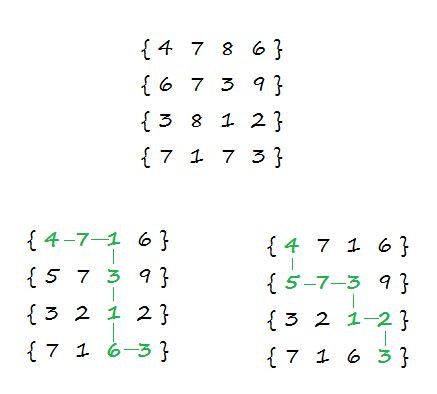

In [ ]:
# Recursive top-down function to count the total number of paths
# to reach cell (m, n) from cell (0, 0) and has given the cost
def countPaths(mat, m, n, cost):

    # base case
    if cost < 0:
        return 0

    # if we are at the first cell (0, 0)
    if m == 0 and n == 0:
        return 1 if (mat[0][0] == cost) else 0

    if m < 0 or n < 0:
        return 0

    # recur to count total paths by going both left and top
    return countPaths(mat, m - 1, n, cost - mat[m][n]) + countPaths(
        mat, m, n - 1, cost - mat[m][n]
    )


if __name__ == "__main__":

    mat = [[4, 7, 1, 6], [5, 7, 3, 9], [3, 2, 1, 2], [7, 1, 6, 3]]

    cost = 25

    print(
        f"Total paths with cost {cost} are",
        countPaths(mat, len(mat) - 1, len(mat[0]) - 1, cost),
    )
# O(2^(m+n)) memoization (m*n*cost)

Total paths with cost 25 are 2


In [78]:
# MAX_K = 1000


def pathCountDPRecDP(mat, m, n, k):

    # Base cases
    if m < 0 or n < 0 or k < 0:
        return 0
    elif m == 0 and n == 0:
        return k == mat[m][n]

    # If this subproblem is already solved
    if dp[m][n][k] != -1:
        return dp[m][n][k]

    # #(m, n) can be reached either
    # through (m-1, n) or through
    # (m, n-1)
    dp[m][n][k] = pathCountDPRecDP(mat, m - 1, n, k - mat[m][n]) + pathCountDPRecDP(
        mat, m, n - 1, k - mat[m][n]
    )

    return dp[m][n][k]


# A wrapper over pathCountDPRecDP()
def pathCountDP(mat, k):
    return pathCountDPRecDP(mat, R - 1, C - 1, k)


# Driver Code
cost_K = 50

# Initialising dp[][][]
R = len(mat)
C = len(mat[0])

mat = [[4, 7, 1, 6], [5, 7, 3, 9], [3, 2, 1, 2], [7, 1, 6, 3]]

cost = 25

dp = [[[-1 for col in range(cost_K)] for col in range(C)] for row in range(R)]


print(pathCountDP(mat, cost))

2


In [6]:
# class Solution:
def numberOfPath(n, k, arr):
    dp = [[[0] * (k + 1) for _ in range(n)] for _ in range(n)]
    if arr[0][0] <= k:
        dp[0][0][arr[0][0]] = 1

    for i in range(n):
        for j in range(n):
            for m in range(1, k + 1):
                if m - arr[i][j] >= 0:
                    if i - 1 >= 0:
                        dp[i][j][m] += dp[i - 1][j][m - arr[i][j]]
                    if j - 1 >= 0:
                        dp[i][j][m] += dp[i][j - 1][m - arr[i][j]]

    return dp[-1][-1][k]


mat = [[4, 7, 1, 6], [5, 7, 3, 9], [3, 2, 1, 2], [7, 1, 6, 3]]

cost = 25
numberOfPath(4, cost, mat)

2

In [79]:
# class Solution:
def numberOfPath(n, k, arr):
    dp = [[[0] * (k + 1) for _ in range(n)] for _ in range(n)]
    if arr[n - 1][n - 1] <= k:
        dp[n - 1][n - 1][arr[n - 1][n - 1]] = 1

    for i in range(n - 1, -1, -1):
        for j in range(n - 1, -1, -1):
            for m in range(1, k + 1):
                if m - arr[i][j] >= 0:
                    if i + 1 < n:
                        dp[i][j][m] += dp[i + 1][j][m - arr[i][j]]
                    if j + 1 < n:
                        dp[i][j][m] += dp[i][j + 1][m - arr[i][j]]

    return dp[0][0][k]


mat = [[4, 7, 1, 6], [5, 7, 3, 9], [3, 2, 1, 2], [7, 1, 6, 3]]

cost = 25
numberOfPath(4, cost, mat)

2

**Minimum path sum in Triangular Grid**

At every cell we can move in only two directions: either to the bottom cell (↓) or to the bottom-right cell(↘)

In [10]:
triangle = [[1], [2, 3], [3, 6, 7], [8, 9, 6, 10]]
n = len(triangle)


def solve(tringle, i, j, m, n):
    if i == m - 1 and j == n - 1:
        return tringle[i][j]

    if j > i:
        return 1e3
    if i >= m or j >= n:
        return 1e3
    dig = tringle[i][j] + solve(tringle, i + 1, j + 1, m, n)
    down = tringle[i][j] + solve(tringle, i + 1, j, m, n)
    right = triangle[i][j] + solve(tringle, i, j + 1, m, n)
    return min(dig, down, right)

In [11]:
solve(triangle, 0, 0, n, n)

21

In [7]:
triangle = [[1], [2, 3], [3, 6, 7], [8, 9, 6, 10]]
n = len(triangle)
dp = [[1e2 for i in range(n)] for _ in range(n)]

# frist row
dp[0][0] = triangle[0][0]

# frist column
for i in range(1, n):
    dp[i][0] = triangle[i][0] + dp[i - 1][0]

for i in range(1, n):
    for j in range(1, n):
        if j > i:
            continue
        down = triangle[i][j] + dp[i - 1][j]
        dig = triangle[i][j] + dp[i - 1][j - 1]
        right = triangle[i][j] + dp[i][j - 1]
        dp[i][j] = min(down, dig, right)
dp

[[1, 100.0, 100.0, 100.0],
 [3, 4, 100.0, 100.0],
 [6, 9, 11, 100.0],
 [14, 15, 15, 21]]

In [16]:
triangle = [[1], [2, 3], [3, 6, 7], [8, 9, 6, 10]]
n = len(triangle)
prev = [-1e2 for i in range(n)]

# frist row
prev[0] = triangle[0][0]


for i in range(1, n):
    temp = [0] * n
    temp[0] = triangle[i][0] + prev[0]
    for j in range(1, n):
        if j > i:
            continue
        up = prev[j - 1] + triangle[i][j]
        left = temp[j - 1] + triangle[i][j]
        dig = triangle[i][j] + prev[j - 1]
        temp[j] = max(up, left, dig)
    prev = temp
prev

[14, 23, 29, 39]

**Minimum/Maximum Falling Path Sum**

We need to find the maximum path sum from any cell of the first row to any cell of the last row.

At every cell we can move in three directions: to the bottom cell (↓), to the bottom-right cell(↘), or to the bottom-left cell(↙).

In [19]:
cost = [[1, 2, 10, 4], [100, 3, 2, 1], [1, 1, 20, 2], [1, 2, 2, 1]]
m, n = len(cost), len(cost[0])


def solve(m, n, r, c, cost):

    if m < 0 or n < 0:
        return float("-inf")

    if m >= r or n >= c:
        return float("-inf")

    if m == 0 and n >= 0:
        return cost[m][n]

    up = cost[m][n] + solve(m - 1, n, r, c, cost)
    ldig = cost[m][n] + solve(m - 1, n - 1, r, c, cost)
    rdig = cost[m][n] + solve(m - 1, n + 1, r, c, cost)
    return max(up, ldig, rdig)


maxi = -1e5
for j in range(n):
    ans = solve(m - 1, j, m, n, cost)
    maxi = max(maxi, ans)

maxi

105

In [25]:
def solve(matrix):
    m = len(matrix)  # Number of rows
    n = len(matrix[0])  # Number of columns

    # Initialize a dynamic programming table (dp) with zeros
    dp = [[0 for j in range(n)] for i in range(m)]

    # Initializing the first row of dp as the base condition
    for j in range(n):
        dp[0][j] = matrix[0][j]
    for i in range(1, m):
        for j in range(n):
            up = cost[i][j] + dp[i - 1][j]
            ldig = float("-inf")
            if i - 1 >= 0 and j - 1 >= 0:
                ldig = cost[i][j] + dp[i - 1][j - 1]
            rdig = float("-inf")
            if i - 1 >= 0 and j + 1 < n:
                rdig = cost[i][j] + dp[i - 1][j + 1]
            dp[i][j] = max(up, ldig, rdig)
    return dp


cost = [[1, 2, 10, 4], [100, 3, 2, 1], [1, 1, 20, 2], [1, 2, 2, 1]]
solve(cost)

[[1, 2, 10, 4], [102, 13, 12, 11], [103, 103, 33, 14], [104, 105, 105, 34]]

In [31]:
def solve(matrix):
    m = len(matrix)  # Number of rows
    n = len(matrix[0])  # Number of columns

    # Initialize a dynamic programming table (dp) with zeros
    prev = [0 for j in range(n)]

    # Initializing the first row of dp as the base condition
    for j in range(n):
        prev[j] = matrix[0][j]

    for i in range(1, m):
        temp = [0] * n
        for j in range(n):
            up = matrix[i][j] + prev[j]
            ldig = float("-inf")
            if i - 1 >= 0 and j - 1 >= 0:
                ldig = matrix[i][j] + prev[j - 1]
            rdig = float("-inf")
            if i - 1 >= 0 and j + 1 < n:
                rdig = matrix[i][j] + prev[j + 1]
            temp[j] = max(up, ldig, rdig)
        prev = temp
    return prev


cost = [[1, 2, 10, 4], [100, 3, 2, 1], [1, 1, 20, 2], [1, 2, 2, 1]]
solve(cost)

[104, 105, 105, 34]

A falling path with non-zero shifts is a choice of exactly one element from each row of grid such that no two elements chosen in adjacent rows are in the same column.

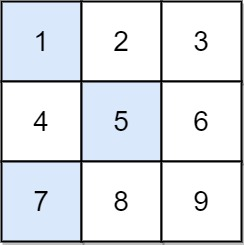



Input: grid = [[1,2,3],[4,5,6],[7,8,9]]

Output: 13
Explanation: 

The possible falling paths are:

[1,5,9], [1,5,7], [1,6,7], [1,6,8],

[2,4,8], [2,4,9], [2,6,7], [2,6,8],

[3,4,8], [3,4,9], [3,5,7], [3,5,9]

The falling path with the smallest sum is [1,5,7], so the answer is 13

In [ ]:
class Solution:
    def minFallingPathSum(self, grid) -> int:
        def dfs(i, j):
            nonlocal dp, m, n

            # base1; last row so return the cell value
            if i == m - 1:
                return grid[i][j]

            # seen before
            if dp[i][j] != -1:
                return dp[i][j]

            # otherwise compute dp[i][j]
            res = float("inf")
            for col in range(n):
                # pass; same column as j
                if col == j:
                    continue

                # get the current cell value and go to next row i + 1
                temp = grid[i][j] + dfs(i + 1, col)

                # compare
                res = min(res, temp)

            # update
            dp[i][j] = res

            return dp[i][j]

        m, n = len(grid), len(grid[0])

        # dp[i][j] := minimum sum of a falling path with non-zero shifts starting at cell (i, j)
        dp = [[-1 for _ in range(n)] for _ in range(m)]

        minSum = float("inf")

        # run dfs for each possible col on first row
        for j in range(n):
            temp = dfs(0, j)
            minSum = min(minSum, temp)

        return minSum

In [ ]:
class Solution:
    def minFallingPathSum(self, grid) -> int:
        m, n = len(grid), len(grid[0])

        # copy the first row of grid
        dp = grid[0]

        # iterate over rows starting at row 1
        for i in range(1, m):
            newDP = [float("inf")] * n

            # iterate over possible column as the current column
            for j in range(n):
                # find the min value in moving from (i, j) to (i + 1, k)
                # iterate over possible column as the new column k
                for k in range(n):
                    # pass; same column as j
                    if k == j:
                        continue

                    # move from column j to column k
                    temp = grid[i][j] + dp[k]

                    # update column j
                    newDP[j] = min(newDP[j], temp)

            # copy newDP into dp
            dp = newDP

        # get the min of dp
        return min(dp)

[[1, 2, 3], [6, 6, 8], [13, 14, 15]]

3-d DP : Ninja and his friends

We have two friends ‘Alice’ and ‘Bob’. initially, Alice is standing on the cell(0,0) and Bob is standing on the cell(0, M-1). Both of them can move only to the cells below them

in these three directions: to the bottom cell (↓), to the bottom-right cell(↘), or to the bottom-left cell(↙).

When Alica and Bob visit a cell, they take all the chocolates from that cell with them. It can happen that they visit the same cell, in that case, the chocolates need to be
 
considered only once.

Now, we need to understand that we want to move Alice and Bob together. Both of them can individually move three moves but say Alice moves to bottom-left, then Bob can have

three different moves for Alice’s move, and so on. The following figures will help to understand this:

Hence we have a total of 9 different options at every f(i,j1,j2) to move Alice and Bob. 


In [ ]:
import sys


# Recursive function to find the maximum chocolates collected
def maxChocoUtil(i, j1, j2, n, m, grid, dp):
    # Base cases:
    # - If either of the indices is out of bounds, return a large negative value
    # - If we're at the last row, return the sum of chocolates in the two selected columns
    if j1 < 0 or j1 >= m or j2 < 0 or j2 >= m:
        return int(-1e9)
    if i == n - 1:
        if j1 == j2:
            return grid[i][j1]
        else:
            return grid[i][j1] + grid[i][j2]

    # If the result for these indices has already been computed, return it
    if dp[i][j1][j2] != -1:
        return dp[i][j1][j2]

    # Initialize the maximum chocolates collected to a large negative value
    maxi = -sys.maxsize

    # Iterate through the adjacent cells in the next row
    for di in range(-1, 2):  # -1 , 0, 1
        for dj in range(-1, 2):  # -1 , 0, 1
            ans = 0
            if j1 == j2:
                ans = grid[i][j1] + maxChocoUtil(
                    i + 1, j1 + di, j2 + dj, n, m, grid, dp
                )
            else:
                ans = (
                    grid[i][j1]
                    + grid[i][j2]
                    + maxChocoUtil(i + 1, j1 + di, j2 + dj, n, m, grid, dp)
                )
            maxi = max(maxi, ans)

    # Store the maximum chocolates collected in the memoization table
    dp[i][j1][j2] = maxi
    return maxi


# Function to find the maximum chocolates collected
def maximumChocolates(n, m, grid):
    # Initialize a memoization table with -1 values
    dp = [[[-1 for j in range(m)] for i in range(m)] for k in range(n)]

    # Start the recursion from the first row, columns 0 and m-1
    return maxChocoUtil(0, 0, m - 1, n, m, grid, dp)


def main():
    # Define the input matrix and its dimensions
    matrix = [[2, 3, 1, 2], [3, 4, 2, 2], [5, 6, 3, 5]]
    n = len(matrix)
    m = len(matrix[0])

    # Call the maximumChocolates function and print the result
    print(maximumChocolates(n, m, matrix))


if __name__ == "__main__":
    main()

21


In [33]:
import sys


# Function to find the maximum chocolates collected
def maximumChocolates(n, m, grid):
    # Initialize a 3D memoization table dp with zeros
    dp = [[[0 for _ in range(m)] for _ in range(m)] for _ in range(n)]

    # Initialize the values for the last row of dp based on grid values
    for j1 in range(m):
        for j2 in range(m):
            if j1 == j2:
                dp[n - 1][j1][j2] = grid[n - 1][j1]
            else:
                dp[n - 1][j1][j2] = grid[n - 1][j1] + grid[n - 1][j2]

    # Iterate through rows from the second-to-last row to the first row
    for i in range(n - 2, -1, -1):
        for j1 in range(m):
            for j2 in range(m):
                maxi = -sys.maxsize

                # Try out 9 possible options by changing the indices
                for di in range(-1, 2):
                    for dj in range(-1, 2):
                        ans = 0
                        if j1 == j2:
                            ans = grid[i][j1]
                        else:
                            ans = grid[i][j1] + grid[i][j2]

                        if (j1 + di < 0 or j1 + di >= m) or (
                            j2 + dj < 0 or j2 + dj >= m
                        ):
                            ans += int(-1e9)  # A large negative value if out of bounds
                        else:
                            ans += dp[i + 1][j1 + di][
                                j2 + dj
                            ]  # Add the value from the next row

                        maxi = max(ans, maxi)

                # Store the maximum chocolates collected in the memoization table
                dp[i][j1][j2] = maxi

    # Return the maximum chocolates collected in the top row and the last column
    return dp[0][0][m - 1]


def main():
    # Define the input matrix and its dimensions
    matrix = [[2, 3, 1, 2], [3, 4, 2, 2], [5, 6, 3, 5]]
    n = len(matrix)
    m = len(matrix[0])

    # Call the maximumChocolates function and print the result
    print(maximumChocolates(n, m, matrix))


if __name__ == "__main__":
    main()

21


**space-opt**

In [ ]:
import sys


# Function to find the maximum chocolates collected


def maximumChocolates(n, m, grid):

    # Initialize two matrices: front (for the current row) and cur (for the next row)

    front = [[0] * m for _ in range(m)]

    cur = [[0] * m for _ in range(m)]

    # Initialize the values for the last row of front based on grid values

    for j1 in range(m):

        for j2 in range(m):

            if j1 == j2:

                front[j1][j2] = grid[n - 1][j1]

            else:

                front[j1][j2] = grid[n - 1][j1] + grid[n - 1][j2]

    # Iterate through rows from the second-to-last row to the first row

    for i in range(n - 2, -1, -1):

        for j1 in range(m):

            for j2 in range(m):

                maxi = -sys.maxsize

                # Try out 9 possible options by changing the indices

                for di in range(-1, 2):

                    for dj in range(-1, 2):

                        ans = 0

                        if j1 == j2:

                            ans = grid[i][j1]

                        else:

                            ans = grid[i][j1] + grid[i][j2]

                        if (j1 + di < 0 or j1 + di >= m) or (
                            j2 + dj < 0 or j2 + dj >= m
                        ):

                            ans += int(-1e9)  # A large negative value if out of bounds

                        else:

                            ans += front[j1 + di][
                                j2 + dj
                            ]  # Add the value from the current front row

                        maxi = max(ans, maxi)

                cur[j1][j2] = maxi

        # Update front with the values of cur for the next iteration

        front = [row[:] for row in cur]

    # Return the maximum chocolates collected in the top-left corner of front

    return front[0][m - 1]


def main():

    # Define the input matrix and its dimensions

    matrix = [[2, 3, 1, 2], [3, 4, 2, 2], [5, 6, 3, 5]]

    n = len(matrix)

    m = len(matrix[0])

    # Call the maximumChocolates function and print the result

    # print(maximumChocolates(n, m, matrix))


if __name__ == "__main__":

    main()

The slowest run took 5.16 times longer than the fastest. This could mean that an intermediate result is being cached.
2.44 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


Find the longest sequence formed by adjacent numbers in the matrix

In [71]:
# %%timeit -n 5


def dfs(i, j, mat, prev, dp):
    if (i, j, prev) in dp:
        return dp[(i, j, prev)]

    dx = [1, 0, -1, 0]
    dy = [0, 1, 0, -1]
    curr = 1
    for k in range(4):
        xx = i + dx[k]
        yy = j + dy[k]
        if (
            0 <= xx < len(mat)
            and 0 <= yy < len(mat[0])
            and (i, j, prev) not in dp
            and (prev == mat[xx][yy] - 1)
        ):
            curr = max(curr, 1 + dfs(xx, yy, mat, mat[xx][yy], dp))
    dp[(i, j, prev)] = curr
    return dp[(i, j, prev)]


# class Solution:
def longestIncreasingPath(mat):
    ans = 1
    dp = dict()
    row, col = len(mat), len(mat[0])
    for i in range(row):
        for j in range(col):
            ans = max(ans, dfs(i, j, mat, mat[i][j], dp))
    return ans
    # Code here


mat = [
    [10, 13, 14, 21, 23],
    [11, 9, 22, 2, 3],
    [12, 8, 1, 5, 4],
    [15, 24, 7, 6, 20],
    [16, 17, 18, 19, 25],
]

ans = longestIncreasingPath(mat)
ans

6

In [74]:
# %%timeit -n 5


def dfs(i, j, mat, prev, dp):
    if (i, j, prev) in dp:
        return dp[(i, j, prev)]

    dx = [1, 0, -1, 0]
    dy = [0, 1, 0, -1]
    path = None
    for k in range(4):
        xx = i + dx[k]
        yy = j + dy[k]
        if (
            0 <= xx < len(mat)
            and 0 <= yy < len(mat[0])
            and (i, j, prev) not in dp
            and (prev == mat[xx][yy] - 1)
        ):
            path = dfs(xx, yy, mat, mat[xx][yy], dp)
    dp[(i, j, prev)] = f"{mat[i][j]}, {path}" if path else str(mat[i][j])
    return dp[(i, j, prev)]


# class Solution:
def longestIncreasingPath(mat):
    ans = 1
    dp = dict()
    res_size = -sys.maxsize
    row, col = len(mat), len(mat[0])
    for i in range(row):
        for j in range(col):
            path = dfs(i, j, mat, mat[i][j], dp)

            # find the number of elements involved in the current path
            size = path.count(",")
            # update result if a longer path is found
            if size > res_size:
                result = path  # update the longest path found so far
                res_size = size

    return result
    # Code here


mat = [
    [10, 13, 14, 21, 23],
    [11, 9, 22, 2, 3],
    [12, 8, 1, 5, 4],
    [15, 24, 7, 6, 20],
    [16, 17, 18, 19, 25],
]

ans = longestIncreasingPath(mat)
ans

'2, 3, 4, 5, 6, 7'

Find the length of the longest path in a matrix with consecutive characters

In [3]:
# row = [-1, -1, -1, 0, 0, 1, 1, 1]
# col = [-1, 0, 1, -1, 1, -1, 0, 1]
import sys


# check whether cell (x, y) is valid or not
def isValid(x, y, mat):
    return 0 <= x < len(mat) and 0 <= y < len(mat[0])


def dfs(i, j, mat, prev, dp):
    if (i, j, prev) in dp:
        return dp[(i, j, prev)]

    dx = [-1, -1, -1, 0, 0, 1, 1, 1]
    dy = [-1, 0, 1, -1, 1, -1, 0, 1]
    path = None
    for k in range(8):
        xx = i + dx[k]
        yy = j + dy[k]
        if (
            0 <= xx < len(mat)
            and 0 <= yy < len(mat[0])
            and (i, j, prev) not in dp
            and (chr(ord(prev) + 1) == mat[xx][yy])
        ):
            path = dfs(xx, yy, mat, mat[xx][yy], dp)
    dp[(i, j, prev)] = f"{mat[i][j]}, {path}" if path else str(mat[i][j])
    return dp[(i, j, prev)]


# class Solution:
def longestIncreasingPath(mat):
    ans = 1
    dp = dict()
    res_size = -sys.maxsize
    row, col = len(mat), len(mat[0])
    for i in range(row):
        for j in range(col):
            path = dfs(i, j, mat, mat[i][j], dp)

            # find the number of elements involved in the current path
            size = path.count(",")
            # update result if a longer path is found
            if size > res_size:
                result = path  # update the longest path found so far
                res_size = size

    return result


mat = [
    ["D", "E", "H", "X", "B"],
    ["A", "O", "G", "P", "E"],
    ["D", "D", "C", "F", "D"],
    ["E", "B", "E", "A", "S"],
    ["C", "D", "Y", "E", "N"],
]
ans = longestIncreasingPath(mat)
ans

'B, C, D, E, F, G, H'

Ways to reach the bottom-right corner of a matrix with exactly `k` turns allowed

In [122]:
# Function to check whether (i, j) is a valid matrix coordinate or not
def isValid(i, j, M, N):
    return 0 <= i < M and 0 <= j < N


# Recursive function to count the number of different ways to reach the last
# cell (M-1, N-1) of a matrix from the given cell (i, j) with `k` turns left.
# `isCol` flag is true when the current direction is along the column, false otherwise.
def totalWays(M, N, i, j, k, isCol):
    # If the number of turns is exhausted or if the cell is invalid
    if k == -1 or not isValid(i, j, M, N):
        return 0

    # If the destination is reached with exactly `k` turns
    if k == 0 and i == M - 1 and j == N - 1:
        return 1

    # If the current direction is along a column
    if isCol:
        # 1. Continue moving along the column
        # 2. Turn right and decrement the number of turns by 1
        return totalWays(M, N, i + 1, j, k, isCol) + totalWays(
            M, N, i, j + 1, k - 1, not isCol
        )

    # If the current direction is along a row
    # 1. Continue moving along the row
    # 2. Turn down and decrement the number of turns by 1
    return totalWays(M, N, i, j + 1, k, isCol) + totalWays(
        M, N, i + 1, j, k - 1, not isCol
    )


# Function to count the number of different ways to reach the bottom-right corner
# of a matrix from its top-left corner with exactly `k` turns allowed
def findTotalWays(M, N, k, i=0, j=0):
    # Recur by moving along a column and a row.
    return totalWays(M, N, i + 1, j, k, True) + totalWays(M, N, i, j + 1, k, False)


if __name__ == "__main__":

    # `M × N` matrix
    M = N = 3

    # Number of turns
    k = 2

    print("The total number of ways is", findTotalWays(M, N, k))

The total number of ways is 2


 Santa wants to give gifts and chocolates to the kids who live in the building which is present at the cell (N - 1, M - 1). 
 
 Initially, Santa is present on cell (0, 0).

 The time taken to reach from one building to another is equal to the absolute difference between the heights of buildings.

 8 dir allowed

In [22]:
from heapq import *


def find_shortest_path(heights):
    rows = len(heights)
    cols = len(heights[0])
    dp = [[float("inf")] * cols for _ in range(rows)]
    dp[0][0] = 0
    pq = [(0, (0, 0))]

    while pq:
        current_time, (row, col) = heappop(pq)
        for i, j in [
            (1, 0),
            (-1, 0),
            (0, 1),
            (0, -1),
            (1, 1),
            (1, -1),
            (-1, 1),
            (-1, -1),
        ]:
            next_row = row + i
            next_col = col + j
            if 0 <= next_row < rows and 0 <= next_col < cols:
                new_time = current_time + abs(
                    heights[row][col] - heights[next_row][next_col]
                )
                if new_time < dp[next_row][next_col]:
                    dp[next_row][next_col] = new_time
                    heappush(pq, (new_time, (next_row, next_col)))

    return dp[rows - 1][cols - 1]

Given a matrix A[][] of size N * M columns each element consists of either 0 representing free space and 1 representing wall.

 In one operation you can move from the current cell to Up, Down, Left or Right with 0 cost and move diagonally with cost 1. 
 
 The task is to find the minimum cost to travel from top-left to bottom-right.

 The time complexity of the given code is O(N*Mlog(N*M))

In [23]:
import heapq

# King path
dx = [1, -1, 0, 0, 1, -1, 1, -1]
dy = [0, 0, 1, -1, 1, 1, -1, -1]


# Function to check if given coordinates
# are inside the grid or not
def ok(X, Y, N, M):
    return 0 <= X < N and 0 <= Y < M


# Function to find minimum cost to
# traverse from (0, 0) to (N-1, M-1)
def minCost(A, N, M):
    # Distance array
    dist = [[float("inf") for _ in range(M)] for _ in range(N)]

    # Source distance initialized
    # with zero
    dist[0][0] = 0

    # Priority queue for Dijkstra's Algorithm
    pq = [(0, (0, 0))]

    # Running Dijkstra's Algorithm
    while pq:
        # Top element of priority queue
        curDist, (curX, curY) = heapq.heappop(pq)

        # If the current distance is greater than
        # the distance in the distance array, skip it
        if curDist > dist[curX][curY]:
            continue

        for i in range(8):
            # New coordinates
            newX, newY = curX + dx[i], curY + dy[i]

            if ok(newX, newY, N, M) and A[newX][newY] == 0:
                cost = 0

                # If diagonal move, set cost to 1
                if i > 3:
                    cost = 1

                newDist = curDist + cost

                # If the new distance is smaller than
                # the distance in the distance array, update it
                if newDist < dist[newX][newY]:
                    dist[newX][newY] = newDist
                    heapq.heappush(pq, (newDist, (newX, newY)))

    # Returning the final answer
    return dist[N - 1][M - 1]


# Driver Code
if __name__ == "__main__":
    # Input 1
    N = 4
    M = 4
    A = [[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0]]

    # Function Call
    print(minCost(A, N, M))

    # Input 2
    N1 = 5
    M1 = 5
    A1 = [
        [0, 0, 1, 0, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 0, 1, 1],
        [1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0],
    ]

    # Function Call
    print(minCost(A1, N1, M1))

1
2


Let there be a subarray [L, R] whose average is equal to K, then
=> K = average[L, R] = sum[0, R] – sum[0, L-1] / (R – L + 1)
=> (R – L + 1) * K = sum[0, R] – sum[0, L – 1]
=> R * k – (L – 1)* K = sum[0, R] – sum[0, L – 1]
=> sum[0, R] – R * k = sum[0, L – 1]  – (L – 1)* K


If every element is decreased by K, then the average will also decrease by K. Therefore, the average can be reduced to zero, so the problem becomes finding the number of subarrays having average equals zero.
The average zero is possible only if:
sum[0, R] – sum[0, L-1] / (R – L + 1) = 0
=> sum[0, R] = sum[0, L-1]

In [ ]:
# Python Program for the above approach


# Function to count subarray having average
# exactly equal to K
def countKAverageSubarrays(arr, n, k):

    result = 0
    curSum = 0

    # Store the frequency of prefix
    # sum of the array arr[]
    mp = dict()

    for i in range(0, n):

        # Subtract k from each element,
        # then add it to curSum
        curSum += arr[i] - k

        # If curSum is 0 that means
        # sum[0...i] is 0 so increment
        # res
        if curSum == 0:
            result += 1

        # Check if curSum has occurred
        # before and if it has occurred
        # before, add it's frequency to
        # res
        if curSum in mp:
            result += mp[curSum]

        # Increment the frequency
        # of curSum
        if curSum in mp:
            mp[curSum] += 1
        else:
            mp[curSum] = 1

    # Return result
    return result


# Driver code
if __name__ == "__main__":

    # Given Input
    K = 6
    arr = [12, 5, 3, 10, 4, 8, 10, 12, -6, -1]
    N = len(arr)

    # Function Call
    print(countKAverageSubarrays(arr, N, K))

# This code is contributed by MuskanKalra1

In [ ]:
maxsize = int(1e9 + 7)


# function to find the smallest sum
# contiguous subarray
def smallestSumSubarr(arr, n):
    # to store the minimum value that is ending
    # up to the current index
    min_ending_here = maxsize

    # to store the minimum value encountered so far
    min_so_far = maxsize

    # traverse the array elements
    for i in range(n):
        # if min_ending_here > 0, then it could not possibly
        # contribute to the minimum sum further
        if min_ending_here > 0:
            min_ending_here = arr[i]

        # else add the value arr[i] to min_ending_here
        else:
            min_ending_here += arr[i]

        # update min_so_far
        min_so_far = min(min_so_far, min_ending_here)

    # required smallest sum contiguous subarray value
    return min_so_far

# subset sum

**subset sum**

Given two integers N and K, the task is to count the number of ways to divide N into K groups of positive integers such that their sum is N and the number of elements in groups follows a non-decreasing order (i.e group[i] <= group[i+1]).

In [1]:
# Python3 implementation to count the
# number of ways to divide N in
# groups such that each group
# has K number of elements


# Function to count the number
# of ways to divide the number N
# in groups such that each group
# has K number of elements
def calculate(pos, prev, left, k):

    # Base Case
    if pos == k:
        if left == 0:
            return 1
        else:
            return 0

    # If N is divides completely
    # into less than k groups
    if left == 0:
        return 0

    answer = 0

    # Put all possible values
    # greater equal to prev
    for i in range(prev, left + 1):
        answer += calculate(pos + 1, i, left - i, k)

    return answer


# Function to count the number of
# ways to divide the number N
def countWaystoDivide(n, k):

    return calculate(0, 1, n, k)


# Driver Code
if __name__ == "__main__":

    N = 8
    K = 4

    print(countWaystoDivide(N, K))

# This code is contributed by 29AjayKumar

5


In [5]:
def solve(n, k, pos, left, prev=1):
    if pos == k:
        if left == 0:
            return 1
        else:
            return 0
    if left <= 0:
        return 0
    if prev > n:
        return 0

    inc = solve(n, k, pos + 1, left - prev, prev)
    exc = solve(n, k, pos, left, prev + 1)
    return inc + exc


solve(8, 4, 0, 8, 1)

5

In [2]:
# Python3 implementation to count the
# number of ways to divide N in
# groups such that each group
# has K number of elements

# DP Table
# Function to count the number of
# ways to divide the number N in groups


def countWaystoDivide(n, k):
    if n < k:
        return 0

    dp = [[0 for i in range(k + 1)] for i in range(n + 1)]
    for i in range(1, n + 1):
        dp[i][1] = 1
    dp[0][0] = 1
    for i in range(1, n + 1):
        for j in range(2, k + 1):
            if i >= j:
                dp[i][j] = dp[i - 1][j - 1] + dp[i - j][j]

            else:
                dp[i][j] = dp[i - 1][j - 1]
    return dp[n][k]


# Driver Code
if __name__ == "__main__":
    N = 8
    K = 4

    print(countWaystoDivide(N, K))

# This code is contributed by Rajput-Ji

5


In [36]:
arr = [1, 2, 3, 4]
k = 9


def solve(arr, i, k):
    if i < 0 or k < 0:
        return False
    if (i == 0 and arr[i] == k) or k == 0:
        return True
    notpick = solve(arr, i - 1, k)
    pick = False
    if arr[i] <= k:
        pick = solve(arr, i - 1, k - arr[i])
    return pick or notpick


solve(arr, len(arr) - 1, k)

True

In [2]:
arr = [1, 2, 3, 4]
k = 5
n = len(arr)
dp = [[False for _ in range(k + 1)] for _ in range(n)]

for i in range(n):
    dp[i][0] = True
# for j in range(k + 1):
if arr[0] <= k:
    dp[0][arr[0]] = True

for i in range(1, n):
    for target in range(1, k + 1):
        notpick = dp[i - 1][target]
        pick = False
        if arr[i] <= target:
            pick = dp[i - 1][target - arr[i]]
        dp[i][target] = pick or notpick
dp[-1][k]

True

**space-opt**

In [3]:
arr = [1, 2, 3, 4]
k = 10
n = len(arr)
prev = [False for _ in range(k + 1)]
prev[0] = True


if arr[0] <= k:
    prev[arr[0]] = True

temp = [False] * (k + 1)

for i in range(1, n):

    temp[0] = True
    for target in range(1, k + 1):

        notpick = prev[target]
        pick = False
        if arr[i] <= target:
            pick = prev[target - arr[i]]
        temp[target] = pick or notpick
    prev = temp.copy()
prev

[True, True, True, True, True, True, True, True, True, True, True]

You have to tell the minimum number of elements you have to take to reach the target sum ‘X’.

In [ ]:
def solve(num, x):
    if x == 0:
        return 0

    n = len(num)
    num.sort()
    dp = [[0 for _ in range(x + 1)] for _ in range(n)]

    for j in range(1, x + 1):
        if j % num[0] == 0:
            dp[0][j] = j // num[0]
        else:
            dp[0][j] = float("inf")

    for i in range(1, n):
        for j in range(1, x + 1):
            notake = dp[i - 1][j]
            take = float("inf")
            if num[i] <= j:
                take = 1 + dp[i][j - num[i]]
            dp[i][j] = min(take, notake)
    return dp[-1][x] if dp[-1][x] != float("inf") else -1

**Unbounded knapsack Repetition of items allowed**

In [41]:
w = 10
wt = [2, 4, 6]
val = [5, 11, 13]


def solve(wt, val, i, w):
    if i < 0 or w < 0:
        return -1e3
    if i == 0:
        if w > 0 and w % wt[0] == 0:
            return (w // wt[0]) * val[0]
        return -1e3
    notpick = solve(wt, val, i - 1, w)
    pick = -1e3
    if wt[i] <= w:
        pick = val[i] + solve(wt, val, i, w - wt[i])
    return max(pick, notpick)


solve(wt, val, 2, w)

27

In [ ]:
w = 10
wt = [2, 4, 6]
val = [5, 11, 13]

n = len(val)
dp = [[0 for _ in range(w + 1)] for _ in range(n)]


for j in range(1, w + 1):
    if j % wt[0] == 0:
        dp[0][j] = (j // wt[0]) * val[0]
for i in range(1, n):
    for weight in range(w + 1):
        notpick = dp[i - 1][weight]
        pick = -1e3
        if wt[i] <= weight:
            pick = val[i] + dp[i][weight - wt[i]]
        dp[i][weight] = max(pick, notpick)

dp

[[0, 0, 5, 0, 10, 0, 15, 0, 20, 0, 25],
 [0, 0, 5, 0, 11, 11, 16, 11, 22, 22, 27],
 [0, 0, 5, 0, 11, 11, 16, 13, 22, 22, 27]]

**space-opt**

In [38]:
w = 10
wt = [2, 4, 6]
val = [5, 11, 13]

n = len(val)
prev = [0 for _ in range(w + 1)]


for j in range(1, w + 1):
    if j % wt[0] == 0:
        prev[j] = (j // wt[0]) * val[0]


for i in range(1, n):
    temp = [0 for _ in range(w + 1)]

    for weight in range(w + 1):
        notpick = prev[weight]
        pick = -1e3
        if wt[i] <= weight:
            pick = val[i] + temp[weight - wt[i]]
        temp[weight] = max(pick, notpick)
    prev = temp
prev

[0, 0, 5, 0, 11, 11, 16, 13, 22, 22, 27]

**0 1 knapscak item can't be repeated**

**Count subset sum with repeatation not allowed**

In [16]:
# arr = [1, 2, 2, 3]
# k = 3

arr = [0, 1, 3]
k = 4


def solve(arr, n, k):

    # if k == 0:
    #     return 1

    if n == 0:
        if k == 0 and arr[0] == 0:
            return 2
        if k == arr[0] or k == 0:
            return 1
        return 0

    if n < 0 or k < 0:
        return 0

    notpick = solve(arr, n - 1, k)
    pick = 0
    if k >= arr[n]:
        pick = solve(arr, n - 1, k - arr[n])
    return pick + notpick


solve(arr, len(arr) - 1, k)

2

In [27]:
# arr = [1, 2, 2, 3]
# k = 3

# 1 <= 'n' <= 100
# 0 <= 'arr[i]' <= 1000
# 1 <= 'k' <= 1000

arr = [1, 0, 3]  # [12, 14, 3, 18, 2]  #
k = 4  # 13  # 4
n = len(arr)

dp = [[0 for _ in range(k + 1)] for _ in range(n)]
# for sum = 0 there is always 1 solution
for i in range(n):
    dp[i][0] = 1

if arr[0] != 0 and arr[0] <= k:
    dp[0][arr[0]] = 1

if arr[0] == 0:  # if arr contains zero there will be two include 0 or not include zero
    dp[0][0] = 2


for i in range(1, n):
    for target in range(k + 1):  # (1,k+1) gives wrong output
        notpick = dp[i - 1][target]
        pick = 0
        if arr[i] <= target:

            pick = dp[i - 1][target - arr[i]]
        dp[i][target] = pick + notpick
dp

[[1, 1, 0, 0, 0], [2, 2, 0, 0, 0], [2, 2, 0, 2, 2]]

**space-opt**

In [22]:
# arr = [1, 2, 2, 3]
# k = 3

arr = [1, 0, 3]
k = 4

n = len(arr)
prev = [0 for _ in range(k + 1)]
# for sum = 0 there is always 1 solution
prev[0] = 1
if arr[0] <= k:
    prev[arr[0]] = 1

if arr[0] == 0:
    prev[0] = 2

temp = [0] * (k + 1)

for i in range(1, n):

    temp[0] = 1
    if arr[0] == 0:
        temp[0] = 2
    for target in range(k + 1):
        notpick = prev[target]
        pick = 0
        if arr[i] <= target:
            pick = prev[target - arr[i]]
        temp[target] = pick + notpick
    prev = temp.copy()
prev

[2, 2, 0, 2, 2]

We need to tell the minimum number of coins required to reach the target sum.

In [34]:
def minimumElements(arr, T):
    n = len(arr)
    # Initialize a DP table with 0 values for bottom-up dynamic programming.
    dp = [[0 for _ in range(T + 1)] for _ in range(n)]

    # Fill in the DP table for the first element in the array (base case).
    for i in range(T + 1):
        if i % arr[0] == 0:
            dp[0][i] = i // arr[0]
        else:
            # Set an initial large value to indicate that it's not possible to achieve the target sum.
            dp[0][i] = int(1e9)

    # Iterate over the array elements and target values to fill in the DP table.
    for ind in range(1, n):
        for target in range(T + 1):
            # Calculate the minimum number of elements needed to achieve the current target.
            notTake = dp[ind - 1][target]  # Option: Don't take the current element.
            take = int(1e9)  # Initialize as a large value.
            if arr[ind] <= target:
                # Option: Take the current element, reduce the target, and add 1 to the count.
                take = 1 + dp[ind][target - arr[ind]]
            # Store the minimum of the two options in the DP table.
            dp[ind][target] = min(notTake, take)

    # The result is stored in the last cell of the DP table.
    ans = dp[n - 1][T]
    # If the result is still equal to a very large value, it means it's not possible to achieve the target sum.
    if ans >= int(1e9):
        return -1
    return ans


def main():
    arr = [1, 2, 3]
    T = 7
    print(
        "The minimum number of coins required to form the target sum is",
        minimumElements(arr, T),
    )


if __name__ == "__main__":
    main()

The minimum number of coins required to form the target sum is 3


In [4]:
def solve(arr, n, s, temp, k):
    if k == s:
        print(temp)
        return

        # return 1
    if n >= len(arr) or s > k:
        return

    for i in range(n, len(arr)):
        temp.append(arr[i])
        solve(
            arr, i, s + arr[i], temp, k
        )  # changing n will not give all the combinations
        temp.pop()


solve([1, 2, 3], 0, 0, [], 4)

[1, 1, 1, 1]
[1, 1, 2]
[1, 3]
[2, 2]


In [6]:
def solve(arr, n, s, temp, k):
    if k == s:
        print(temp)
        return

        # return 1
    if n < 0 or s > k:
        return

    for i in range(n, -1, -1):
        temp.append(arr[i])
        solve(
            arr, i, s + arr[i], temp, k
        )  # changing n will not give all the combinations
        temp.pop()


solve([1, 2, 3], 2, 0, [], 4)

[3, 1]
[2, 2]
[2, 1, 1]
[1, 1, 1, 1]


In [5]:
def solve(arr, n, s, temp, k):
    if k == s:
        print(temp)
        return

        # return 1
    if n >= len(arr) or s > k:
        return

    for i in range(n, len(arr)):
        temp.append(arr[i])
        solve(
            arr, i + 1, s + arr[i], temp, k
        )  # changing n will not give all the combinations
        temp.pop()


solve([1, 2, 3], 0, 0, [], 4)

[1, 3]


In [7]:
def solve(arr, n, s, temp, k):
    if k == s:
        print(temp)
        return

        # return 1
    if n < 0 or s > k:
        return

    for i in range(n, -1, -1):
        temp.append(arr[i])
        solve(
            arr, i - 1, s + arr[i], temp, k
        )  # changing n will not give all the combinations
        temp.pop()


solve([1, 2, 3], 2, 0, [], 4)

[3, 1]


In [3]:
def solve(arr, n, s, temp, k):
    if k == s:
        print(temp)
        return

        # return 1
    if n >= len(arr) or s > k:
        return

    for i in range(n, len(arr)):
        temp.append(arr[i])
        solve(
            arr, n, s + arr[i], temp, k
        )  # changing n will not give all the combinations
        temp.pop()


solve([1, 2, 3], 0, 0, [], 4)

[1, 1, 1, 1]
[1, 1, 2]
[1, 2, 1]
[1, 3]
[2, 1, 1]
[2, 2]
[3, 1]


In [ ]:
# Patterns:
# dp[0] = 1 # indicating there is 1 way to have target = 0, and 1 way is to not use any of the numbers in the nums array.
# dp[1] = dp[0]
# dp[2] = dp[1] + dp[0]
# dp[3] = dp[2] + dp[1] + dp[0]
# dp[4] = dp[3] + dp[2] + dp[1]
# Formula:
# dp[i] = sum(dp[i-j]) where i is the current target, and j is in range(nums)
class Solution:
    def combinationSum4(self, nums, target: int) -> int:
        dp = [0] * (target + 1)
        dp[0] = 1
        for i in range(1, target + 1):
            for x in nums:
                if x <= i:  # discard the negative states
                    dp[i] += dp[i - x]
        return dp[target]

**Count subset sum with repeatation allowed**

In [28]:
arr = [2, 5, 3, 6]
k = 10


def solve(arr, n, k):
    if n < 0 or k < 0:
        return 0
    if k == 0:
        return 1
    if n == 0:
        if k >= arr[n] and k % arr[n] == 0:
            return 1
        return 0
    notpick = solve(arr, n - 1, k)
    pick = 0
    if k >= arr[n]:
        pick = solve(arr, n, k - arr[n])
    return pick + notpick

In [29]:
solve(arr, 3, 10)

5

In [45]:
arr = [2, 5, 3, 6]
k = 10
n = len(arr)
dp = [[0 for _ in range(k + 1)] for _ in range(n)]

for i in range(n):
    dp[i][0] = 1
for j in range(1, k + 1):
    if j % arr[0] == 0:
        dp[0][j] = 1  # j // arr[0]
for i in range(1, n):
    for j in range(1, k + 1):
        notpick = dp[i - 1][j]
        pick = 0
        if j >= arr[i]:
            pick = dp[i][j - arr[i]]
        dp[i][j] = pick + notpick
dp

[[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2],
 [1, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4],
 [1, 0, 1, 1, 1, 2, 3, 2, 4, 4, 5]]

**space-opt**

In [40]:
arr = [2, 5, 3, 6]
k = 10
n = len(arr)
prev = [0 for _ in range(k + 1)]
# for sum = 0 there is always 1 solution
prev[0] = 1
for j in range(1, k + 1):
    if j % arr[0] == 0:
        prev[j] = 1

for i in range(1, n):
    temp = [0] * (k + 1)
    temp[0] = 1
    for target in range(1, k + 1):
        notpick = prev[target]
        pick = 0
        if arr[i] <= target:
            pick = temp[target - arr[i]]
        temp[target] = pick + notpick
    prev = temp
prev

[1, 0, 1, 1, 1, 2, 3, 2, 4, 4, 5]

**Maximum Product Rod Cutting**

In [101]:
def solve(n, i):
    if i > n:
        return 1
    if n <= 0:
        return 1
    nocut = solve(n, i + 1)
    cut = n
    if n >= i:
        cut = i * solve(n - i, i)
    return max(cut, nocut)


n = 15
solve(n, 1)

243

In [110]:
def solve(n):
    dp = [[1 for _ in range(n + 1)] for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            nocut = dp[i - 1][j]
            cut = j
            if j >= i:
                cut = i * dp[i][j - i]
            dp[i][j] = max(cut, nocut)
    return dp[-1][-1]


solve(15)

243

**space-opt**

In [112]:
def solve(n):
    prev = [1] * (n + 1)
    temp = [1] * (n + 1)
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            nocut = prev[j]
            cut = j
            if j >= i:
                cut = i * temp[j - i]
            temp[j] = max(cut, nocut)
        prev = temp
    return temp[-1]


solve(15)

243

In [95]:
def maxProd(n):

    # Base cases
    if n == 0 or n == 1:
        return 0

    # Make a cut at different places
    # and take the maximum of all
    max_val = 0
    for i in range(1, n - 1):
        max_val = max(max_val, max(i * (n - i), maxProd(n - i) * i))

    # Return the maximum of all values
    return max_val


maxProd(15)

243

**Rod cutting**

In [45]:
def cutRod(price, index, n):

    #  base case
    if index == 0:
        return n * price[0]

    #   At any index we have 2 options either
    #   cut the rod of this length or not cut
    #   it
    notCut = cutRod(price, index - 1, n)
    cut = float("-inf")
    rod_length = index + 1  # zero base index

    if rod_length <= n:

        cut = price[index] + cutRod(price, index, n - rod_length)

    return max(notCut, cut)


#  Driver program to test above functions
arr = [1, 5, 8, 9, 10, 17, 17, 20]
size = len(arr)
print("Maximum Obtainable Value is ", cutRod(arr, size - 1, size))

Maximum Obtainable Value is  22


In [1]:
arr = [1, 5, 8, 9, 10, 17, 17, 20]
k = len(arr)
dp = [[0 for _ in range(k + 1)] for _ in range(k)]
for j in range(1, k + 1):
    dp[0][j] = j * arr[0]

for i in range(1, k):
    for j in range(1, k + 1):
        nocut = dp[i - 1][j]
        cut = float("-inf")
        if j - i >= 0:
            cut = arr[i - 1] + dp[i][j - i]
        dp[i][j] = max(nocut, cut)
dp

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 5, 6, 10, 11, 15, 16, 20],
 [0, 1, 5, 8, 10, 13, 16, 18, 21],
 [0, 1, 5, 8, 10, 13, 16, 18, 21],
 [0, 1, 5, 8, 10, 13, 16, 18, 21],
 [0, 1, 5, 8, 10, 13, 17, 18, 22],
 [0, 1, 5, 8, 10, 13, 17, 18, 22]]

**space-opt**

In [2]:
arr = [1, 5, 8, 9, 10, 17, 17, 20]
k = len(arr)
prev = [0 for _ in range(k + 1)]
for j in range(1, k + 1):
    prev[j] = j * arr[0]

for i in range(1, k):
    temp = [0 for _ in range(k + 1)]
    for j in range(1, k + 1):
        nocut = prev[j]
        cut = float("-inf")
        if j - i >= 0:
            cut = arr[i - 1] + temp[j - i]
        temp[j] = max(nocut, cut)
    prev = temp
prev

[0, 1, 5, 8, 10, 13, 17, 18, 22]

**Count Partitions with Given Difference**

to do - top down and space-op

In [45]:
mod = int(1e9 + 7)


def countPartitionsUtil(ind, target, arr, dp):
    if ind == 0:
        if target == 0 and arr[0] == 0:
            return 2
        if target == 0 or target == arr[0]:
            return 1
        return 0

    if dp[ind][target] != -1:
        return dp[ind][target]

    notTaken = countPartitionsUtil(ind - 1, target, arr, dp)

    taken = 0
    if arr[ind] <= target:
        taken = countPartitionsUtil(ind - 1, target - arr[ind], arr, dp)

    dp[ind][target] = (notTaken + taken) % mod
    return dp[ind][target]


def countPartitions(d, arr):
    n = len(arr)
    totSum = sum(arr)

    # Checking for edge cases
    if totSum - d < 0:
        return 0
    if (totSum - d) % 2 == 1:
        return 0

    s2 = (totSum - d) // 2

    dp = [[-1 for j in range(s2 + 1)] for i in range(n)]
    return countPartitionsUtil(n - 1, s2, arr, dp)


def main():
    arr = [5, 2, 6, 4]
    d = 3

    print("The number of subsets found are", countPartitions(d, arr))


if __name__ == "__main__":
    main()

The number of subsets found are 1


Given an array of non-negative integers ‘A’ and an integer ‘P’, find the total number of subsequences of ‘A’ 

such that the product of any subsequence should not be more than ‘P’.

In [3]:
def solve(a, i, p, k):
    if i < 0 and k <= p:
        return 1
    if i < 0:
        return 0
    exc = solve(a, i - 1, p, k)
    inc = 0

    if k * a[i] <= p:
        inc = solve(a, i - 1, p, k * a[i])
    return exc + inc


solve([1, 2, 3, 4], 3, 10, 1) - 1  # remove empaty

11

In [2]:
# A Python program to count the number of subsets
# with a product less than or equal to k using tabulation
def numOfSubsets(arr, k):
    n = len(arr)

    # Initialize the DP table with 1s to
    # include the empty subset.
    dp = [[1] * (k + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, k + 1):
            # Case 1: Exclude the current element
            dp[i][j] = dp[i - 1][j]

            # Case 2: Include the current element
            if j >= arr[i - 1]:
                dp[i][j] += dp[i - 1][j // arr[i - 1]]

    # Return the total count of subsets
    # with product ≤ k, subtracting 1
    return dp[n][k] - 1


arr = [1, 2, 3, 4]
k = 10
print(numOfSubsets(arr, k))

11


**Partition Set Into 2 Subsets With Min Absolute Sum**

In [46]:
def minSubsetSumDifference(arr, n):
    # Calculate the total sum of the array elements.
    totSum = sum(arr)

    # Initialize a boolean array 'prev' to store the results for the previous row.
    prev = [False] * (totSum + 1)
    prev[0] = True  # Base case: An empty subset can always achieve a sum of 0.

    # Handle the base case for the first element in the array.
    if arr[0] <= totSum:
        prev[arr[0]] = True

    # Iterate through the elements in the array.
    for ind in range(1, n):
        # Initialize a new boolean array 'cur' for the current row.
        cur = [False] * (totSum + 1)
        cur[0] = True  # An empty subset can always achieve a sum of 0.

        # Fill in the 'cur' array using dynamic programming.
        for target in range(1, totSum + 1):
            # If the current element is not taken, the result is the same as the previous row.
            notTaken = prev[target]

            # If the current element is taken, subtract its value from the target and check the previous row.
            taken = prev[target - arr[ind]] if arr[ind] <= target else False

            # Update the 'cur' array with the result of taking or not taking the current element.
            cur[target] = notTaken or taken

        # Update 'prev' to 'cur' for the next iteration.
        prev = cur

    # Initialize a variable to track the minimum absolute difference.
    mini = int(1e9)

    # Iterate through all possible sums.
    for i in range(totSum + 1):
        if prev[i]:
            # Calculate the difference between the current sum and the complement sum.
            diff = abs(i - (totSum - i))
            mini = min(mini, diff)

    return mini


def main():
    arr = [1, 2, 3, 4]
    n = len(arr)

    # Find and print the minimum absolute difference between two subsets.
    print("The minimum absolute difference is:", minSubsetSumDifference(arr, n))


if __name__ == "__main__":
    main()

The minimum absolute difference is: 0


We are given a target sum of ‘X’ and ‘N’ distinct numbers denoting the coin denominations. 

We need to tell the minimum number of coins required to reach the target sum. 

We can pick a coin denomination for any number of times we want.

In [47]:
arr = [1, 2, 3]
k = 7


def solve(arr, n, k):
    if n < 0 or k < 0:
        return 1e6
    if k == 0:
        return 1
    if n == 0:
        if k % arr[0] == 0:
            return k // arr[0]
        return 1e6
    notpick = solve(arr, n - 1, k)
    pick = 1e6
    if k >= arr[n]:
        pick = 1 + solve(arr, n, k - arr[n])
    return min(notpick, pick)


solve(arr, 2, 7)

3

In [57]:
arr = [1, 2, 3]
k = 7
dp = [[0 for _ in range(k + 1)] for _ in range(len(arr))]

# dp[0][0] = 1

for j in range(1, k + 1):
    if j % arr[0] == 0:
        dp[0][j] = j // arr[0]

# for i in range(len(arr)):
#     dp[i][0] = 1

for i in range(1, len(arr)):
    for j in range(1, k + 1):
        nopick = dp[i - 1][j]
        pick = float("inf")
        if j >= arr[i]:
            pick = 1 + dp[i][j - arr[i]]
        dp[i][j] = min(nopick, pick)
dp[-1]

[0, 1, 1, 1, 2, 2, 2, 3]

We are given a target sum of ‘X’ and ‘N’ distinct numbers denoting the coin denominations. 

We need to tell the total no of ways to reach the target sum. 

We can pick a coin denomination for any number of times we want.

In [61]:
arr = [1, 2, 3]
k = 7
dp = [[0 for _ in range(k + 1)] for _ in range(len(arr))]

# dp[0][0] = 1

for j in range(1, k + 1):
    if j % arr[0] == 0:
        dp[0][j] = 1

# for i in range(len(arr)):
#     dp[i][0] = 1

for i in range(1, len(arr)):
    for j in range(1, k + 1):
        nopick = dp[i - 1][j]
        pick = 0
        if j >= arr[i]:
            pick = 1 + dp[i][j - arr[i]]
        dp[i][j] = nopick + pick
dp[-1]

[0, 1, 2, 4, 6, 8, 11, 14]

In [55]:
def minimumElements(arr, T):
    n = len(arr)
    # Initialize a DP table with 0 values for bottom-up dynamic programming.
    dp = [[0 for _ in range(T + 1)] for _ in range(n)]

    # Fill in the DP table for the first element in the array (base case).
    for i in range(T + 1):
        if i % arr[0] == 0:
            dp[0][i] = i // arr[0]
        else:
            # Set an initial large value to indicate that it's not possible to achieve the target sum.
            dp[0][i] = int(1e9)

    # Iterate over the array elements and target values to fill in the DP table.
    for ind in range(1, n):
        for target in range(T + 1):
            # Calculate the minimum number of elements needed to achieve the current target.
            notTake = dp[ind - 1][target]  # Option: Don't take the current element.
            take = int(1e9)  # Initialize as a large value.
            if arr[ind] <= target:
                # Option: Take the current element, reduce the target, and add 1 to the count.
                take = 1 + dp[ind][target - arr[ind]]
            # Store the minimum of the two options in the DP table.
            dp[ind][target] = min(notTake, take)

    # The result is stored in the last cell of the DP table.
    return dp[-1]
    # If the result is still equal to a very large value, it means it's not possible to achieve the target sum.
    # if ans >= int(1e9):
    #     return -1
    # return ans


def main():
    arr = [1, 2, 3]
    T = 7
    print(
        "The minimum number of coins required to form the target sum is",
        minimumElements(arr, T),
    )


if __name__ == "__main__":
    main()

The minimum number of coins required to form the target sum is [0, 1, 1, 1, 2, 2, 2, 3]


Total possible solutions to a linear equation of `k` variables

The problem is similar to finding the total number of ways to get the denomination of coins. Here, coefficients of an equation can be considered coins 

denominations, and the RHS of an equation can be considered the desired change. Let’s begin by recursively defining the problem:

In [113]:
# Function to count the total number of possible solutions to a
# linear equation of `k` variables
def count(coeff, k, rhs):

    # if rhs become 0, a solution is found
    if rhs == 0:
        return 1

    # return 0 if rhs becomes negative or no coefficient is left
    if rhs < 0 or k < 0:
        return 0

    # Case 1. Include current coefficient `coeff[k]` in solution and
    # recur with remaining value `rhs-coeff[k]`
    include = count(coeff, k, rhs - coeff[k])

    # Case 2. Exclude current coefficient `coeff[k]` from solution and
    # recur for remaining coefficients `k-1`
    exclude = count(coeff, k - 1, rhs)

    # return total ways by including or excluding the current coefficient
    return include + exclude


if __name__ == "__main__":

    # `k` coefficients of the given equation
    coeff = [1, 2, 3]
    k = len(coeff)

    rhs = 4
    print("The total number of solutions is", count(coeff, k - 1, rhs))

The total number of solutions is 4


**K–Partition Problem | Printing all partitions**

In [81]:
# Function for solving the 3–partition problem.
# It returns true if there exist three subsets with the given sum
def subsetSum(S, n, a, b, c, lookup):

    # return true if the subset is found
    if a == 0 and b == 0 and c == 0:
        return True

    # base case: no items left
    if n < 0:
        return False

    # construct a unique key from dynamic elements of the input
    key = (a, b, c, n)

    # if the subproblem is seen for the first time, solve it and
    # store its result in a dictionary
    if key not in lookup:

        # Case 1. The current item becomes part of the first subset
        A = False
        if a - S[n] >= 0:
            A = subsetSum(S, n - 1, a - S[n], b, c, lookup)

        # Case 2. The current item becomes part of the second subset
        B = False
        if not A and (b - S[n] >= 0):
            B = subsetSum(S, n - 1, a, b - S[n], c, lookup)

        # Case 3. The current item becomes part of the third subset
        C = False
        if (not A and not B) and (c - S[n] >= 0):
            C = subsetSum(S, n - 1, a, b, c - S[n], lookup)

        # return true if we get a solution
        lookup[key] = A or B or C

    # return the subproblem solution from the dictionary
    return lookup[key]


# Function for solving the 3–partition problem. It returns true if the given
# set `S` can be divided into three subsets with an equal sum
def partition(S):

    if len(S) < 3:
        return False

    # create a dictionary to store solutions to a subproblem
    lookup = {}

    # get the sum of all elements in the set
    total = sum(S)

    # return true if the sum is divisible by 3 and the set `S` can
    # be divided into three subsets with an equal sum
    return (total % 3) == 0 and subsetSum(
        S, len(S) - 1, total // 3, total // 3, total // 3, lookup
    )


if __name__ == "__main__":

    # Input: a set of integers
    S = [7, 3, 2, 1, 5, 4, 8]

    if partition(S):
        print("Set can be partitioned")
    else:
        print("Set cannot be partitioned")

Set can be partitioned


In [80]:
# Function to check if all subsets are filled or not
def checkSum(sumLeft, k):

    r = True
    for i in range(k):
        if sumLeft[i]:
            r = False

    return r


# Helper function for solving `k` partition problem.
# It returns true if there exist `k` subsets with the given sum
def subsetSum(S, n, sumLeft, A, k):

    # return true if a subset is found
    if checkSum(sumLeft, k):
        return True

    # base case: no items left
    if n < 0:
        return False

    result = False

    # consider current item `S[n]` and explore all possibilities
    # using backtracking
    for i in range(k):
        if not result and (sumLeft[i] - S[n]) >= 0:

            # mark the current element subset
            A[n] = i + 1

            # add the current item to the i'th subset
            sumLeft[i] = sumLeft[i] - S[n]

            # recur for remaining items
            result = subsetSum(S, n - 1, sumLeft, A, k)

            # backtrack: remove the current item from the i'th subset
            sumLeft[i] = sumLeft[i] + S[n]

    # return true if we get a solution
    return result


# Function for solving k–partition problem. It prints the subsets if
# set `S[0…n-1]` can be divided into `k` subsets with equal sum
def partition(S, k):

    # get the total number of items in `S`
    n = len(S)

    # base case
    if n < k:
        print("k-partition of set S is not possible")
        return

    # get the sum of all elements in the set
    total = sum(S)
    A = [None] * n

    # create a list of size `k` for each subset and initialize it
    # by their expected sum, i.e., `sum/k`
    sumLeft = [total // k] * k

    # return true if the sum is divisible by `k` and set `S` can
    # be divided into `k` subsets with equal sum
    result = (total % k) == 0 and subsetSum(S, n - 1, sumLeft, A, k)

    if not result:
        print("k-partition of set S is not possible")
        return

    # print all k–partitions
    for i in range(k):
        print(f"Partition {i} is", [S[j] for j in range(n) if A[j] == i + 1])


if __name__ == "__main__":

    # Input: a set of integers
    S = [7, 3, 5, 12, 2, 1, 5, 3, 8, 4, 6, 4]
    k = 5

    partition(S, k)

Partition 0 is [2, 6, 4]
Partition 1 is [8, 4]
Partition 2 is [3, 1, 5, 3]
Partition 3 is [12]
Partition 4 is [7, 5]


Find total ways to achieve a given sum with `n` throws of dice having `k` faces

In [120]:
def count(n, k, target):

    # if the desired sum is reached with `n` dices
    if n == 0:
        return 1 if (target == 0) else 0

    # the desired sum can't be reached with the current configuration
    if target < 0 or k * n < target or n > target:
        return 0

    result = 0

    # recur for all possible solutions
    for i in range(1, k + 1):
        result += count(n - 1, k, target - i)

    return result


if __name__ == "__main__":

    n = 4  # n throws
    k = 6  # values 1 to 6

    target = 15  # desired sum

    print("The total number of ways is", count(n, k, target))

The total number of ways is 140


In [121]:
def count(n, k, target, lookup):

    # if the desired sum is reached with `n` dices
    if n == 0:
        return 1 if (target == 0) else 0

    # the desired sum can't be reached with the current configuration
    if target < 0 or k * n < target or n > target:
        return 0

    # if the subproblem is seen for the first time, solve it and
    # store its result
    if lookup[n][target] == 0:
        # recur for all possible solutions
        for i in range(1, k + 1):
            lookup[n][target] += count(n - 1, k, target - i, lookup)

    # return solution to the current subproblem
    return lookup[n][target]


if __name__ == "__main__":

    n = 4  # n throws
    k = 6  # values 1 to 6

    target = 15  # desired sum

    # create a lookup table to store solutions to subproblems
    # lookup[i][j] stores the total number of ways to achieve sum `j`
    # with `i` throws of given dice.
    lookup = [[0 for x in range(target + 1)] for y in range(n + 1)]

    print("The total number of ways is", count(n, k, target, lookup))

The total number of ways is 140


 bitwise OR of a number with some value does not decrease its value. It either keeps the value the same or increases. 

In [ ]:
# Python3 Code for above approach


# Compute bitwise or of all elements
# in array of size sz
def OR(data, sz):
    mOR = 0
    for i in range(sz):
        mOR |= data[i]
    return mOR


# calculate the size of
# minimum subset with maximum or
def minSubset(data, sz, maxOR):
    # count table where
    # count[i][j] => minimum size subset till ith element
    # whose OR is j
    count = [[1e9 for _ in range(maxOR + 1)] for _ in range(sz + 1)]

    count[0][0] = 0

    for i in range(sz):
        for j in range(maxOR):
            # Do not consider ith element.
            count[i + 1][j] = min(count[i + 1][j], count[i][j])

            # Consider the ith element.
            if count[i][j] != 1e9:
                count[i + 1][j | data[i]] = min(
                    count[i + 1][j | data[i]], count[i][j] + 1
                )

    return count[sz][maxOR]


# Driver code
if __name__ == "__main__":
    data = [5, 1, 3, 4, 2]
    sz = len(data)
    maxOR = OR(data, sz)

    # Function Call
    print(minSubset(data, sz, maxOR))

Given a sequence of positive numbers, find the maximum sum that can be formed which has no three consecutive elements present.

In [14]:
# Python program to find the maximum sum such that
# no three are consecutive


# Returns maximum subsequence sum such that no three
# elements are consecutive
def maxSumWO3Consec(arr, n):
    # Stores result for subarray arr[0..i], i.e.,
    # maximum possible sum in subarray arr[0..i]
    # such that no three elements are consecutive.
    sum = [0 for k in range(n)]

    # Base cases (process first three elements)

    if n >= 1:
        sum[0] = arr[0]

    if n >= 2:
        sum[1] = arr[0] + arr[1]

    if n > 2:
        sum[2] = max(sum[1], max(arr[1] + arr[2], arr[0] + arr[2]))

    # Process rest of the elements
    # We have three cases
    # 1) Exclude arr[i], i.e., sum[i] = sum[i-1]
    # 2) Exclude arr[i-1], i.e., sum[i] = sum[i-2] + arr[i]
    # 3) Exclude arr[i-2], i.e., sum[i-3] + arr[i] + arr[i-1]
    for i in range(3, n):
        sum[i] = max(
            max(sum[i - 1], sum[i - 2] + arr[i]), arr[i] + arr[i - 1] + sum[i - 3]
        )

    return sum[n - 1]


# Driver code
arr = [100, 1000, 100, 1000, 1]
n = len(arr)
print(maxSumWO3Consec(arr, n))

# This code is contributed by Afzal Ansari

2101


**job sequencing problem**

In [6]:
jobs = [[1, 2, 50], [3, 5, 20], [6, 19, 100], [2, 100, 200]]
jobs.sort(key=lambda x: x[1])
n = len(jobs)
dp = [0] * n
dp[0] = jobs[0][-1]
for i in range(1, n):
    for j in range(i):
        if jobs[i][0] >= jobs[j][1] and dp[j] > dp[i]:
            dp[i] = dp[j]
    dp[i] += jobs[i][-1]
dp

[50, 70, 170, 250]

In [7]:
# A class to store a Job
class Job:
    def __init__(self, start, finish, profit):
        self.start = start
        self.finish = finish
        self.profit = profit


# Function to perform a binary search on the given jobs, which are sorted
# by finish time. The function returns the index of the last job, which
# doesn't conflict with the given job, i.e., whose finish time is
# less than or equal to the given job's start time.
def findLastNonConflictingJob(jobs, n):

    # search space
    low = 0
    high = n

    # iterate till the search space is exhausted
    while low <= high:
        mid = (low + high) // 2
        if jobs[mid].finish <= jobs[n].start:
            if jobs[mid + 1].finish <= jobs[n].start:
                low = mid + 1
            else:
                return mid
        else:
            high = mid - 1

    # return the negative index if no non-conflicting job is found
    return -1


# Function to find the maximum profit of non-overlapping jobs using DP
def findMaxProfit(jobs):

    # base case
    if not jobs:
        return 0

    # sort jobs in increasing order of their finish times
    jobs.sort(key=lambda x: x.finish)

    # get the number of jobs
    n = len(jobs)

    # construct a lookup table where the i'th index stores the maximum profit
    # for the first `i` jobs
    maxProfit = [None] * n

    # maximum profit gained by including the first job
    maxProfit[0] = jobs[0].profit

    # fill the `maxProfit` table in a bottom-up manner from the second index
    for i in range(1, n):

        # find the index of the last non-conflicting job with the current job
        index = findLastNonConflictingJob(jobs, i)

        # include the current job with its non-conflicting jobs
        incl = jobs[i].profit
        if index != -1:
            incl += maxProfit[index]

        # store the maximum profit by including or excluding the current job
        maxProfit[i] = max(incl, maxProfit[i - 1])

    # return maximum profit
    return maxProfit[n - 1]


if __name__ == "__main__":

    jobs = [
        Job(0, 6, 60),
        Job(1, 4, 30),
        Job(3, 5, 10),
        Job(5, 7, 30),
        Job(5, 9, 50),
        Job(7, 8, 10),
    ]

    print("The maximum profit is", findMaxProfit(jobs))

The maximum profit is 80


build an expression out of an array by adding one of the symbols '+' and '-' before each integer in an array, 

and then by concatenating all the integers, you want to achieve a target. 

In [30]:
arr = [1, 1, 1, 1, 1]
k = 3


def solve(i, arr, temp, k, ans):
    if temp == k and i < 0:
        print(ans, i)
        return 1

    if i < 0:
        return 0

    add = solve(i - 1, arr, temp + arr[i], k, ans + "+" + str(arr[i]))

    sub = solve(i - 1, arr, temp - arr[i], k, ans + "-" + str(arr[i]))

    return add + sub


solve(len(arr) - 1, arr, 0, k, ans="")

+1+1+1+1-1 -1
+1+1+1-1+1 -1
+1+1-1+1+1 -1
+1-1+1+1+1 -1
-1+1+1+1+1 -1


5

In [32]:
# S1 + S2 = target   – (i)

# Now, from where will this S1 and S2 come?  If we are given the array as [a,b,c,d,e], we want to place ‘+’ or ‘-’ signs in front of every array element and then add it. One example is :
# +a-b-c+d+e which can be written as (+a+d+e) + (-b-c).

# Therefore, we can say that S1=(+a+d+e) and S2=(-b-c) for this example.

#  If we calculate the total sum of elements of the array (say totSum), we can can say that,
# S1 = totSum - S2      – (ii)

# Now solving for equations (i) and (iii), we can say that
# S2 = (totSum - target)/2    – (iv)


mod = int(1e9 + 7)


def findWays(num, tar):
    n = len(num)
    dp = [[0 for i in range(tar + 1)] for j in range(n)]

    for i in range(n):
        dp[i][0] = 1

    if num[0] == 0:
        dp[0][0] = 2  # 2 cases - pick and not pick
    else:
        dp[0][0] = 1  # 1 case - not pick

    if num[0] != 0 and num[0] <= tar:
        dp[0][num[0]] = 1  # 1 case - pick

    for ind in range(1, n):
        for target in range(tar + 1):
            notTaken = dp[ind - 1][target]

            taken = 0
            if num[ind] <= target:
                taken = dp[ind - 1][target - num[ind]]

            dp[ind][target] = (notTaken + taken) % mod

    return dp[n - 1][tar]


def targetSum_(arr, target):
    totSum = 0
    n = len(arr)
    for i in range(n):
        totSum += arr[i]

    # Checking for edge cases
    if (totSum - target) < 0 or ((totSum - target) % 2):
        return 0

    return findWays(arr, (totSum - target) // 2)

+1+1+1+1-1 -1
+1+1+1-1+1 -1


5

In [33]:
from typing import List
from collections import defaultdict


def targetSum(arr: List[int], target: int) -> int:

    dp = [defaultdict(int) for _ in range(len(arr) + 1)]

    # Without using any elements there is 1 way to make 0.
    dp[0][0] = 1

    for i in range(len(arr)):

        # Traverse the entire hashmap of previous index.
        for key, val in dp[i].items():
            dp[i + 1][key + arr[i]] += val
            dp[i + 1][key - arr[i]] += val

    # Return the answer when we reach the end of the array.
    # Number of ways to reach the target.
    return dp[len(arr)][target]


arr = [1, 1, 1, 1, 1]
k = 3

targetSum(arr, k)

5

# string



Longest Common Substring

In [2]:
def solve(s1, s2, m, n, l):
    if m < 0 or n < 0:
        return l

    if s1[m] == s2[n]:
        return solve(s1, s2, m - 1, n - 1, l + 1)

    return max(l, solve(s1, s2, m - 1, n, 0), solve(s1, s2, m, n - 1, 0))


s1 = "abcjklp"
s2 = "acjkp"
solve(s1, s2, len(s1) - 1, len(s2) - 1, 0)

3

In [14]:
def lcs(s1, s2):
    n = len(s1)
    m = len(s2)

    # Create a DP table with dimensions (n+1) x (m+1) initialized to zeros
    dp = [[0] * (m) for _ in range(n)]

    # Initialize a variable 'ans' to keep track of the maximum LCS length
    ans = 0
    endingIndex = n
    for i in range(n):
        for j in range(m):
            if s1[i] == s2[j]:
                # If the characters match, increment LCS length by 1
                val = 1 + dp[i - 1][j - 1]
                dp[i][j] = val
                if val > ans:
                    ans = val
                    endingIndex = i
            else:
                # If the characters do not match, reset LCS length to zero
                dp[i][j] = 0

    # 'ans' contains the length of the Longest Common Substring
    return ans, s1[endingIndex - ans + 1 : endingIndex + 1]


def main():
    s1 = "abcjklp"
    s2 = "acjkp"

    print("The Length of Longest Common Substring is", lcs(s1, s2))


if __name__ == "__main__":
    main()

The Length of Longest Common Substring is (3, 'cjk')


**space-opt**

In [19]:
def lcs(s1, s2):
    n = len(s1)
    m = len(s2)

    # Initialize two arrays 'prev' and 'cur' to store the LCS lengths
    prev = [0 for i in range(m + 1)]
    cur = [0 for i in range(m + 1)]

    # Initialize a variable 'ans' to keep track of the maximum LCS length
    ans = 0
    endingIndex = m

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                # If the characters match, increment LCS length by 1
                val = 1 + prev[j - 1]
                cur[j] = val
                ans = max(ans, val)
            else:
                # If the characters do not match, reset LCS length to zero
                cur[j] = 0
        prev = cur[:]  # Update 'prev' with the values of 'cur'

    # 'ans' contains the length of the Longest Common Substring
    return ans


def main():
    s1 = "abcjklp"
    s2 = "acjkp"

    print("The Length of Longest Common Substring is", lcs(s1, s2))


if __name__ == "__main__":
    main()

The Length of Longest Common Substring is 3


**longest repeated substring**

In [17]:
def lcs(
    s1,
):
    n = len(s1)

    # Create a DP table with dimensions (n+1) x (m+1) initialized to zeros
    dp = [[0] * (n) for _ in range(n)]

    # Initialize a variable 'ans' to keep track of the maximum LCS length
    ans = 0
    endingIndex = n

    for i in range(n):
        for j in range(i + 1, n):
            if s1[i] == s1[j]:
                # If the characters match, increment LCS length by 1
                val = 1 + dp[i - 1][j - 1] if i != 0 else 1
                dp[i][j] = val
                if val > ans:
                    ans = val
                    endingIndex = i
            else:
                # If the characters do not match, reset LCS length to zero
                dp[i][j] = 0

    # 'ans' contains the length of the Longest Common Substring
    return ans, s1[endingIndex - ans + 1 : endingIndex + 1]


def main():
    s1 = "largelargerlargest"  # "abcjklpabc"

    print("The Length of Longest repeated Substring is", lcs(s1))


if __name__ == "__main__":
    main()

The Length of Longest repeated Substring is (5, 'large')


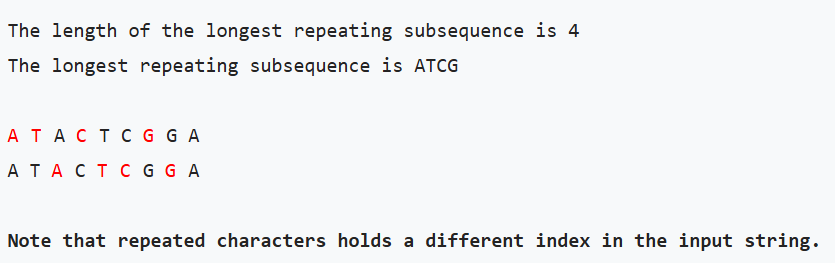

In [1]:
# Function to find the length of the longest repeated subsequence
# of substring `X[0…n-1]`
def LRSLength(X):

    n = len(X)

    # lookup table stores solution to already computed subproblems;
    # i.e., lookup[i][j] stores the length of LRS of substring
    # `X[0…i-1]` and `X[0…j-1]`
    lookup = [[0 for x in range(n + 1)] for y in range((n + 1))]

    # fill the lookup table in a bottom-up manner
    for i in range(1, n + 1):

        for j in range(1, n + 1):
            # if characters at index `i` and `j` matches
            # and the index are different
            if X[i - 1] == X[j - 1] and i != j:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
            # otherwise, if characters at index `i` and `j` are different
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])

    # LRS will be the last entry in the lookup table
    return lookup[n][n]


if __name__ == "__main__":

    X = "ATACTCGGA"
    print("The length of the longest repeating subsequence is", LRSLength(X))

The length of the longest repeating subsequence is 4


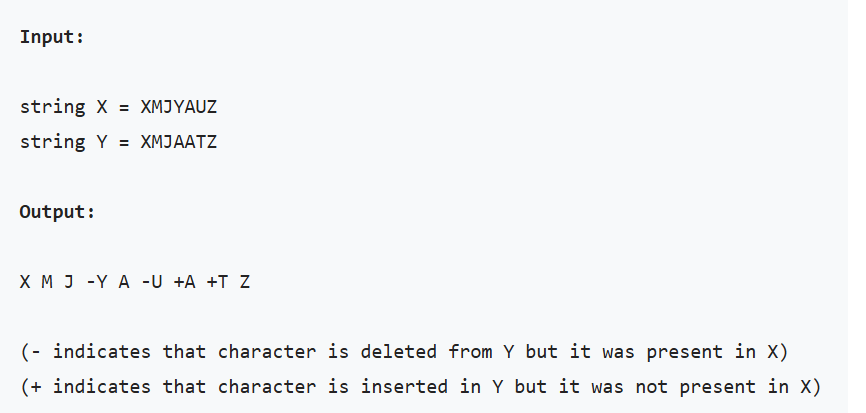

In [2]:
# Function to display the differences between two strings
def diff(X, Y, m, n, lookup):

    # if the last character of `X` and `Y` matches
    if m > 0 and n > 0 and X[m - 1] == Y[n - 1]:
        diff(X, Y, m - 1, n - 1, lookup)
        print("", X[m - 1], end="")

    # if the current character of `Y` is not present in `X`
    elif n > 0 and (m == 0 or lookup[m][n - 1] >= lookup[m - 1][n]):
        diff(X, Y, m, n - 1, lookup)
        print(" +" + Y[n - 1], end="")

    # if the current character of `X` is not present in `Y`
    elif m > 0 and (n == 0 or lookup[m][n - 1] < lookup[m - 1][n]):
        diff(X, Y, m - 1, n, lookup)
        print(" -" + X[m - 1], end="")


# Function to fill the lookup table by finding the length of LCS
# of substring X[0…m-1] and Y[0…n-1]
def findLCS(X, Y, m, n):

    # lookup[i][j] stores the length of LCS of substring X[0…i-1] and Y[0…j-1]
    lookup = [[0 for x in range(len(Y) + 1)] for y in range(len(X) + 1)]

    # first column of the lookup table will be all 0
    for i in range(m + 1):
        lookup[i][0] = 0

    # first row of the lookup table will be all 0
    for j in range(n + 1):
        lookup[0][j] = 0

    # fill the lookup table in a bottom-up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # if current character of `X` and `Y` matches
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
                # otherwise, if the current character of `X` and `Y` don't match
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])

    return lookup


# Implement diff utility in Python
if __name__ == "__main__":

    X = "ABCDFGHJQZ"
    Y = "ABCDEFGIJKRXYZ"

    # lookup[i][j] stores the length of LCS of substring X[0…i-1] and Y[0…j-1]
    lookup = findLCS(X, Y, len(X), len(Y))

    # find the difference
    diff(X, Y, len(X), len(Y), lookup)

 A B C D +E F G -H +I J -Q +K +R +X +Y Z

In [3]:
# Function to display the differences between two strings
def diff(X, Y, m, n, lookup):

    # if the last character of `X` and `Y` matches
    if m > 0 and n > 0 and X[m - 1] == Y[n - 1]:
        print("", X[m - 1], end="")
        diff(X, Y, m - 1, n - 1, lookup)

    # if the current character of `Y` is not present in `X`
    elif n > 0 and (m == 0 or lookup[m][n - 1] >= lookup[m - 1][n]):
        print(" +" + Y[n - 1], end="")
        diff(X, Y, m, n - 1, lookup)

    # if the current character of `X` is not present in `Y`
    elif m > 0 and (n == 0 or lookup[m][n - 1] < lookup[m - 1][n]):
        print(" -" + X[m - 1], end="")
        diff(X, Y, m - 1, n, lookup)


# Function to fill the lookup table by finding the length of LCS
# of substring X[0…m-1] and Y[0…n-1]
def findLCS(X, Y, m, n):

    # lookup[i][j] stores the length of LCS of substring X[0…i-1] and Y[0…j-1]
    lookup = [[0 for x in range(len(Y) + 1)] for y in range(len(X) + 1)]

    # first column of the lookup table will be all 0
    for i in range(m + 1):
        lookup[i][0] = 0

    # first row of the lookup table will be all 0
    for j in range(n + 1):
        lookup[0][j] = 0

    # fill the lookup table in a bottom-up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # if current character of `X` and `Y` matches
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
                # otherwise, if the current character of `X` and `Y` don't match
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])

    return lookup


# Implement diff utility in Python
if __name__ == "__main__":

    X = "ABCDFGHJQZ"
    Y = "ABCDEFGIJKRXYZ"

    # lookup[i][j] stores the length of LCS of substring X[0…i-1] and Y[0…j-1]
    lookup = findLCS(X, Y, len(X), len(Y))

    # find the difference
    diff(X, Y, len(X), len(Y), lookup)

 Z +Y +X +R +K -Q J +I -H G F +E D C B A

**longest palindromic substring**


**longest substring of s and reverse(s)**

In [ ]:
# Expand in both directions of `low` and `high` to find maximum length palindrome
def expand(s, low, high):
    length = len(s)

    # expand in both directions
    while low >= 0 and high < length and s[low] == s[high]:
        low = low - 1
        high = high + 1

    # return palindromic substring
    return s[low + 1 : high]


# Function to find the longest palindromic substring in `O(n²)` time and `O(1)` space
def findLongestPalindromicSubstring(s):

    # base case
    if not s:
        return ""

    # `max_str` stores the maximum length palindromic substring found so far
    max_str = ""

    # `max_length` stores the maximum length of palindromic
    # substring found so far
    max_length = 0

    # consider every character of the given string as a midpoint and expand
    # in both directions to find maximum length palindrome

    for i in range(len(s)):

        # find the longest odd length palindrome with `s[i]` as a midpoint
        curr_str = expand(s, i, i)
        curr_length = len(curr_str)

        # update maximum length palindromic substring if the odd length
        # palindrome has a greater length

        if curr_length > max_length:
            max_length = curr_length
            max_str = curr_str

        # Find the longest even length palindrome with `s[i]` and `s[i+1]` as
        # midpoints. Note that an even length palindrome has two midpoints.

        curr_str = expand(s, i, i + 1)
        curr_length = len(curr_str)

        # update maximum length palindromic substring if even length
        # palindrome has a greater length

        if curr_length > max_length:
            max_length = curr_length
            max_str = curr_str

    return max_str


if __name__ == "__main__":

    s = "ABDCBCDBDCBBC"

    print(
        f"The longest palindromic substring of {s} is",
        findLongestPalindromicSubstring(s),
    )

**find all possible palindromic substrings**

In [ ]:
def expand(s, low, high, palindromes):

    # run till `s[low.high]` is not a palindrome
    while low >= 0 and high < len(s) and s[low] == s[high]:

        # push all palindromes into a set
        palindromes.add(s[low : high + 1])

        # Expand in both directions
        low = low - 1
        high = high + 1


# Function to find all unique palindromic substrings of a given string
def findPalindromicSubstrings(s):

    # create an empty set to store all unique palindromic substrings
    palindromes = set()

    for i in range(len(s)):

        # find all odd length palindrome with `s[i]` as a midpoint
        expand(s, i, i, palindromes)

        # find all even length palindrome with `s[i]` and `s[i+1]`
        # as its midpoints
        expand(s, i, i + 1, palindromes)

    # print all unique palindromic substrings
    print(palindromes, end="")


if __name__ == "__main__":

    s = "google"
    findPalindromicSubstrings(s)

In [11]:
def editDistance(S1, S2):
    n = len(S1)
    m = len(S2)

    # Initialize a 2D DP array of size (n+1) x (m+1) with all elements set to 0
    dp = [[0 for _ in range(m + 1)] for _ in range(n + 1)]

    # Initialize the first row and first column of the DP array
    for i in range(n + 1):
        dp[i][0] = i
    for j in range(m + 1):
        dp[0][j] = j

    # Fill in the DP array using dynamic programming
    for i in range(1, n + 1):

        for j in range(1, m + 1):
            # If the characters at the current positions match, no operation is needed
            if S1[i - 1] == S2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                # Calculate the minimum of three choices:
                # 1. Replace the current character (diagonal move)
                # 2. Insert a character into S1 (move up)
                # 3. Delete a character from S1 (move left)
                dp[i][j] = 1 + min(dp[i - 1][j - 1], min(dp[i - 1][j], dp[i][j - 1]))

    # The final value in dp[n][m] is the minimum number of operations required
    return dp[n][m]


def main():
    s1 = "horse"
    s2 = "ros"

    # Calculate and print the minimum number of operations required
    print("The minimum number of operations required is:", editDistance(s1, s2))


if __name__ == "__main__":
    main()

The minimum number of operations required is: 3


In [15]:
def editDistance(S1, S2):
    n = len(S1)
    m = len(S2)

    # Initialize a 2D DP array of size (n+1) x (m+1) with all elements set to 0
    prev = [j for j in range(m + 1)]
    temp = [0] * (m + 1)

    # Initialize the first row and first column of the DP array

    # for j in range(m + 1):
    #     prev[j] = j

    # Fill in the DP array using dynamic programming
    for i in range(1, n + 1):

        temp[0] = i
        for j in range(1, m + 1):
            # If the characters at the current positions match, no operation is needed
            if S1[i - 1] == S2[j - 1]:
                temp[j] = prev[j - 1]
            else:
                # Calculate the minimum of three choices:
                # 1. Replace the current character (diagonal move)
                # 2. Insert a character into S1 (move up)
                # 3. Delete a character from S1 (move left)
                temp[j] = 1 + min(prev[j - 1], min(prev[j], temp[j - 1]))
        prev, temp = temp, prev

    # The final value in dp[n][m] is the minimum number of operations required
    return prev[m]


def main():
    s1 = "horse"
    s2 = "ros"

    # Calculate and print the minimum number of operations required
    print("The minimum number of operations required is:", editDistance(s1, s2))


if __name__ == "__main__":
    main()

The minimum number of operations required is: 3


**Longest Common Subsequence (LCS)**

In [ ]:
def LCSLength(X, Y, m, n):

    # return if the end of either sequence is reached
    if m == 0 or n == 0:
        return 0

    # if the last character of `X` and `Y` matches
    if X[m - 1] == Y[n - 1]:
        return LCSLength(X, Y, m - 1, n - 1) + 1

    # otherwise, if the last character of `X` and `Y` don't match
    return max(LCSLength(X, Y, m, n - 1), LCSLength(X, Y, m - 1, n))


if __name__ == "__main__":

    X = "ABCBDAB"
    Y = "BDCABA"

    print("The length of the LCS is", LCSLength(X, Y, len(X), len(Y)))


# Function to find the length of the longest common subsequence of substring
# `X[0…m-1]` and `Y[0…n-1]`
def LCSLength(X, Y, m, n, lookup):

    # return if the end of either string is reached
    if m == 0 or n == 0:
        return 0

    # construct a unique key from dynamic elements of the input
    key = (m, n)

    # if the subproblem is seen for the first time, solve it and
    # store its result in a dictionary
    if key not in lookup:

        # if the last character of `X` and `Y` matches
        if X[m - 1] == Y[n - 1]:
            lookup[key] = LCSLength(X, Y, m - 1, n - 1, lookup) + 1

        else:
            # otherwise, if the last character of `X` and `Y` don't match
            lookup[key] = max(
                LCSLength(X, Y, m, n - 1, lookup), LCSLength(X, Y, m - 1, n, lookup)
            )

    # return the subproblem solution from the dictionary
    return lookup[key]


if __name__ == "__main__":

    X = "ABCBDAB"
    Y = "BDCABA"

    # create a dictionary to store solutions to subproblems
    lookup = {}

    print("The length of the LCS is", LCSLength(X, Y, len(X), len(Y), lookup))

In [ ]:
# Space optimized function to find the length of the longest common subsequence
# of substring `X[0…m-1]` and `Y[0…n-1]`
def LCSLength(X, Y):

    m = len(X)
    n = len(Y)

    # allocate storage for one-dimensional lists, `curr` and `prev`
    curr = [0] * (n + 1)
    prev = [0] * (n + 1)

    # fill the lookup table in a bottom-up manner
    for i in range(m + 1):
        for j in range(n + 1):
            if i > 0 and j > 0:
                # if the current character of `X` and `Y` matches
                if X[i - 1] == Y[j - 1]:
                    curr[j] = prev[j - 1] + 1
                # otherwise, if the current character of `X` and `Y` don't match
                else:
                    curr[j] = max(prev[j], curr[j - 1])

        # replace contents of the previous list with the current list
        prev = curr.copy()

    # LCS will be the last entry in the lookup table
    return curr[n]


if __name__ == "__main__":

    X = "XMJYAUZ"
    Y = "MZJAWXU"

    print("The length of the LCS is", LCSLength(X, Y))

**print all the possible longest common subsequences**

In [2]:
def LCS(X, Y, m, n, lookup):

    # return an empty string if the end of either sequence is reached
    if m == 0 or n == 0:
        return str()

    # if the last character of `X` and `Y` matches
    if X[m - 1] == Y[n - 1]:
        # append current character (`X[m-1]` or `Y[n-1]`) to LCS of
        # substring `X[0…m-2]` and `Y[0…n-2]`
        return LCS(X, Y, m - 1, n - 1, lookup) + X[m - 1]

    # otherwise, if the last character of `X` and `Y` are different

    # if a top cell of the current cell has more value than the left
    # cell, then drop the current character of string `X` and find LCS
    # of substring `X[0…m-2]`, `Y[0…n-1]`

    if lookup[m - 1][n] > lookup[m][n - 1]:
        return LCS(X, Y, m - 1, n, lookup)
    else:
        # if a left cell of the current cell has more value than the top
        # cell, then drop the current character of string `Y` and find LCS
        # of substring `X[0…m-1]`, `Y[0…n-2]`
        return LCS(X, Y, m, n - 1, lookup)


# Function to fill the lookup table by finding the length of LCS
# of substring `X[0…m-1]` and `Y[0…n-1]`
def LCSLength(X, Y, m, n, lookup):

    # fill the lookup table in a bottom-up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # if current character of `X` and `Y` matches
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
            # otherwise, if the current character of `X` and `Y` don't match
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])


if __name__ == "__main__":

    X = "XMJYAUZ"
    Y = "MZJAWXU"

    m = len(X)
    n = len(Y)

    # lookup[i][j] stores the length of LCS of substring `X[0…i-1]` and `Y[0…j-1]`
    lookup = [[0 for x in range(n + 1)] for y in range(m + 1)]

    # fill lookup table
    LCSLength(X, Y, m, n, lookup)

    # find the longest common subsequence
    print(LCS(X, Y, m, n, lookup))

MJAU


In [3]:
# Function to return all LCS of substrings `X[0…m-1]`, `Y[0…n-1]`
def LCS(X, Y, m, n, lookup):

    # if the end of either sequence is reached
    if m == 0 or n == 0:
        # create a list with one empty string and return
        return [""]

    # if the last character of `X` and `Y` matches
    if X[m - 1] == Y[n - 1]:

        # ignore the last characters of `X` and `Y` and find all LCS of substring
        # `X[0…m-2]`, `Y[0…n-2]` and store it in a list
        lcs = LCS(X, Y, m - 1, n - 1, lookup)

        # append current character `X[m-1]` or `Y[n-1]`
        # to all LCS of substring `X[0…m-2]` and `Y[0…n-2]`
        for i in range(len(lcs)):
            lcs[i] = lcs[i] + (X[m - 1])

        return lcs

    # we reach here when the last character of `X` and `Y` don't match

    # if a top cell of the current cell has more value than the left cell,
    # then ignore the current character of string `X` and find all LCS of
    # substring `X[0…m-2]`, `Y[0…n-1]`
    if lookup[m - 1][n] > lookup[m][n - 1]:
        return LCS(X, Y, m - 1, n, lookup)

    # if a left cell of the current cell has more value than the top cell,
    # then ignore the current character of string `Y` and find all LCS of
    # substring `X[0…m-1]`, `Y[0…n-2]`
    if lookup[m][n - 1] > lookup[m - 1][n]:
        return LCS(X, Y, m, n - 1, lookup)

    # if the top cell has equal value to the left cell, then consider both characters

    top = LCS(X, Y, m - 1, n, lookup)
    left = LCS(X, Y, m, n - 1, lookup)

    # merge two lists and return
    return top + left


# Function to fill the lookup table by finding the length of LCS
# of substring `X` and `Y`
def LCSLength(X, Y, lookup):

    # fill the lookup table in a bottom-up manner
    for i in range(1, len(X) + 1):
        for j in range(1, len(Y) + 1):
            # if current character of `X` and `Y` matches
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1

            # otherwise, if the current character of `X` and `Y` don't match
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])


# Function to find all LCS of string `X[0…m-1]` and `Y[0…n-1]`
def findLCS(X, Y):

    # lookup[i][j] stores the length of LCS of substring `X[0…i-1]` and `Y[0…j-1]`
    lookup = [[0 for x in range(len(Y) + 1)] for y in range(len(X) + 1)]

    # fill lookup table
    LCSLength(X, Y, lookup)

    # find all the longest common subsequences
    lcs = LCS(X, Y, len(X), len(Y), lookup)

    # since a list can contain duplicates, "convert" it to a set and return
    return set(lcs)


if __name__ == "__main__":

    X = "ABCBDAB"
    Y = "BDCABA"

    lcs = findLCS(X, Y)
    print(lcs)

{'BCBA', 'BCAB', 'BDAB'}


SCS

SCSLength(X, Y) = m + n – LCSLength(X, Y)

In [4]:
# Function to return shortest common supersequence (SCS)
# of substrings `X[0…m-1]`, `Y[0…n-1]`
def SCS(X, Y, m, n, lookup):

    # if the end of the first string is reached,
    # return the second string
    if m == 0:
        return Y[:n]

    # if the end of the second string is reached,
    # return the first string
    elif n == 0:
        return X[:m]

    # if the last character of `X` and `Y` matches, include it in SSC
    # and recur to find SCS of substring `X[0…m-2]` and `Y[0…n-1]`
    if X[m - 1] == Y[n - 1]:
        return SCS(X, Y, m - 1, n - 1, lookup) + X[m - 1]

    # if the last character of `X` and `Y` don't match
    else:

        # if a top cell of the current cell has more value than the left
        # cell, then include the current character of string `X` in SCS
        # and find SCS of substring `X[0…m-2]` and `Y[0…n-2]`

        if lookup[m - 1][n] > lookup[m][n - 1]:
            return SCS(X, Y, m - 1, n, lookup) + X[m - 1]

        # if a left cell of the current cell has more value than the top
        # cell, then include the current character of string `Y` in SCS
        # and find SCS of substring `X[0…m-1]` and `Y[0…n-2]`
        else:
            return SCS(X, Y, m, n - 1, lookup) + Y[n - 1]


# Function to fill the lookup table by finding the length of LCS
# of substring `X[0…m-1]` and `Y[0…n-1]`
def LCS(X, Y, m, n, lookup):

    # Fill the lookup table in a bottom-up manner.
    # the first row and first column of the lookup table are already 0.
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # if the current character of `X` and `Y` matches
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
            # otherwise, if the current character of `X` and `Y` don't match
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])


if __name__ == "__main__":

    X = "ABCBDAB"
    Y = "BDCABA"

    m = len(X)
    n = len(Y)

    # `lookup[i][j]` stores the length of LCS of substring `X[0…i-1]` and `Y[0…j-1]`
    lookup = [[0 for x in range(n + 1)] for y in range(m + 1)]

    # fill the lookup table by finding LCS of `X` and `Y`
    LCS(X, Y, m, n, lookup)

    # find the shortest common supersequence by reading the lookup
    # table of LCS in a top-down manner
    print(
        f"The shortest common supersequence of {X} and {Y} is", SCS(X, Y, m, n, lookup)
    )

The shortest common supersequence of ABCBDAB and BDCABA is ABCBDCABA


In [5]:
# Function to return all SCS of substrings `X[0…m-1]`, `Y[0…n-1]`
def SCS(X, Y, m, n, lookup):

    # if the end of the first string is reached, create a list
    # containing the second substring and return
    if m == 0:
        return {Y[:n]}

    # if the end of the second string is reached, create a list
    # containing the first substring and return
    elif n == 0:
        return {X[:m]}

    # if the last character of `X` and `Y` is the same, it should occur
    # only one time in SSC
    if X[m - 1] == Y[n - 1]:

        # find all SCS of substring `X[0…m-2]` and `Y[0…n-2]`
        scs = SCS(X, Y, m - 1, n - 1, lookup)

        # append the current character `X[m-1]` or `Y[n-1]` to all SCS of
        # substring `X[0…m-2]` and `Y[0…n-2]`

        return {str + X[m - 1] for str in scs}

    # we reach here when the last character of `X` and `Y` don't match

    # if a top cell of the current cell has more value than the left cell,
    # then append the current character of string `X` to all SCS of
    # substring `X[0…m-2]`, `Y[0…n-1]`

    if lookup[m - 1][n] > lookup[m][n - 1]:
        scs = SCS(X, Y, m - 1, n, lookup)
        return {str + X[m - 1] for str in scs}

    # if a left cell of the current cell has more value than the top cell,
    # then append the current character of string `Y` to all SCS of
    # substring `X[0…m-1]`, `Y[0…n-2]`

    if lookup[m][n - 1] > lookup[m - 1][n]:
        scs = SCS(X, Y, m, n - 1, lookup)
        return {str + Y[n - 1] for str in scs}

    # if the top cell value is the same as the left cell, then go in both
    # top and left directions

    # append the current character of string `X` to all SCS of
    # substring `X[0…m-2]`, `Y[0…n-1]`
    top = SCS(X, Y, m - 1, n, lookup)

    # append the current character of string `Y` to all SCS of
    # substring `X[0…m-1]`, `Y[0…n-2]`
    left = SCS(X, Y, m, n - 1, lookup)

    return set([str + X[m - 1] for str in top] + [str + Y[n - 1] for str in left])


# Function to fill the lookup table by finding the length of LCS
# of substring `X[0…m-1]` and `Y[0…n-1]`
def LCS(X, Y, m, n, lookup):

    # Fill the lookup table in a bottom-up manner.
    # the first row and first column of the lookup table are already 0.
    for i in range(1, m + 1):

        for j in range(1, n + 1):
            # if the current character of `X` and `Y` matches
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
            # otherwise, if the current character of `X` and `Y` don't match
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])


# Function to find all shortest common supersequence of string `X` and `Y`
def findSCS(X, Y):

    m = len(X)
    n = len(Y)

    # `lookup[i][j]` stores the length of LCS of substring `X[0…i-1]` and `Y[0…j-1]`
    lookup = [[0 for x in range(n + 1)] for y in range(m + 1)]

    # fill lookup table
    LCS(X, Y, m, n, lookup)

    # return all the longest common sequences
    return SCS(X, Y, m, n, lookup)


if __name__ == "__main__":

    X = "ABCBDAB"
    Y = "BDCABA"

    # Find all shortest common supersequence of string `X` and `Y`
    scs = findSCS(X, Y)

    # print all SCS present in the set
    print(f"All shortest common supersequence of {X} and {Y} are:", scs)

All shortest common supersequence of ABCBDAB and BDCABA are: {'ABCBDCABA', 'ABDCABDAB', 'ABDCBDABA'}


**Longest Palindromic Subsequence (LPS)**

The longest palindromic subsequence problem is a classic variation of the Longest Common Subsequence (LCS) problem. 

The idea is to find LCS of the given string with its reverse, i.e., call LCS(X, reverse(X)) 

and the longest common subsequence will be the longest palindromic subsequence.

In [ ]:
def findLongestPalindrome(X, i, j):

    # Base condition
    if i > j:
        return 0

    # If the string `X` has only one character, it is a palindrome
    if i == j:
        return 1

    # If the last character of the string is the same as the first character
    if X[i] == X[j]:
        # include the first and last characters in palindrome
        # and recur for the remaining substring `X[i+1, j-1]`
        return findLongestPalindrome(X, i + 1, j - 1) + 2

    """
      If the last character of the string is different from the first character
        1. Remove the last character and recur for the remaining substring
           `X[i, j-1]`
        2. Remove the first character and recur for the remaining substring
           `X[i+1, j]`
    """

    # Return the maximum of the two values
    return max(findLongestPalindrome(X, i, j - 1), findLongestPalindrome(X, i + 1, j))


if __name__ == "__main__":

    X = "ABBDCACB"
    n = len(X)

    print(
        "The length of the longest palindromic subsequence is",
        findLongestPalindrome(X, 0, n - 1),
    )

Minimum insertions required to make a string palindrome

Minimum Insertion required = n(length of the string) - length of longest palindromic subsequence.

Minimum Insertions/Deletions to Convert String A to String B

In order to minimize the operations, we need to find the length of the longest common subsequence.

Minimum Operations required = (n - k) + (m - k)

Here n and m are the length of str1 and str2 respectively and k is the length of the longest common subsequence of str1 and str2.

We can also solve this problem by finding the Longest Palindromic Subsequence (LPS) of a string. To make a string palindrome, the characters that don’t contribute to the LPS 

should be removed. Therefore, a string is k–palindrome if the difference between the length of LPS and the original string’s length is less than equal to k.

Given a string, count the number of times a given pattern appears in it as a subsequence.

In [116]:
# Function to count the number of times pattern `Y[0…n)`
# appears in a given string `X[0…m)` as a subsequence
def count(X, Y, m, n):

    # Base case 1: if only one character is left
    if m == 1 and n == 1:
        return 1 if (X[0] == Y[0]) else 0

    # Base case 2: if the input string `X` reaches its end
    if m == 0:
        return 0

    # Base case 3: if pattern `Y` reaches its end, we have found subsequence
    if n == 0:
        return 1

    # Optimization: the solution is not possible if the number of characters
    # in the string is less than the number of characters in the pattern
    if n > m:
        return 0

    """
      If the last character of both string and pattern matches,
        1. Exclude the last character from both string and pattern
        2. Exclude only the last character from the string.
    
      Otherwise, if the last character of the string and pattern do not match,
      recur by excluding only the last character in the string
    """

    return (count(X, Y, m - 1, n - 1) if X[m - 1] == Y[n - 1] else 0) + count(
        X, Y, m - 1, n
    )


if __name__ == "__main__":

    X = "subsequence"  # Input string
    Y = "sue"  # Pattern

    print(count(X, Y, len(X), len(Y)))

7


In [119]:
# Function to count the number of times pattern `Y[0…n)`
# appears in a given string `X[0…m)` as a subsequence
def count(X, Y, m, n):

    # Base case 1: if only one character is left
    if m == 0 and n == 0:
        return 1 if (X[0] == Y[0]) else 0

    # Base case 2: if the input string `X` reaches its end
    if m < 0:
        return 0

    # Base case 3: if pattern `Y` reaches its end, we have found subsequence
    if n < 0:
        return 1

    # Optimization: the solution is not possible if the number of characters
    # in the string is less than the number of characters in the pattern
    if n > m:
        return 0

    """
      If the last character of both string and pattern matches,
        1. Exclude the last character from both string and pattern
        2. Exclude only the last character from the string.
    
      Otherwise, if the last character of the string and pattern do not match,
      recur by excluding only the last character in the string
    """
    if X[m] == Y[n]:
        return count(X, Y, m - 1, n - 1) + count(X, Y, m - 1, n)
    else:
        return count(X, Y, m - 1, n)

    # return (count(X, Y, m - 1, n - 1) if X[m] == Y[n] else 0) + count(X, Y, m - 1, n)


if __name__ == "__main__":

    X = "subsequence"  # Input string
    Y = "sue"  # Pattern

    print(count(X, Y, len(X) - 1, len(Y) - 1))

7


In [2]:
def count(X, Y):

    (m, n) = (len(X), len(Y))

    # `T[i][j]` stores number of times pattern `Y[0…j)`
    # appears in a given string `X[0…i)` as a subsequence
    T = [[0 for x in range(n + 1)] for y in range(m + 1)]

    # if pattern `Y` is empty, we have found subsequence
    for i in range(m + 1):
        T[i][0] = 1

    """
      If the current character of both string and pattern matches,
        1. Exclude current character from both string and pattern
        2. Exclude only the current character from the string
 
      Otherwise, if the current character of the string and pattern do not match,
      exclude the current character from the string
    """

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            T[i][j] = (T[i - 1][j - 1] if (X[i - 1] == Y[j - 1]) else 0) + T[i - 1][j]

    # return last entry in the lookup table
    return T[m][n]


if __name__ == "__main__":

    X = "banana"  # "subsequence"  # Input string
    Y = "ban"  # "sue"  # Pattern

    print(count(X, Y))

3


Check if a string is interleaving of two other given strings

In [ ]:
# Function to check if strings 'X' and 'Y' are interleaving of 'S' or not
def isInterleaving(X, Y, S):

    # return true if the end of all strings is reached
    if not X and not Y and not S:
        return True

    # return false if the end of string 'S' is reached,
    # but 'X' or 'Y' is not empty
    if not S:
        return False

    # if string 'X' is not empty and its first character matches with the
    # first character of 'S', recur for the remaining substring
    x = (len(X) and S[0] == X[0]) and isInterleaving(X[1:], Y, S[1:])

    # if string 'Y' is not empty and its first character matches with the
    # first character of 'S', recur for the remaining substring
    y = (len(Y) and S[0] == Y[0]) and isInterleaving(X, Y[1:], S[1:])

    return x or y


if __name__ == "__main__":

    X = "ABC"
    Y = "DEF"
    S = "ADEBFC"

    if isInterleaving(X, Y, S):
        print("Interleaving")
    else:
        print("Not an Interleaving")

In [1]:
def is_il_rec(s1, s2, s3, i, j, memo):
    k = i + j
    m, n = len(s1), len(s2)

    # Base case: If all strings are fully traversed
    if i == m and j == n and k == len(s3):
        return True

    # If we have already solved this subproblem,
    # return the stored result
    if memo[i][j] != -1:
        return memo[i][j] == 1

    # Check if next character of s1 matches with
    # the next one of s3
    a = (i < m and s1[i] == s3[k]) and is_il_rec(s1, s2, s3, i + 1, j, memo)

    # Check if next character of s2 matches with
    # the next one of s3
    b = (j < n and s2[j] == s3[k]) and is_il_rec(s1, s2, s3, i, j + 1, memo)

    memo[i][j] = 1 if (a or b) else 0
    return a or b


def is_il(s1, s2, s3):
    m, n = len(s1), len(s2)

    # A basic condition that must be ensured
    if m + n != len(s3):
        return False

    # Initialize memo with -1 and make
    # recursive function call
    memo = [[-1 for _ in range(n + 1)] for _ in range(m + 1)]
    return is_il_rec(s1, s2, s3, 0, 0, memo)


if __name__ == "__main__":
    print("true" if is_il("XXY", "XXZ", "XXZXXXY") else "false")

false


In [ ]:
def isInterleaving(X, Y, S):
    M, N = len(X), len(Y)

    # base case: length of given strings doesn't match
    if M + N != len(S):
        return False

    # Create a lookup table T[][] to store solution to already computed
    # subproblems. T[i][j] is true when `S[0…i+j-1]` is an interleaving
    # of `X[0…i-1]` and `Y[0…j-1]`
    T = [[False for x in range(N + 1)] for y in range(M + 1)]

    # fill the lookup table in a bottom-up manner
    for i in range(0, M + 1):
        for j in range(0, N + 1):

            if i == 0 and j == 0:  # both strings are empty
                T[i][j] = True

            # if the current char of 'S' matches the current char of both 'A' and 'B'
            elif i and j and X[i - 1] == S[i + j - 1] and Y[j - 1] == S[i + j - 1]:
                T[i][j] = T[i - 1][j] or T[i][j - 1]

            # if the current char of 'X' matches with the current char of 'S'
            elif i and X[i - 1] == S[i + j - 1]:
                T[i][j] = T[i - 1][j]

            # if the current char of 'Y' matches with the current char of 'S'
            elif j and Y[j - 1] == S[i + j - 1]:
                T[i][j] = T[i][j - 1]

    # T[M][N] stores the result
    return T[M][N]


if __name__ == "__main__":

    X = "ABC"
    Y = "ACD"
    S = "ACDABC"

    if isInterleaving(X, Y, S):
        print("Interleaving")
    else:
        print("Not an Interleaving")

**Wildcard Pattern Matching**

. can match to any single character in the string

and * can match to any number of characters including zero characters

In [7]:
def solveMemo(s, p, i, j, dp):
    if i >= len(s) and j >= len(p):
        return True

    if j >= len(p):
        return False

    if dp[i][j]:
        return dp[i][j]

    match = i < len(s) and (s[i] == p[j] or p[j] == "?")

    if (j + 1) < len(p) and p[j + 1] == "*":  # next char

        dp[i][j] = solveMemo(s, p, i, j + 2, dp) or (
            match and solveMemo(s, p, i + 1, j, dp)
        )
        return dp[i][j]
    elif match:
        dp[i][j] = solveMemo(s, p, i + 1, j + 1, dp)
        return dp[i][j]
    dp[i][j] = False
    return False


# Wildcard Pattern Matching Implementation in Python
if __name__ == "__main__":

    word = "xy"
    pattern = "?*"

    # create a DP lookup table
    lookup = [[False for x in range(len(pattern) + 1)] for y in range(len(word) + 1)]

    if solveMemo(word, pattern, 0, 0, lookup):
        print("Match")
    else:
        print("No Match")

Match


In [5]:
def is_match_rec(t, p, n, m):

    # If pattern is empty, then text must also be empty
    if m == 0:
        return n == 0

    # If text is empty, then pattern can have characters followed by *s
    if n == 0:
        return (m >= 2 and p[m - 1] == "*") and is_match_rec(t, p, n, m - 2)

    # If last characters of both string and pattern match, or pattern has '.'
    if t[n - 1] == p[m - 1] or p[m - 1] == ".":
        return is_match_rec(t, p, n - 1, m - 1)

    # Handle '*' in the pattern
    if p[m - 1] == "*" and m > 1:
        # Check if '*' can represent zero occurrences of the preceding character
        zero = is_match_rec(t, p, n, m - 2)

        # Check if '*' can represent one or more occurrences of the preceding character
        one_or_more = (p[m - 2] == t[n - 1] or p[m - 2] == ".") and is_match_rec(
            t, p, n - 1, m
        )

        return zero or one_or_more

    # If no match
    return False


# Wrapper function
def is_match(t, p):
    return is_match_rec(t, p, len(t), len(p))


# Example usage
print(is_match("aab", "a.*"))
print(is_match("aa", "a"))
print(is_match("aa", "a*"))
print(is_match("ab", ".*"))
print(is_match("mississippi", "mis*is*p*."))

True
False
True
True
False


In [ ]:
def isMatch(word, pattern):

    # get length of string and wildcard pattern
    n = len(word)
    m = len(pattern)

    # create a DP lookup table
    T = [[False for x in range(m + 1)] for y in range(n + 1)]

    # if both pattern and string are empty: match
    T[0][0] = True

    # handle empty string case (i == 0)
    for j in range(1, m + 1):
        if pattern[j - 1] == "*":
            T[0][j] = T[0][j - 2]

    # build a matrix in a bottom-up manner
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if pattern[j - 1] == "*":
                T[i][j] = T[i][j - 2]  # '*' matches zero occurrence
                if pattern[j - 2] == "?" or pattern[j - 2] == word[i - 1]:
                    T[i][j] = T[i][j] or T[i - 1][j]
            elif pattern[j - 1] == "?" or word[i - 1] == pattern[j - 1]:
                T[i][j] = T[i - 1][j - 1]

    # last cell stores the answer
    return T[n][m]


# Wildcard Pattern Matching Implementation in Python
if __name__ == "__main__":

    word = "xyxzzxy"
    pattern = "x***x?"

    if isMatch(word, pattern):
        print("Match")
    else:
        print("No Match")

Input: s = "(*))"
Output: true

The following rules define a valid string:

Any left parenthesis '(' must have a corresponding right parenthesis ')'.
Any right parenthesis ')' must have a corresponding left parenthesis '('.
Left parenthesis '(' must go before the corresponding right parenthesis ')'.
'*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".

In [ ]:
class Solution:
    def checkValidString(self, s: str) -> bool:
        n = len(s)

        @cache
        def f(i, balance):
            if i == n:
                return balance == 0
            if balance < 0:
                return False
            ans = False
            if s[i] == "(":
                ans = f(i + 1, balance + 1)
            elif s[i] == ")":
                ans = f(i + 1, balance - 1)
            else:
                ans = (
                    f(i + 1, balance + 1) or f(i + 1, balance) or f(i + 1, balance - 1)
                )
            return ans

        return f(0, 0)


class Solution:
    def checkValidString(self, s: str) -> bool:
        open_count = 0
        close_count = 0
        length = len(s) - 1

        for i in range(len(s)):
            start = s[i]
            end = s[length - i]

            if start == "(" or start == "*":
                open_count += 1
            else:
                open_count -= 1
            if end == ")" or end == "*":
                close_count += 1
            else:
                close_count -= 1
            if open_count < 0 or close_count < 0:
                return False

        return open_count >= 0 and close_count >= 0

# LIS

In [3]:
def solve(index, arr, prev):
    if index < 0:
        return 0

    notake = solve(index - 1, arr, prev)
    take = 0
    if prev == -1 or arr[index] < prev:
        take = 1 + solve(index - 1, arr, arr[index])
    return max(take, notake)


arr = [10, 22, 9, 33, 21, 50, 41, 60]
solve(len(arr) - 1, arr, -1)

5

In [4]:
def solve(index, arr, prev):
    if index >= len(arr):
        return 0

    notake = solve(index + 1, arr, prev)
    take = 0
    if prev == -1 or arr[index] > prev:
        take = 1 + solve(index + 1, arr, arr[index])
    return max(take, notake)


arr = [10, 22, 9, 33, 21, 50, 41, 60]
solve(0, arr, -1)

5

In [8]:
def lis(arr):
    n = len(arr)

    # Declare the list (array) for LIS and
    # initialize LIS values for all indexes
    lis = [1] * n

    # Compute optimized LIS values in bottom
    # -up manner
    for i in range(n):
        for prev in range(0, i):
            if arr[i] > arr[prev]:
                lis[i] = max(lis[i], lis[prev] + 1)

    # Return the maximum of all LIS values
    return max(lis)


if __name__ == "__main__":
    arr = [10, 22, 9, 33, 21, 50, 41, 60]
    print(lis(arr))

5


In [1]:
def lis(arr):
    n = len(arr)

    # Declare the list (array) for LIS and
    # initialize LIS values for all indexes
    lis = [1] * n

    # Compute optimized LIS values in bottom
    # -up manner
    for i in range(1, n):
        for prev in range(0, i):
            if arr[i] > arr[prev]:
                lis[i] = max(lis[i], lis[prev] + 1)

    # Return the maximum of all LIS values
    return max(lis)


if __name__ == "__main__":
    arr = [10, 22, 9, 33, 21, 50, 41, 60]
    print(lis(arr))

5


In [ ]:
def lengthOfLIS(self, nums):
    """
    :type nums: List[int]
    :rtype: int
    """
    li = []
    for i in nums:
        if not li or i > li[-1]:
            li.append(i)
        else:
            li[bisect.bisect_left(li, i)] = i

    return len(li)

In [5]:
def findLIS(arr):

    # base case
    if not arr:
        return []

    # LIS[i] stores the longest increasing subsequence of sublist
    # `arr[0…i]` that ends with `arr[i]`
    LIS = [[] for _ in range(len(arr))]

    # LIS[0] denotes the longest increasing subsequence ending at `arr[0]`
    LIS[0].append(arr[0])

    # start from the second element in the list
    for i in range(1, len(arr)):

        # do for each element in sublist `arr[0…i-1]`
        for j in range(i):

            # find the longest increasing subsequence that ends with `arr[j]`
            # where `arr[j]` is less than the current element `arr[i]`

            if arr[j] < arr[i] and len(LIS[j]) > len(LIS[i]):
                LIS[i] = LIS[j].copy()

        # include `arr[i]` in `LIS[i]`
        LIS[i].append(arr[i])

    # `j` will store the index of LIS
    j = 0
    for i in range(len(arr)):
        if len(LIS[j]) < len(LIS[i]):
            j = i

    # print LIS
    print(LIS[j])


if __name__ == "__main__":

    arr = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
    findLIS(arr)

[0, 4, 6, 9, 13, 15]


In [9]:
def longest_increasing_subsequence(arr):
    n = len(arr)

    dp = [1] * n
    hash = [1] * n

    for i in range(n):
        hash[i] = i  # initializing with current index
        for prev_index in range(i):
            if arr[prev_index] < arr[i] and 1 + dp[prev_index] > dp[i]:
                dp[i] = 1 + dp[prev_index]
                hash[i] = prev_index

    ans = -1
    last_index = -1

    for i in range(n):
        if dp[i] > ans:
            ans = dp[i]
            last_index = i

    temp = []
    temp.append(arr[last_index])

    while hash[last_index] != last_index:  # till not reach the initialization value
        last_index = hash[last_index]
        temp.append(arr[last_index])

    # reverse the array
    temp.reverse()

    print("The subsequence elements are ", end="")
    for i in range(len(temp)):
        print(temp[i], end=" ")
    print()

    return ans


if __name__ == "__main__":
    arr = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
    longest_increasing_subsequence(arr)

The subsequence elements are 0 4 6 9 13 15 


In [3]:
arr = [1, 5, 4, 3, 2, 6, 7, 2]
n = len(arr)


def solve(arr, i, n, ans, prev):
    if i == n:
        if len(ans) == 4:
            print(ans)
        return 0
    not_take = solve(arr, i + 1, n, ans, prev)
    take = 0
    if prev < arr[i]:
        ans.append(arr[i])
        take = 1 + solve(arr, i, n, ans, arr[i])
        ans.pop()
    return max(take, not_take)


solve(arr, 0, n, [], -1)

[1, 2, 6, 7]
[1, 3, 6, 7]
[1, 4, 6, 7]
[1, 5, 6, 7]


4

In [25]:
def find_number_of_LIS(arr):
    n = len(arr)

    # Initialize two dynamic programming lists for lengths and counts
    dp = [0] * n
    count = [1] * n
    dp[0] = 1
    maxi = 1

    for i in range(1, n):
        for prev_index in range(i):
            if arr[prev_index] < arr[i] and dp[prev_index] > dp[i]:
                dp[i] = dp[prev_index]
                # Inherit the count
                count[i] = count[prev_index]
            elif arr[prev_index] < arr[i] and dp[prev_index] == dp[i]:
                # Increase the count
                count[i] += count[prev_index]
        dp[i] += 1
        maxi = max(maxi, dp[i])

    num_of_LIS = 0

    # Count the number of Longest Increasing Subsequences
    for i in range(n):
        if dp[i] == maxi:
            num_of_LIS += count[i]

    return num_of_LIS


if __name__ == "__main__":
    arr = [2, 2, 2, 2, 2]

    print("The count of Longest Increasing Subsequences is:", find_number_of_LIS(arr))

The count of Longest Increasing Subsequences is: 5


**Longest Alternating Subsequence Problem**

In [114]:
def findLongestSequence(A, start, end, flag):

    result = 0
    for i in range(start, end + 1):

        # include `A[i]` as next high in subsequence and flip `flag`
        # for next subsequence
        if flag and A[i - 1] < A[i]:
            result = max(result, 1 + findLongestSequence(A, i + 1, end, not flag))

        # include `A[i]` as next low in subsequence and flip `flag`
        # for next subsequence
        elif not flag and A[i - 1] > A[i]:
            result = max(result, 1 + findLongestSequence(A, i + 1, end, not flag))

        # don't include `A[i]` in subsequence
        else:
            result = max(result, findLongestSequence(A, i + 1, end, flag))

    return result


# Function to find the length of the longest subsequence with alternate
# low and high elements. It calls the `util()` method.
def longestSequence(A):

    # base case
    if not A:
        return 0

    # Fix the first element and recur for the remaining elements as the first
    # element will always be part of the longest subsequence (why?)

    # There are two possibilities:

    # 1. The next element is greater (pass true)
    # 2. The next element is smaller (pass false)
    return 1 + max(
        findLongestSequence(A, 1, len(A) - 1, True),
        findLongestSequence(A, 1, len(A) - 1, False),
    )


if __name__ == "__main__":

    A = [8, 9, 6, 4, 5, 7, 3, 2, 4]

    print("The length of the longest alternating subsequence is", longestSequence(A))

The length of the longest alternating subsequence is 6


In [115]:
# Function to find the length of the longest subsequence with alternate
# low and high elements.
def findLongestSequence(A):

    # base case
    if not A or len(A) <= 1:
        return len(A)

    # lookup table to store solutions to subproblems
    T = [[0] * 2 for r in range(len(A) + 1)]

    """
        `T[i][0]` stores the longest alternating subsequence till `A[0…i]`
        where `A[i]` is greater than `A[i-1]`
 
        `T[i][1]` stores the longest alternating subsequence till `A[0…i]`
        where `A[i]` is smaller than `A[i-1]`
    """

    # stores result
    result = 1

    # base case: the first element will always be part of LAS
    T[0][0] = T[0][1] = 1

    # fill the lookup table in a bottom-up manner
    for i in range(1, len(A)):

        # do for each element `A[j]` before `A[i]`
        for j in range(i):

            # If `A[i]` is greater than `A[j]`, update `T[i][0]`
            if A[i] > A[j]:
                T[i][0] = max(T[i][0], T[j][1] + 1)

            # If `A[i]` is smaller than `A[j]`, update `T[i][1]`
            if A[i] < A[j]:
                T[i][1] = max(T[i][1], T[j][0] + 1)

        # update result by taking a maximum of both values
        if result < max(T[i][0], T[i][1]):
            result = max(T[i][0], T[i][1])

    # return result
    return result


if __name__ == "__main__":

    A = [8, 9, 6, 4, 5, 7, 3, 2, 4]

    print(
        "The length of the longest alternating subsequence is", findLongestSequence(A)
    )

The length of the longest alternating subsequence is 6


**Longest bitonic subsequence**

In [6]:
# Function to find the longest bitonic subsequence in a list
def calculateLBS(nums):

    n = len(nums)

    # base case
    if n == 0:
        return 0

    # `I[i]` store the length of the longest increasing subsequence,
    # ending at `nums[i]`
    I = [0] * n

    # `D[i]` stores the length of the longest decreasing subsequence,
    # starting with `nums[i]`
    D = [0] * n

    I[0] = 1
    for i in range(1, n):
        for j in range(i):
            if nums[j] < nums[i] and I[j] > I[i]:
                I[i] = I[j]
        I[i] = I[i] + 1

    D[n - 1] = 1
    for i in reversed(range(n - 1)):
        for j in reversed(range(i + 1, n)):
            if nums[j] < nums[i] and D[j] > D[i]:
                D[i] = D[j]
        D[i] = D[i] + 1

    # consider each element as a peak and calculate LBS
    lbs = 1
    for i in range(n):
        lbs = max(lbs, I[i] + D[i] - 1)

    return lbs


if __name__ == "__main__":

    nums = [4, 2, 5, 9, 7, 6, 10, 3, 1]
    print("The length of the longest bitonic subsequence is", calculateLBS(nums))

The length of the longest bitonic subsequence is 7


In [7]:
# Function to find the longest bitonic subsequence in a list
def LBS(nums):

    n = len(nums)

    # base case
    if n == 0:
        return

    # `I[i]` store the longest increasing subsequence, ending at `nums[i]`
    I = [[] for _ in range(n)]
    I[0].append(nums[0])

    for i in range(1, n):
        for j in range(i):
            if len(I[i]) < len(I[j]) and nums[i] > nums[j]:
                I[i] = I[j].copy()
        I[i].append(nums[i])

    # `D[i]` stores the longest decreasing subsequence, starting from `nums[i]`
    D = [[] for _ in range(n)]
    D[n - 1].insert(0, nums[n - 1])

    for i in reversed(range(n - 1)):
        for j in reversed(range(i + 1, n)):
            if len(D[i]) < len(D[j]) and nums[i] > nums[j]:
                D[i] = D[j].copy()
        D[i].insert(0, nums[i])

    # find the peak element index
    peak = 0
    for i in range(1, n):
        if len(I[i]) + len(D[i]) > len(I[peak]) + len(D[peak]):
            peak = i

    print("The longest bitonic subsequence is ", end="")

    # print longest increasing subsequence ending at peak element
    print(I[peak], end="")

    # pop the front element of LDS as it points to the same element as the rear of LIS
    D[peak].pop(0)

    # print longest decreasing subsequence starting from the peak element
    print(D[peak])


if __name__ == "__main__":

    nums = [4, 2, 5, 9, 7, 6, 10, 3, 1]
    LBS(nums)

The longest bitonic subsequence is [4, 5, 9][7, 6, 3, 1]


**Longest Divisible Subset**

In a subsequence, the elements need to follow the order of the original array whereas in a subset there is no constraint on the order of the elements. 

A divisible subset is the one in which if we pick two elements i and j from the subset, then either arr[i]%arr[j] == 0 or arr[j] % arr[i] == 0. For example, [16,8,4] is a divisible subset.

In [ ]:
def longest_divisible_subset(arr):
    n = len(arr)

    # Sort the array in ascending order
    arr.sort()

    # Initialize dp and hash arrays with 1s
    dp = [1] * n
    hash_arr = list(range(n))

    # Iterate through the array
    for i in range(n):
        for prev_index in range(i):
            if arr[i] % arr[prev_index] == 0 and 1 + dp[prev_index] > dp[i]:
                dp[i] = 1 + dp[prev_index]
                hash_arr[i] = prev_index

    ans = -1
    last_index = -1

    # Find the maximum length and its corresponding index
    for i in range(n):
        if dp[i] > ans:
            ans = dp[i]
            last_index = i

    # Reconstruct the divisible subset
    result = [arr[last_index]]

    while hash_arr[last_index] != last_index:
        last_index = hash_arr[last_index]
        result.append(arr[last_index])

    return result


if __name__ == "__main__":
    arr = [1, 16, 7, 8, 4]

    ans = longest_divisible_subset(arr)

    print("The longest divisible subset elements are:", ans)

**Longest String Chain**

A subsequence of words[ ] of the string.

Every element of this subsequence ( a string) except the first one can be formed by inserting a single character into the previous element.

The first element of this subsequence can be any string from the words[ ] array.

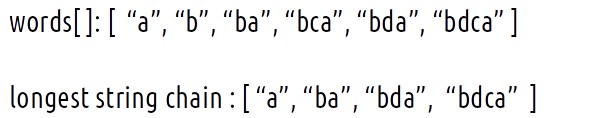

In [10]:
def is_predecessor(s1, s2):
    # Check if s2 is a predecessor of s1
    if len(s1) != len(s2) + 1:
        return False

    first = 0
    second = 0

    while first < len(s1):
        if second < len(s2) and s1[first] == s2[second]:
            first += 1
            second += 1
        else:
            first += 1

    return first == len(s1) and second == len(s2)


def longest_string_chain(arr):
    n = len(arr)

    # Sort the array in ascending order of string length
    arr.sort(key=len)

    dp = [1] * n
    maxi = 1

    for i in range(n):
        for prev_index in range(i):
            if is_predecessor(arr[i], arr[prev_index]) and 1 + dp[prev_index] > dp[i]:
                dp[i] = 1 + dp[prev_index]

        if dp[i] > maxi:
            maxi = dp[i]

    return maxi


if __name__ == "__main__":
    words = ["a", "b", "ba", "bca", "bda", "bdca"]

    result = longest_string_chain(words)

    print("The length of the longest string chain is:", result)

The length of the longest string chain is: 4


# stocks

We can buy and sell a stock only once.

We can buy and sell the stock on any day but to sell the stock, we need to first buy it on the same or any previous day.

We need to tell the maximum profit one can get by buying and selling this stock.

In [ ]:
def maximum_profit(arr):
    max_profit = 0
    mini = arr[0]

    for i in range(1, len(arr)):
        cur_profit = arr[i] - mini
        max_profit = max(max_profit, cur_profit)
        mini = min(mini, arr[i])

    return max_profit


if __name__ == "__main__":
    arr = [7, 1, 5, 3, 6, 4]
    print("The maximum profit by selling the stock is", maximum_profit(arr))

**Buy and Sell Stock - II**

We can buy and sell the stock any number of times.

In order to sell the stock, we need to first buy it on the same or any previous day.

In [11]:
def solve(i, n, price, buy, dp):
    if i >= n:
        return 0
    profit = 0
    if dp[i][buy] != -1:
        return dp[i][buy]
    if buy == 0:
        profit = max(
            solve(i + 1, n, price, buy, dp), -price[i] + solve(i + 1, n, price, 1, dp)
        )
    elif buy == 1:
        profit = max(
            solve(i + 1, n, price, buy, dp), price[i] + solve(i + 1, n, price, 0, dp)
        )
    dp[i][buy] = profit
    return dp[i][buy]


def tabuler(price):
    dp = [[0 for _ in range(2)] for _ in range(len(price) + 1)]
    for i in range(len(price) - 1, -1, -1):
        for buy in range(2):

            profit = 0
            if buy == 0:
                profit = max(dp[i + 1][buy], -price[i] + dp[i + 1][1])
            elif buy == 1:
                profit = max(dp[i + 1][buy], price[i] + dp[i + 1][0])

            dp[i][buy] = profit
    return dp[0][0]


prices = [7, 1, 5, 3, 6, 4]
tabuler(prices)
# dp = dp = [[-1 for _ in range(2)] for _ in range(len(prices))]
# return solve(0,len(prices),prices,0,dp)
# return findMaxProfit(prices)

7

In [12]:
def getMaximumProfit(Arr, n):
    # Function to calculate the maximum profit from buying and selling stocks

    ahead = [
        0,
        0,
    ]  # Initialize two lists, 'ahead' and 'cur', to keep track of profits for buying and selling
    cur = [0, 0]

    # Base condition: Initialize both 'ahead' and 'cur' to 0, as there are no more days to trade
    ahead[0] = ahead[1] = 0

    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            profit = 0

            if buy == 0:
                # We can buy the stock
                profit = max(0 + ahead[0], -Arr[ind] + ahead[1])
            elif buy == 1:
                # We can sell the stock
                profit = max(0 + ahead[1], Arr[ind] + ahead[0])
            cur[buy] = profit  # Store the result in the 'cur' list

        ahead = cur  # Update 'ahead' to be the same as 'cur'

    return cur[0]


def main():
    n = 6
    Arr = [7, 1, 5, 3, 6, 4]

    max_profit = getMaximumProfit(Arr, n)
    print("The maximum profit that can be generated is", max_profit)


if __name__ == "__main__":
    main()

The maximum profit that can be generated is 7


**Buy and Sell Stock - III**

We can do at most 2 transactions.

In [13]:
def maxProfit(prices):
    n = len(prices)

    # Create a 3D DP table with dimensions (n+1) x 2 x 3 and initialize it to 0 values
    dp = [[[0 for _ in range(3)] for _ in range(2)] for _ in range(n + 1)]

    # The base case is already covered as the DP array is initialized to 0

    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            for cap in range(1, 3):

                if buy == 0:
                    # We can buy the stock
                    dp[ind][buy][cap] = max(
                        0 + dp[ind + 1][0][cap], -prices[ind] + dp[ind + 1][1][cap]
                    )
                elif buy == 1:
                    # We can sell the stock
                    dp[ind][buy][cap] = max(
                        0 + dp[ind + 1][1][cap], prices[ind] + dp[ind + 1][0][cap - 1]
                    )

    return dp[0][0][2]


def main():
    prices = [3, 3, 5, 0, 0, 3, 1, 4]

    max_profit = maxProfit(prices)
    print("The maximum profit that can be generated is", max_profit)


if __name__ == "__main__":
    main()

The maximum profit that can be generated is 6


In [14]:
def maxProfit(prices):
    n = len(prices)

    # Create two 2D arrays, ahead and cur, both of size 2x3, initialized to 0 values
    ahead = [[0 for _ in range(3)] for _ in range(2)]
    cur = [[0 for _ in range(3)] for _ in range(2)]

    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            for cap in range(1, 3):

                if buy == 0:
                    # We can buy the stock
                    cur[buy][cap] = max(0 + ahead[0][cap], -prices[ind] + ahead[1][cap])
                elif buy == 1:
                    # We can sell the stock
                    cur[buy][cap] = max(
                        0 + ahead[1][cap], prices[ind] + ahead[0][cap - 1]
                    )

        ahead = cur  # Update ahead with the current values

    return ahead[0][2]


def main():
    prices = [3, 3, 5, 0, 0, 3, 1, 4]

    max_profit = maxProfit(prices)
    print("The maximum profit that can be generated is", max_profit)


if __name__ == "__main__":
    main()

The maximum profit that can be generated is 6


We can do at-most K transactions.

In [15]:
def maximum_profit(prices, n, k):
    # Creating a 3D dp array of size [n+1][2][k+1] initialized to 0
    dp = [[[0 for _ in range(k + 1)] for _ in range(2)] for _ in range(n + 1)]

    # Loop through the array from right to left
    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            for cap in range(1, k + 1):

                if buy == 0:  # We can buy the stock
                    dp[ind][buy][cap] = max(
                        0 + dp[ind + 1][0][cap], -prices[ind] + dp[ind + 1][1][cap]
                    )

                if buy == 1:  # We can sell the stock
                    dp[ind][buy][cap] = max(
                        0 + dp[ind + 1][1][cap], prices[ind] + dp[ind + 1][0][cap - 1]
                    )

    return dp[0][0][k]


if __name__ == "__main__":
    prices = [3, 3, 5, 0, 0, 3, 1, 4]
    n = len(prices)
    k = 2

    result = maximum_profit(prices, n, k)
    print(f"The maximum profit that can be generated is {result}")

The maximum profit that can be generated is 6


In [16]:
def max_profit(prices, n, k):
    # Create two 2D arrays to store the current and ahead states
    ahead = [[0] * (k + 1) for _ in range(2)]
    cur = [[0] * (k + 1) for _ in range(2)]

    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            for cap in range(1, k + 1):

                if buy == 0:  # We can buy the stock
                    cur[buy][cap] = max(0 + ahead[0][cap], -prices[ind] + ahead[1][cap])

                if buy == 1:  # We can sell the stock
                    cur[buy][cap] = max(
                        0 + ahead[1][cap], prices[ind] + ahead[0][cap - 1]
                    )

        # Update the 'ahead' array with the current state
        ahead = cur.copy()

    return ahead[0][k]


if __name__ == "__main__":
    prices = [3, 3, 5, 0, 0, 3, 1, 4]
    n = len(prices)
    k = 2

    result = max_profit(prices, n, k)
    print(f"The maximum profit that can be generated is {result}")

The maximum profit that can be generated is 6


We can’t buy a stock on the very next day of selling it. This is the cooldown clause.

In [17]:
def stock_profit(prices):
    n = len(prices)

    # Create a 2D dp array of size [n+2][2] initialized to 0
    dp = [[0 for _ in range(2)] for _ in range(n + 2)]

    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            profit = 0

            if buy == 0:  # We can buy the stock
                profit = max(0 + dp[ind + 1][0], -prices[ind] + dp[ind + 1][1])

            if buy == 1:  # We can sell the stock
                profit = max(0 + dp[ind + 1][1], prices[ind] + dp[ind + 2][0])

            dp[ind][buy] = profit

    return dp[0][0]


if __name__ == "__main__":
    prices = [4, 9, 0, 4, 10]

    result = stock_profit(prices)
    print(f"The maximum profit that can be generated is {result}")

The maximum profit that can be generated is 11


In [18]:
def stock_profit(prices):
    n = len(prices)

    # Initialize three lists to track the profit states
    cur = [0, 0]
    front1 = [0, 0]
    front2 = [0, 0]

    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            profit = 0

            if buy == 0:  # We can buy the stock
                profit = max(0 + front1[0], -prices[ind] + front1[1])

            if buy == 1:  # We can sell the stock
                profit = max(0 + front1[1], prices[ind] + front2[0])

            cur[buy] = profit

        # Update the 'front' lists for the next iteration
        front2 = front1.copy()
        front1 = cur.copy()

    return cur[0]


if __name__ == "__main__":
    prices = [4, 9, 0, 4, 10]

    result = stock_profit(prices)
    print(f"The maximum profit that can be generated is {result}")

The maximum profit that can be generated is 11


After every transaction, there is a transaction fee (‘fee’) associated with it.

In [19]:
def maximum_profit(n, fee, prices):
    if n == 0:
        return 0

    # Create a 2D dp array of size [n+1][2] initialized to 0
    dp = [[0 for _ in range(2)] for _ in range(n + 1)]

    # Loop through the array from right to left
    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            profit = 0

            if buy == 0:  # We can buy the stock
                profit = max(0 + dp[ind + 1][0], -prices[ind] + dp[ind + 1][1])

            if buy == 1:  # We can sell the stock
                profit = max(0 + dp[ind + 1][1], prices[ind] - fee + dp[ind + 1][0])

            dp[ind][buy] = profit

    return dp[0][0]


if __name__ == "__main__":
    prices = [1, 3, 2, 8, 4, 9]
    n = len(prices)
    fee = 2

    result = maximum_profit(n, fee, prices)
    print(f"The maximum profit that can be generated is {result}")

The maximum profit that can be generated is 8


In [20]:
def maximum_profit(n, fee, prices):
    if n == 0:
        return 0

    # Initialize two lists to track the profit states
    ahead = [0, 0]
    cur = [0, 0]

    # Base condition
    ahead[0] = ahead[1] = 0

    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            profit = 0

            if buy == 0:  # We can buy the stock
                profit = max(0 + ahead[0], -prices[ind] + ahead[1])

            if buy == 1:  # We can sell the stock
                profit = max(0 + ahead[1], prices[ind] - fee + ahead[0])

            cur[buy] = profit

        # Update the 'ahead' list for the next iteration
        ahead = cur.copy()

    return cur[0]


if __name__ == "__main__":
    prices = [1, 3, 2, 8, 4, 9]
    n = len(prices)
    fee = 2

    result = maximum_profit(n, fee, prices)
    print(f"The maximum profit that can be generated is {result}")

The maximum profit that can be generated is 8


In [3]:
n = 8
count = 0
while n != 0:
    if n % 2 == 0:
        count += n // 2
        n = 1
    else:
        count += 1
        n -= 1
count

5

In [21]:
arr = [6, -3, -10, 0, 2]
maxp = arr[0]
minp = arr[0]
ans = -1
for i in range(1, len(arr)):
    temp = max(arr[i], arr[i] * minp, maxp * arr[i])
    minp = min(arr[i], arr[i] * minp, maxp * arr[i])
    maxp = temp

    ans = max(
        ans,
        maxp,
    )
print(ans)

180


In [17]:
s = ["a", "e", "i", "o", "u"]
k = 1


def solve(s, k, curr, start, count):
    if len(curr) == k:
        count += 1
        return count
    for i in range(start, len(s)):
        curr += s[i]
        count = solve(s, k, curr, i, count)
        curr = curr[:-1]
    return count

In [18]:
solve(s, k, "", 0, 0)

5

In [51]:
nums = [1, 1, 2, 1, 1]
k = 1
odd = 0
d = dict()
start = 0
count = 0
for i in range(len(nums)):
    d[nums[i]] = d.get(nums[i], 0) + 1
    if nums[i] % 2 != 0:
        odd += 1
    if odd > k:
        while odd > k:
            remove = nums[start]
            start += 1
            d[remove] -= 1
            if remove % 2 != 0:
                odd -= 1
            if d[remove] == 0:
                d.pop(remove)
    if odd <= k:
        count += i - start + 1
count

7

In [53]:
k = len(nums) // 2
alice = sum(nums[:k])
for i in range(2):
    temp = alice - nums[i] + nums[len(nums) - 1 - i]
    alice = max(temp, alice)
    print(alice)

8
9


In [72]:
rating = [2, 5, 3, 4, 1]


def solve(rating, i, n, curr, count):
    if len(curr) == 3:
        print(curr)
        count += 1
        return count
    if i >= n:
        return count
    count = solve(rating, i + 1, n, curr, count)
    if len(curr) == 0 or curr[-1] < rating[i]:
        curr.append(rating[i])
        count = solve(rating, i + 1, n, curr, count)
        curr.pop()
    return count


solve(rating, 0, len(rating), [], 0)

[2, 3, 4]


1

In [3]:
nums = [3, -1, -5, 2, 5, -9]


def solve(nums, i, n, p):
    if i >= n:
        return 1

    exc = solve(nums, i + 1, n, p)
    inc = nums[i] * solve(nums, i + 1, n)
    return max(inc, exc)


solve(nums, 0, len(nums))

30

In [6]:
words = ["aa", "ab", "bc"]
n = len(words)
dp = [0] * len(words)
dp[0] = len(words[0])
for i in range(1, n - 1):
    prev = words[i - 1]
    for j in range(i, n):
        i

[4, 2, 6]

In [51]:
points = points = [[1, 5], [2, 3], [4, 2]]
prev = (0, 0)
m, n = 2, 1


def solve(p, prev, i, j, m, n):
    # if i == m and 0 <= j <= n:
    #     return p[m][j] - abs(j - prev[1])
    if i > m or j > n or i < 0 or j < 0:
        return 0
    down = (
        (p[i + 1][j] - abs(prev[1] - (j))) + solve(p, (i + 1, j), i + 1, j, m, n)
        if i + 1 <= m
        else 0
    )
    dleft = (
        (p[i + 1][j - 1] - abs(prev[1] - (j - 1)))
        + solve(p, (i + 1, j - 1), i + 1, j - 1, m, n)
        if i + 1 <= m and j - 1 >= 0
        else 0
    )
    dright = (
        (p[i + 1][j + 1] - abs(prev[1] - (j + 1)))
        + solve(p, (i + 1, j + 1), i + 1, j + 1, m, n)
        if i + 1 <= m and j + 1 <= n
        else 0
    )
    return max(down, dleft, dright)

In [52]:
solve(points, (0, 1), 0, 1, 2, 1)

6

**Pots of Gold Game**

There are two players, A and B, in Pots of gold game, and pots of gold arranged in a line,

 each containing some gold coins. The players can see how many coins are there in each gold pot, 
 
 and each player gets alternating turns in which the player can pick a pot from either end of the line.
 
  The winner is the player who has a higher number of coins at the end. The objective is to “maximize”
  
   the number of coins collected by A, assuming B also plays “optimally”, and A starts the game.

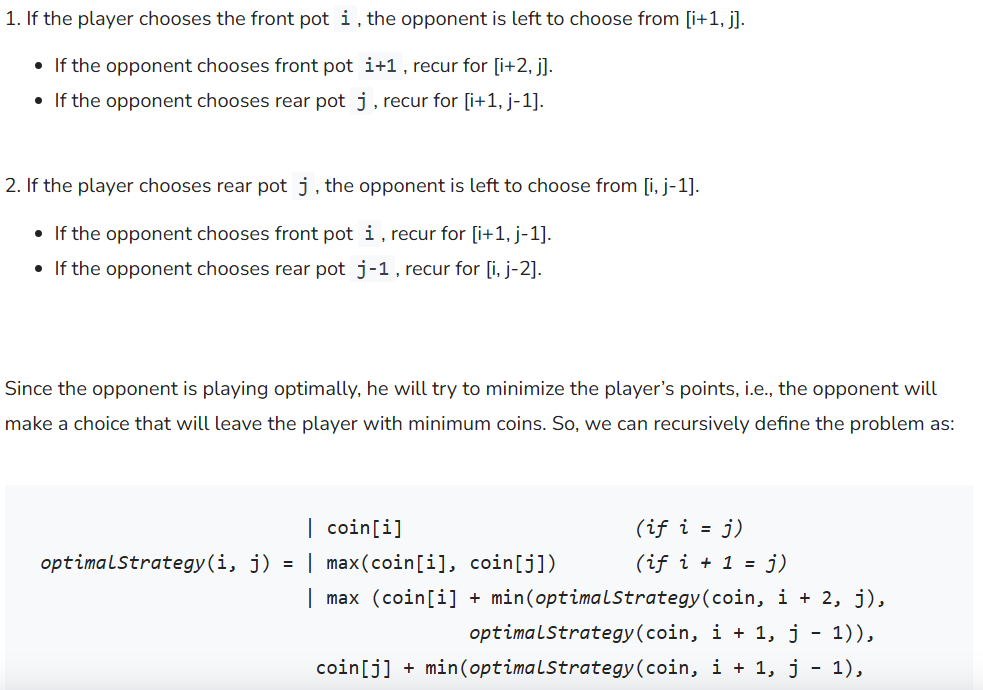

In [1]:
def findMaxCoins(coin, i, j, lookup):

    # base case: one pot left, only one choice possible
    if i == j:
        return coin[i]

    # if we are left with only two pots, choose one with maximum coins
    if i + 1 == j:
        return max(coin[i], coin[j])

    # if the subproblem is seen for the first time, solve it and
    # store its result in a lookup table
    if lookup[i][j] == 0:
        # if the player chooses front pot `i`, the opponent is left to choose
        # from [i+1, j].
        # 1. If the opponent chooses front pot `i+1`, recur for [i+2, j]
        # 2. If the opponent chooses rear pot `j`, recur for [i+1, j-1]

        start = coin[i] + min(
            findMaxCoins(coin, i + 2, j, lookup),
            findMaxCoins(coin, i + 1, j - 1, lookup),
        )

        # if a player chooses rear pot `j`, the opponent is left to choose
        # from [i, j-1].
        # 1. If the opponent chooses front pot `i`, recur for [i+1, j-1]
        # 2. If the opponent chooses rear pot `j-1`, recur for [i, j-2]

        end = coin[j] + min(
            findMaxCoins(coin, i + 1, j - 1, lookup),
            findMaxCoins(coin, i, j - 2, lookup),
        )

        # assign a maximum of two choices
        lookup[i][j] = max(start, end)

    # return the subproblem solution from the dictionary
    return lookup[i][j]


if __name__ == "__main__":

    # pots of gold arranged in a line
    coin = [4, 6, 2, 3]

    # Create a table to store solutions to subproblems
    lookup = [[0 for x in range(len(coin))] for y in range(len(coin))]

    print(
        "The maximum coins collected by player is",
        findMaxCoins(coin, 0, len(coin) - 1, lookup),
    )

The maximum coins collected by player is 9


In [2]:
def calculate(T, i, j):
    return T[i][j] if i <= j else 0


def findMaxCoins(coin):

    n = len(coin)

    # base case: one pot left, only one choice possible
    if n == 1:
        return coin[0]

    # if we are left with only two pots, choose one with maximum coins
    if n == 2:
        return max(coin[0], coin[1])

    # create a dynamic 2D matrix to store subproblem solutions
    T = [[0 for x in range(n)] for y in range(n)]

    for iteration in range(n):
        i = 0
        j = iteration
        while j < n:
            start = coin[i] + min(calculate(T, i + 2, j), calculate(T, i + 1, j - 1))
            end = coin[j] + min(calculate(T, i + 1, j - 1), calculate(T, i, j - 2))
            T[i][j] = max(start, end)
            i = i + 1
            j = j + 1

    return T[0][n - 1]


# Pots of gold game using dynamic programming
if __name__ == "__main__":

    # pots of gold arranged in a line
    coin = [4, 6, 2, 3]

    print("The maximum coins collected by player is", findMaxCoins(coin))

The maximum coins collected by player is 9


**Find minimum cuts needed for the palindromic partition of a string**

In [13]:
def is_polindrom(x):
    return x == x[::-1]


def solve(pat, path, dp):
    if len(pat) <= 0:
        # print(path)
        return 0
    if pat in dp:
        return dp[pat]
    count = 1e5
    for j in range(1, len(pat) + 1):
        curr = pat[:j]
        if is_polindrom(curr):
            count = min(count, 1 + solve(pat[j:], path + curr + " ", dp))
    dp[pat] = count
    return dp[pat]


pat = "BABABCBADCD"  # BAB|ABCBA|DCD.
# pat = "BABABCBADCEDE"  # BAB|ABCBA|D|C|EDE
# pat = "ABCD"
# pat = "ABCBA"
solve(pat, "", dict())
# O*n^3

3

Calculate the sum of all elements in a submatrix in constant time

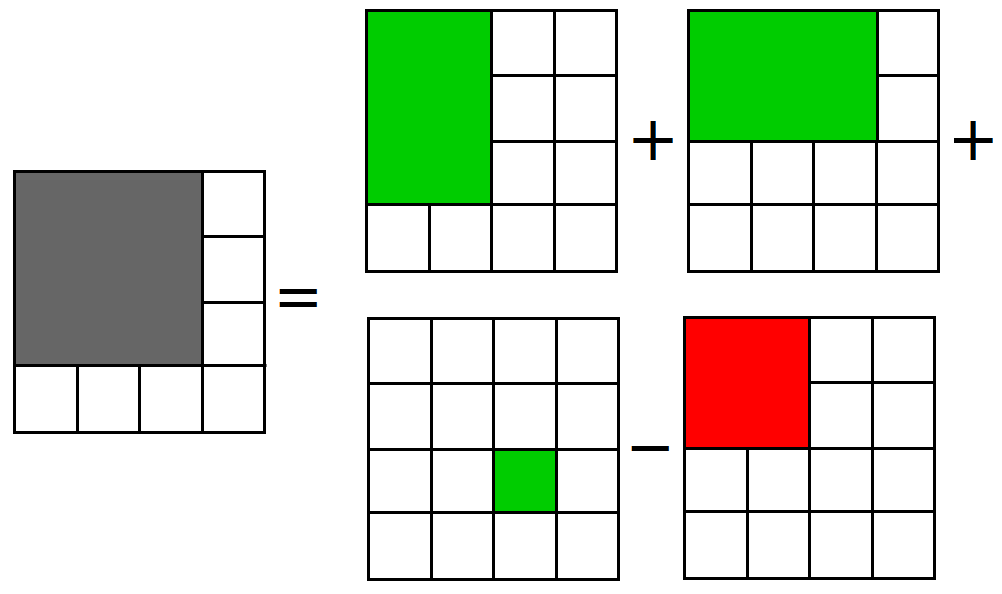

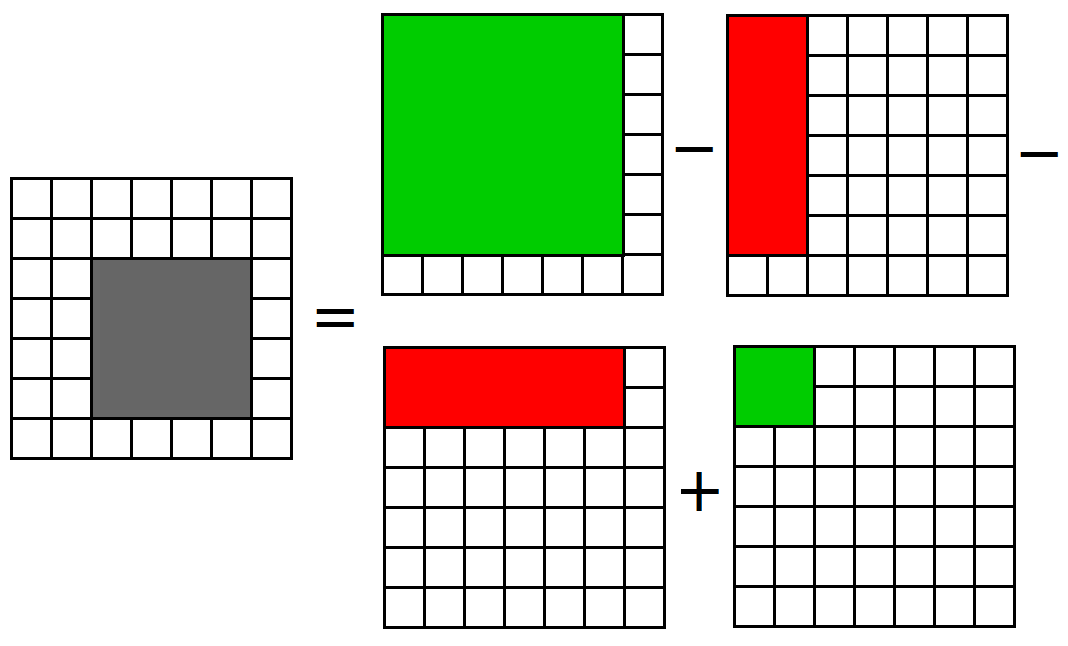

In [16]:
def preprocess(mat):
    # `M × N` matrix
    (M, N) = (len(mat), len(mat[0]))

    # preprocess the matrix `mat` such that `s[i][j]` stores
    # sum of elements in the matrix from (0, 0) to (i, j)
    s = [[0 for x in range(len(mat[0]))] for y in range(len(mat))]
    s[0][0] = mat[0][0]

    # preprocess the first row
    for j in range(1, len(mat[0])):
        s[0][j] = mat[0][j] + s[0][j - 1]

    # preprocess the first column
    for i in range(1, len(mat)):
        s[i][0] = mat[i][0] + s[i - 1][0]

    # preprocess the rest of the matrix
    for i in range(1, len(mat)):
        for j in range(1, len(mat[0])):
            s[i][j] = mat[i][j] + s[i - 1][j] + s[i][j - 1] - s[i - 1][j - 1]

    return s


# Calculate the sum of all elements in a submatrix in constant time
def findSubmatrixSum(mat, p, q, r, s):

    # base case
    if not mat or not len(mat):
        return 0

    # preprocess the matrix
    mat = preprocess(mat)

    # `total` is `mat[r][s] - mat[r][q-1] - mat[p-1][s] + mat[p-1][q-1]`
    total = mat[r][s]

    if q - 1 >= 0:
        total -= mat[r][q - 1]

    if p - 1 >= 0:
        total -= mat[p - 1][s]

    if p - 1 >= 0 and q - 1 >= 0:
        total += mat[p - 1][q - 1]

    return total


if __name__ == "__main__":

    mat = [
        [0, 2, 5, 4, 1],
        [4, 8, 2, 3, 7],
        [6, 3, 4, 6, 2],
        [7, 3, 1, 8, 3],
        [1, 5, 7, 9, 4],
    ]

    # (p, q) and (r, s) represent top-left and bottom-right
    # coordinates of the submatrix
    p = q = 1
    r = s = 3

    # calculate the submatrix sum
    print(findSubmatrixSum(mat, p, q, r, s))

38


Check if a string matches with the given wildcard pattern

If pattern[m] == *, if * matches the current character in the input string, move to the next character in the string; otherwise, ignore the * character and move to the next character in the pattern.

If pattern[m] == ?, ignore the current characters of both string and pattern and check if pattern[0…m-1] matches word[0…n-1].

If the current character in the pattern is not a wildcard character, it should match the current character in the input string.

In [17]:
# Recursive function to check if the input matches
# with a given wildcard pattern
def isMatch(word, n, pattern, m):

    # end of the pattern is reached
    if m == len(pattern):
        # return true only if the end of input is also reached
        return n == len(word)

    # if the input reaches its end, return when the
    # remaining characters in the pattern are all '*'
    if n == len(word):
        for i in range(m, len(pattern)):
            if pattern[i] != "*":
                return False

        return True

    # if the current wildcard character is '?' or the current character in
    # the pattern is the same as the current character in the input string
    if pattern[m] == "?" or pattern[m] == word[n]:
        # move to the next character in the pattern and the input string
        return isMatch(word, n + 1, pattern, m + 1)

    # if the current wildcard character is '*'
    if pattern[m] == "*":
        # move to the next character in the input or
        # ignore '*' and move to the next character in the pattern
        return isMatch(word, n + 1, pattern, m) or isMatch(word, n, pattern, m + 1)

    # we reach here when the current character in the pattern is not a
    # wildcard character, and it doesn't match the current
    # character in the input string
    return False


# Check if a string matches with a given wildcard pattern
def isMatching(word, pattern):
    return isMatch(word, 0, pattern, 0)


if __name__ == "__main__":

    print(isMatching("XYXZZXY", "X***Y"))  # True
    print(isMatching("XYXZZXY", "X*ZZ??"))  # True
    print(isMatching("XYXZZXY", "*X*X?"))  # True
    print(isMatching("XYXZZXY", "X***X"))  # False
    print(isMatching("XYXZZXY", "*"))  # True

True
True
True
False
True


In [18]:
# Recursive function to check if the input string matches
# with a given wildcard pattern
def isMatch(word, pattern, n, m, lookup):

    # construct a unique key from dynamic elements of the input
    key = (n, m)

    # if the subproblem is seen before
    if key in lookup:
        return lookup.get(key)

    # since the subproblem is seen for the first time, solve it and
    # store its result in a dictionary

    # end of the pattern is reached
    if m == len(pattern):
        # return true only if the end of the input string is also reached
        lookup[key] = n == len(word)
        return n == len(word)

    # if the input string reaches its end, return when the
    # remaining characters in the pattern are all '*'

    if n == len(word):
        for i in range(m, len(pattern)):
            if pattern[i] != "*":
                lookup[key] = False
                return False

        lookup[key] = True
        return True

    # if the current wildcard character is '?' or the current character in
    # the pattern is the same as the current character in the input string

    if pattern[m] == "?" or pattern[m] == word[n]:

        # move to the next character in the pattern and the input string
        lookup[key] = isMatch(word, pattern, n + 1, m + 1, lookup)

    # if the current wildcard character is '*'
    elif pattern[m] == "*":

        # move to the next character in the input string or
        # ignore '*' and move to the next character in the pattern

        lookup[key] = isMatch(word, pattern, n + 1, m, lookup) or isMatch(
            word, pattern, n, m + 1, lookup
        )

    else:

        # we reach here when the current character in the pattern is not a
        # wildcard character, and it doesn't match the current
        # character in the input string

        lookup[key] = False

    return lookup.get(key)


# Check if a string matches with a given wildcard pattern
def isMatching(word, pattern):
    lookup = {}
    return isMatch(word, pattern, 0, 0, lookup)


if __name__ == "__main__":

    print(isMatching("XYXZZXY", "X***Y"))  # True
    print(isMatching("XYXZZXY", "X*ZZ??"))  # True
    print(isMatching("XYXZZXY", "*X*X?"))  # True
    print(isMatching("XYXZZXY", "X***X"))  # False
    print(isMatching("XYXZZXY", "*"))  # True

True
True
True
False
True


In [19]:
# Function that matches an input string with a given wildcard pattern
def isMatch(word, pattern):

    # get length of string and wildcard pattern
    n = len(word)
    m = len(pattern)

    # create a DP lookup table
    T = [[False for x in range(m + 1)] for y in range(n + 1)]

    # if both pattern and string are empty: match
    T[0][0] = True

    # handle empty string case (i == 0)
    for j in range(1, m + 1):
        if pattern[j - 1] == "*":
            T[0][j] = T[0][j - 1]

    # build a matrix in a bottom-up manner
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if pattern[j - 1] == "*":
                T[i][j] = T[i - 1][j] or T[i][j - 1]
            elif pattern[j - 1] == "?" or word[i - 1] == pattern[j - 1]:
                T[i][j] = T[i - 1][j - 1]

    # last cell stores the answer
    return T[n][m]


# Wildcard Pattern Matching Implementation in Python
if __name__ == "__main__":

    word = "xyxzzxy"
    pattern = "x***x?"

    if isMatch(word, pattern):
        print("Match")
    else:
        print("No Match")

Match


Activity Selection Problem using Dynamic Programming

In [20]:
# Activity selection problem
def selectActivity(activities):

    # `k` keeps track of the index of the last selected activity
    k = 0

    # set to store the selected activities index
    out = set()

    # select 0 as the first activity
    if len(activities):
        out.add(0)

    # sort the activities according to their finishing time
    activities.sort(key=lambda x: x[1])

    # start iterating from the second element of the
    # list up to its last element
    for i in range(1, len(activities)):

        # if the start time of the i'th activity is greater or equal
        # to the finish time of the last selected activity, it
        # can be included in the activities list

        if activities[i][0] >= activities[k][1]:
            out.add(i)
            k = i  # update `i` as the last selected activity

    return out


if __name__ == "__main__":

    # List of given activities. Each activity has an identifier, a deadline, and a
    # profit associated with it
    activities = [
        (1, 4),
        (3, 5),
        (0, 6),
        (5, 7),
        (3, 8),
        (5, 9),
        (6, 10),
        (8, 11),
        (8, 12),
        (2, 13),
        (12, 14),
    ]

    result = selectActivity(activities)
    print([activities[i] for i in result])

[(1, 4), (12, 14), (5, 7), (8, 11)]


In [21]:
# Returns the maximum count of non-conflicting activities that can be performed
# by a single person
def findNonConflictingActivitiesLength(activities):

    # Sort the activities according to increasing order of their start time
    activities.sort(key=lambda x: x[0])

    # L[i] stores the maximum count of non-conflicting activities ending at i'th activity
    L = [0] * len(activities)

    for i in range(len(activities)):
        # consider each `j` less than `i`
        for j in range(i):
            # L[i] = max(L[j]), where `activities[j].finish` is less than `activities[i].start`
            if activities[j][1] < activities[i][0] and L[i] < L[j]:
                L[i] = L[j]

        # increment L[i] since it ends at the i'th activity
        L[i] = L[i] + 1

    # return the maximum activity length in the list
    return max(L)


if __name__ == "__main__":

    # Each pair stores the start and the finish time of a activity
    activities = [
        (1, 4),
        (3, 5),
        (0, 6),
        (5, 7),
        (3, 8),
        (5, 9),
        (6, 10),
        (8, 11),
        (8, 12),
        (2, 13),
        (12, 14),
    ]

    print(
        "The maximum number of non-conflicting activities is",
        findNonConflictingActivitiesLength(activities),
    )

The maximum number of non-conflicting activities is 4


In [22]:
# Returns the maximum count of non-conflicting activities that can be performed
# by a single person
def findNonConflictingActivitiesLength(activities):

    # Sort the activities according to increasing order of their start time
    activities.sort(key=lambda x: x[1])

    # L[i] stores the maximum count of non-conflicting activities ending at i'th activity
    L = [0] * len(activities)
    L[0] = 1

    for i in range(1, len(activities)):
        # consider each `j` less than `i`
        for j in range(i):
            # L[i] = max(L[j]), where `activities[j].finish` is less than `activities[i].start`
            if activities[j][1] < activities[i][0] and L[i] < L[j]:
                L[i] = L[j]

        # increment L[i] since it ends at the i'th activity
        L[i] = L[i] + 1

    # return the maximum activity length in the list
    return max(L)


if __name__ == "__main__":

    # Each pair stores the start and the finish time of a activity
    activities = [
        (1, 4),
        (3, 5),
        (0, 6),
        (5, 7),
        (3, 8),
        (5, 9),
        (6, 10),
        (8, 11),
        (8, 12),
        (2, 13),
        (12, 14),
    ]

    print(
        "The maximum number of non-conflicting activities is",
        findNonConflictingActivitiesLength(activities),
    )

The maximum number of non-conflicting activities is 4


Weighted Interval Scheduling Problem

In [24]:
# A class to store a Job
class Job:
    def __init__(self, start, finish, profit):
        self.start = start
        self.finish = finish
        self.profit = profit


# Function to find the index of the last job which doesn't conflict with the given job.
# It performs a linear search on the given list of jobs.
def findLastNonConflictingJob(jobs, n):

    # find the last job index whose finish time is less than or equal to the
    # given job's start time
    for i in reversed(range(n)):
        if jobs[i].finish <= jobs[n].start:
            return i

    # return the negative index if no non-conflicting job is found
    return -1


# A recursive function to find the maximum profit subset of non-overlapping
# jobs, which are sorted according to finish time
def findMaxProfit(jobs, n):

    # base case
    if n < 0:
        return 0

    # return if only one item is remaining
    if n == 0:
        return jobs[0].profit

    # find the index of the last non-conflicting job with the current job
    index = findLastNonConflictingJob(jobs, n)

    # include the current job and recur for non-conflicting jobs `[0, index]`
    incl = jobs[n].profit + findMaxProfit(jobs, index)

    # exclude the current job and recur for remaining items `[0, n-1]`
    excl = findMaxProfit(jobs, n - 1)

    # return the maximum profit by including or excluding the current job
    return max(incl, excl)


# Wrapper over `findMaxProfit()` function
def maxProfit(jobs):

    # sort jobs in increasing order of their finish times
    jobs.sort(key=lambda x: x.finish)

    return findMaxProfit(jobs, len(jobs) - 1)


if __name__ == "__main__":

    jobs = [
        Job(0, 6, 60),
        Job(1, 4, 30),
        Job(3, 5, 10),
        Job(5, 7, 30),
        Job(5, 9, 50),
        Job(7, 8, 10),
    ]

    print("The maximum profit is", maxProfit(jobs))

The maximum profit is 80


In [25]:
# A class to store a Job
class Job:
    def __init__(self, start, finish, profit):
        self.start = start
        self.finish = finish
        self.profit = profit


# Function to find the index of the last job which doesn't conflict with the given job.
# It performs a linear search on the given list of jobs.
def findLastNonConflictingJob(jobs, n):

    # find the last job index whose finish time is less than or equal to the
    # given job's start time
    for i in reversed(range(n)):
        if jobs[i].finish <= jobs[n].start:
            return i

    # return the negative index if no non-conflicting job is found
    return -1


# Function to find the maximum profit of non-overlapping jobs using DP
def findMaxProfit(jobs):

    # base case
    if not jobs:
        return 0

    # sort jobs in increasing order of their finish times
    jobs.sort(key=lambda x: x.finish)

    # construct a lookup table where the i'th index stores the maximum profit
    # for the first `i` jobs
    maxProfit = [None] * len(jobs)

    # maximum profit gained by including the first job
    maxProfit[0] = jobs[0].profit

    # fill the `maxProfit` table in a bottom-up manner from the second index
    for i in range(1, len(jobs)):

        # find the index of the last non-conflicting job with the current job
        index = findLastNonConflictingJob(jobs, i)

        # include the current job with its non-conflicting jobs
        incl = jobs[i].profit
        if index != -1:
            incl += maxProfit[index]

        # store the maximum profit by including or excluding the current job
        maxProfit[i] = max(incl, maxProfit[i - 1])

    # return maximum profit
    return maxProfit[-1]


if __name__ == "__main__":

    jobs = [
        Job(0, 6, 60),
        Job(1, 4, 30),
        Job(3, 5, 10),
        Job(5, 7, 30),
        Job(5, 9, 50),
        Job(7, 8, 10),
    ]

    print("The maximum profit is", findMaxProfit(jobs))

The maximum profit is 80


In [23]:
# A class to store a Job
class Job:
    def __init__(self, start, finish, profit):
        self.start = start
        self.finish = finish
        self.profit = profit


# Function to find the maximum profit of non-overlapping jobs using LIS
def findMaxProfit(jobs):

    # base case
    if not jobs:
        return 0

    # sort the jobs according to increasing order of their start time
    jobs.sort(key=lambda x: x.start)

    # `maxProfit[i]` stores the maximum profit of non-conflicting jobs
    # ending at the i'th job
    maxProfit = [None] * len(jobs)

    # consider every job
    for i in range(len(jobs)):
        # initialize current profit to 0
        maxProfit[i] = 0

        # consider each `j` less than `i`
        for j in range(i):
            # if the j'th job is not conflicting with the i'th job and
            # is leading to the maximum profit
            if jobs[j].finish <= jobs[i].start and maxProfit[i] < maxProfit[j]:
                maxProfit[i] = maxProfit[j]

        # end the current task with i'th job
        maxProfit[i] += jobs[i].profit

    # return the maximum profit
    return max(maxProfit)


if __name__ == "__main__":

    jobs = [
        Job(0, 6, 60),
        Job(5, 9, 50),
        Job(1, 4, 30),
        Job(5, 7, 30),
        Job(3, 5, 10),
        Job(7, 8, 10),
    ]

    print("The maximum profit is", findMaxProfit(jobs))

The maximum profit is 80


In [26]:
# A class to store a Job
class Job:
    def __init__(self, start, finish, profit):
        self.start = start
        self.finish = finish
        self.profit = profit


# Function to perform a binary search on the given jobs, which are sorted
# by finish time. The function returns the index of the last job, which
# doesn't conflict with the given job, i.e., whose finish time is
# less than or equal to the given job's start time.
def findLastNonConflictingJob(jobs, n):

    # search space
    low = 0
    high = n

    # iterate till the search space is exhausted
    while low <= high:
        mid = (low + high) // 2
        if jobs[mid].finish <= jobs[n].start:
            if jobs[mid + 1].finish <= jobs[n].start:
                low = mid + 1
            else:
                return mid
        else:
            high = mid - 1

    # return the negative index if no non-conflicting job is found
    return -1


# Function to find the maximum profit of non-overlapping jobs using DP
def findMaxProfit(jobs):

    # base case
    if not jobs:
        return 0

    # sort jobs in increasing order of their finish times
    jobs.sort(key=lambda x: x.finish)

    # get the number of jobs
    n = len(jobs)

    # construct a lookup table where the i'th index stores the maximum profit
    # for the first `i` jobs
    maxProfit = [None] * n

    # maximum profit gained by including the first job
    maxProfit[0] = jobs[0].profit

    # fill the `maxProfit` table in a bottom-up manner from the second index
    for i in range(1, n):

        # find the index of the last non-conflicting job with the current job
        index = findLastNonConflictingJob(jobs, i)

        # include the current job with its non-conflicting jobs
        incl = jobs[i].profit
        if index != -1:
            incl += maxProfit[index]

        # store the maximum profit by including or excluding the current job
        maxProfit[i] = max(incl, maxProfit[i - 1])

    # return maximum profit
    return maxProfit[n - 1]


if __name__ == "__main__":

    jobs = [
        Job(0, 6, 60),
        Job(1, 4, 30),
        Job(3, 5, 10),
        Job(5, 7, 30),
        Job(5, 9, 50),
        Job(7, 8, 10),
    ]

    print("The maximum profit is", findMaxProfit(jobs))

The maximum profit is 80


In [ ]:
"""
    Time Complexity: O(n*m)
    Space Complexity: O(n*m)

    Where 'n' is length of string 's1' and 'm' is length of string 's2'.
"""

from typing import List


# Function to calculate 'dp' array for LCS.
def calculateLCS(n: int, m: int, s1: str, s2: str) -> List[List[int]]:
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = max(1 + dp[i - 1][j - 1], dp[i][j])
    return dp


def findLCS(n: int, m: int, s1: str, s2: str) -> str:

    dp = calculateLCS(n, m, s1, s2)
    i, j = n, m
    lcs = []

    #  Moving through 'dp[i][j]', if s1[i]==s2[j], the current character is a part
    #  of 'lcs', else we move to the cell from which dp[i][j] got it's value, i.e.
    #  maximum of dp[i-1][j] and dp[i][j-1].
    while i > 0 and j > 0:
        if s1[i - 1] == s2[j - 1]:
            lcs.append(s1[i - 1])
            i -= 1
            j -= 1
        else:
            if dp[i - 1][j] > dp[i][j - 1]:
                i -= 1
            else:
                j -= 1
    lcs.reverse()
    return "".join(lcs)

In [ ]:
#  The strategy to maximize profit should be to pick up jobs that offer higher profits. Hence we should sort the jobs
# in descending order of profit. Now say if a job has a deadline of 4 we can perform it anytime between day 1-4, but it is preferable to perform the job on its last day.
# This leaves enough empty slots on the previous days to perform other jobs.
def solve(jobs):
    jobs.sort(key=lambda x: x[2], reverse=True)
    maxi = jobs[0][1]
    for i in range(1, len(jobs)):
        maxi = max(maxi, jobs[i][1])

    slot = [-1] * (maxi + 1)
    countJobs = 0
    jobProfit = 0

    for i in range(len(jobs)):
        for j in range(jobs[i][1], 0, -1):
            if slot[j] == -1:
                slot[j] = i
                countJobs += 1
                jobProfit += jobs[i][2]
                break

    return countJobs, jobProfit


# jobs = [job(1, 4, 20), job(2, 1, 10), job(3, 2, 40), job(4, 2, 30)]
# 3, 90

Maximum sum two non-overlapping subarrays of given size

First we store the prefix sum in a separate array so that any subarray sum can be calculated in constant time. 

After that we will initialize our two subarray from (N – 2K) and (N – K) indices, where N is the length of the array and K is

 required subarray length. Then we will move from (N – 2K) index towards 0

In [ ]:
# Python3 program to get maximum Sum two
# non-overlapping subarrays of same specified length


# Utility method to get Sum of
# subarray from index i to j
def getSubarraySum(Sum, i, j):

    if i == 0:
        return Sum[j]
    else:
        return Sum[j] - Sum[i - 1]


# Method prints two non-overlapping subarrays
# of length K whose Sum is maximum
def maximumSumTwoNonOverlappingSubarray(arr, N, K):

    Sum = [None] * N

    # filling prefix Sum array
    Sum[0] = arr[0]
    for i in range(1, N):
        Sum[i] = Sum[i - 1] + arr[i]

    # Initializing subarrays from
    # (N-2K) and (N-K) indices
    resIndex = (N - 2 * K, N - K)

    # initializing result Sum from above subarray Sums
    maxSum2Subarray = getSubarraySum(Sum, N - 2 * K, N - K - 1) + getSubarraySum(
        Sum, N - K, N - 1
    )

    # storing second subarray maximum and its starting index
    secondSubarrayMax = (N - K, getSubarraySum(Sum, N - K, N - 1))

    # looping from N-2K-1 towards 0
    for i in range(N - 2 * K - 1, -1, -1):

        # get subarray Sum from (current index + K)
        cur = getSubarraySum(Sum, i + K, i + 2 * K - 1)

        # if (current index + K) Sum is more
        # than update secondSubarrayMax
        if cur >= secondSubarrayMax[1]:
            secondSubarrayMax = (i + K, cur)

        # now getting complete Sum (Sum of both subarrays)
        cur = getSubarraySum(Sum, i, i + K - 1) + secondSubarrayMax[1]

        # If it is more then update main result
        if cur >= maxSum2Subarray:

            maxSum2Subarray = cur
            resIndex = (i, secondSubarrayMax[0])

    # printing actual subarrays
    for i in range(resIndex[0], resIndex[0] + K):
        print(arr[i], end=" ")
    print()

    for i in range(resIndex[1], resIndex[1] + K):
        print(arr[i], end=" ")
    print()


# Driver Code
if __name__ == "__main__":

    arr = [2, 5, 1, 2, 7, 3, 0]
    N = len(arr)

    # K will be given such that (N >= 2K)
    K = 2

    maximumSumTwoNonOverlappingSubarray(arr, N, K)

# This code is contributed by Rituraj Jain

Let ‘A[i]’ be the cost to reverse the word ‘S[i]’. Let ‘C’ be the minimum total cost to make the array ‘S’ good.

good if they are in lexicographical order

Calculate the value of ‘C’. If it’s impossible to make the array good, return the integer ‘-1

In [1]:
a = [5, 4, 4, 2, 3, 5]
s = ["sla", "brog", "hqt", "qsp", "lqhw", "may"]


def issorted(s):

    prev = s[0]
    for i in range(1, len(s)):
        if s[i] < prev:
            return False
        prev = s[i]
    return True


def solve(i, a, s, t):

    if i < 0 and issorted(s):
        print(s)
        return t

    if i < 0:
        return float("inf")

    notdo = solve(i - 1, a, s, t)

    s[i] = s[i][::-1]
    t = t + a[i]
    do = solve(i - 1, a, s, t)
    s[i] = s[i][::-1]
    t = t - a[i]

    return min(notdo, do)


solve(5, a, s, 0)

['als', 'brog', 'hqt', 'qsp', 'whql', 'yam']
['als', 'gorb', 'hqt', 'qsp', 'whql', 'yam']
['als', 'brog', 'hqt', 'psq', 'whql', 'yam']
['als', 'gorb', 'hqt', 'psq', 'whql', 'yam']


13

In [ ]:
from typing import *

a = [5, 4, 4, 2, 3, 5]
s = ["sla", "brog", "hqt", "qsp", "lqhw", "may"]


def minimumCost(n: int, a: List[int], s: List[str]) -> int:
    # Write your code here.
    dp = [[float("Inf")] * 2 for i in range(n)]

    dp[0][0] = 0

    dp[0][1] = a[0]

    rev_s = [i[::-1] for i in s]

    for i in range(1, n):

        for j in range(2):

            curStr = s[i] if j == 0 else rev_s[i]

            curCost = 0 if j == 0 else a[i]

            if curStr >= s[i - 1]:

                dp[i][j] = min(dp[i][j], dp[i - 1][0] + curCost)

            if curStr >= rev_s[i - 1]:

                dp[i][j] = min(dp[i][j], dp[i - 1][1] + curCost)

    res = min(dp[n - 1][0], dp[n - 1][1])

    return res if res != float("Inf") else -1


minimumCost(len(a), a, s)